In [3]:
### importing all the required libraries 
from sklearn.datasets import load_files  # to load the images from the subfolders    
from keras.utils import np_utils # to hot encode the label of the image
import numpy as np 
from keras.preprocessing import image ,image                  
from tqdm import tqdm 
from keras.applications.mobilenetv2 import MobileNetV2, preprocess_input #to load mobilenetv2 model
from keras.applications.resnet50 import ResNet50, preprocess_input # to preprocess the image before transfer the image and generate the bottleneck features
from keras.callbacks import ModelCheckpoint # to save the best weights for the model while training 
import cv2 # opencv library used for take a stream of input image "real time"
from keras.layers import Conv2D, GlobalAveragePooling2D,Dense # to create convolutional 2d layer and average pooling layer and Dense for Dense layer
from keras.models import Sequential 
from random import randint # to generate random nubmers to implement the random model classification 
import time # to calculate the time processing for one frame
from keras.preprocessing.image import ImageDataGenerator # to augement the data
import matplotlib.pyplot as plt # to draw barplot and etc...
import win32com.client # to convert text to voice

speaker = win32com.client.Dispatch("SAPI.SpVoice")


Using TensorFlow backend.


In [4]:
### loading all the dataset and give each subfolder a number to present each class

###  loading training data
data_training = load_files("./data/training/")
x_train = np.array(data_training['filenames'])
y_train = np_utils.to_categorical(np.array(data_training['target']), 9)

###  loading validation data

data_validation = load_files("./data/validation/")
x_valid = np.array(data_validation['filenames'])
y_valid = np_utils.to_categorical(np.array(data_validation['target']), 9)

###  loading testing data

data_testing = load_files("./data/testing/")
x_test = np.array(data_testing['filenames'])
y_test = np_utils.to_categorical(np.array(data_testing['target']), 9)

### loading the augmented data
data_training_aug = load_files("./data/augmented//")
x_train_aug = np.array(data_training_aug['filenames'])
y_train_aug = np_utils.to_categorical(np.array(data_training_aug['target']), 9)




In [65]:
# changing the size of ploting because the default size make the text interlapsed
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


<function matplotlib.pyplot.show(*args, **kw)>

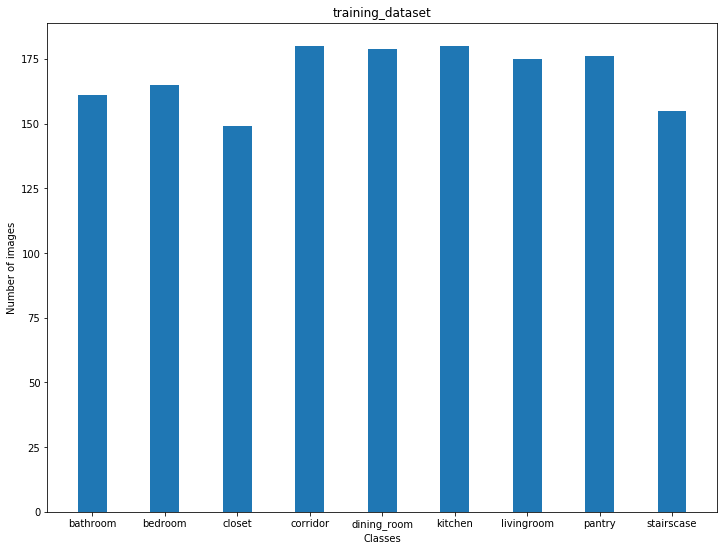

In [85]:
# number of training image per each class
training_num=[161,165,149,180,179,180,175,176,155]
# number of training image per each class

testing_num=[36,38,38,40,41,45,45,40,36]
# number of testing image per each class

validation_num=[27,27,27,27,27,27,27,27,27]
# number of validation image per each class

# places of ploting in the x axis
y_pos=[-0,5,10,15,20,25,30,35,40]

# ploting the number of training image in each class
plt.bar(y_pos,training_num  ,label='Training dataset',width=2)
plt.xticks(y_pos, classes_name)

plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.savefig('training_dataset.png')
plt.title("training_dataset")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

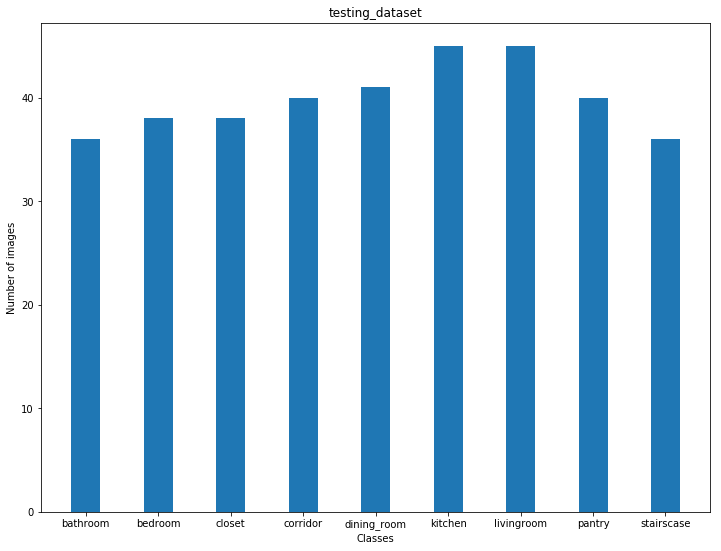

In [84]:
# ploting the number of testing image in each class

plt.bar(y_pos,testing_num ,label='Testing dataset',width=2)
plt.xticks(y_pos, classes_name)

plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.savefig('testing_dataset.png')
plt.title("testing_dataset")


plt.show

<function matplotlib.pyplot.show(*args, **kw)>

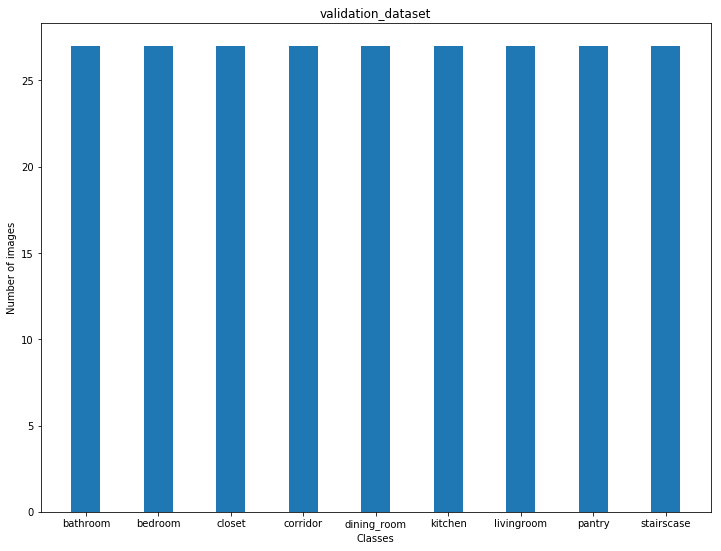

In [83]:
# ploting the number of validation image in each class

plt.bar(y_pos,validation_num  ,label='Validation dataset',width=2)
plt.xticks(y_pos, classes_name)

plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.savefig('validation_dataset.png')
plt.title("validation_dataset")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

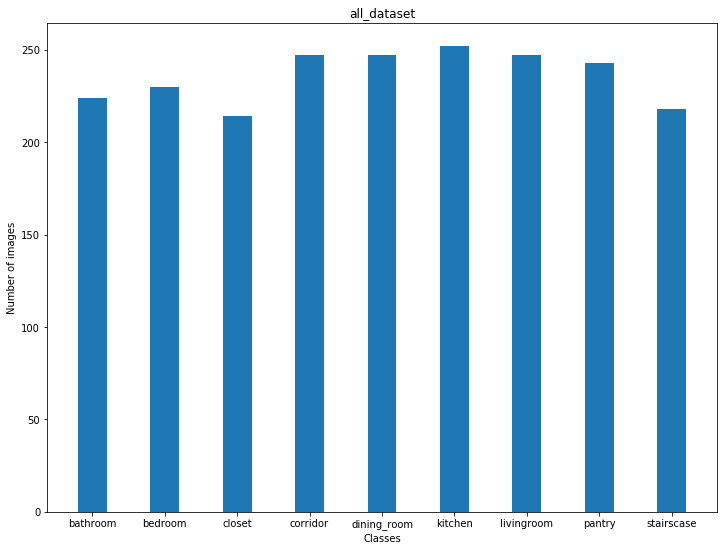

In [82]:
# ploting the number of all the image in each class

all_num=[]
for i in range(0,9):
    all_num.append(testing_num[i]+training_num[i]+validation_num[i])
plt.bar(y_pos,all_num ,label='All dataset',width=2)
plt.xticks(y_pos, classes_name)

plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.savefig('all_dataset.png')
plt.title("all_dataset")
plt.show

In [4]:
### RANDOM MODEL CLASSIFIER 

counter=0
for true_value in data_testing['target']:
    if(true_value==randint(0,9)):
        counter=counter+1
        
accuracy=(counter/data_testing['target'].shape[0])   
print("The accuracy of a random model={}%".format(accuracy*100))

The accuracy of a random model=9.192200557103064%


In [5]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)



In [ ]:
# convert the dataset into 4D tensor
train_tensor=paths_to_tensor(x_train)
valid_tensor=paths_to_tensor(x_valid)
test_tensor=paths_to_tensor(x_test)
train_tensor_aug=paths_to_tensor(x_train_aug)

In [5]:

# extract bottleneck feature of Resnet50 model

valid_resnet=ResNet50(weights='imagenet', include_top=False).predict(preprocess_input(valid_tensor))
print("done")

test_resnet=ResNet50(weights='imagenet', include_top=False).predict(preprocess_input(test_tensor))
print("done")

train_resnet=ResNet50(weights='imagenet', include_top=False).predict(preprocess_input(train_tensor))
print ("done")

# save the bottleneck feature
np.save("train_resnet", train_resnet)
np.save("valid_resnet", valid_resnet)
np.save("test_resnet", test_resnet)


done
done
done


In [18]:
# load the bottleneck feature
valid_resnet=np.load('valid_resnet.npy')
test_resnet=np.load('test_resnet.npy')
train_resnet=np.load('train_resnet.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'valid_resnet.npy'

In [64]:
# create a convolutional model with a pooling layer that accept input with dimension (1,1,2048) and a dense layer for classification 
Resnet50_model = Sequential()
Resnet50_model.add(GlobalAveragePooling2D(input_shape=(None,None,2048)))
Resnet50_model.add(Dense(9, activation='softmax'))

Resnet50_model.summary()
Resnet50_model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


In [65]:
### TODO: Train the model.

checkpointer = ModelCheckpoint(filepath='weights.best.Resnet50.hdf5', 
                               verbose=1, save_best_only=True)

history=Resnet50_model.fit(train_resnet, y_train, 
          validation_data=(valid_resnet, y_valid),
          epochs=50, batch_size=20, callbacks=[checkpointer], verbose=2)



Train on 1520 samples, validate on 243 samples
Epoch 1/50
 - 2s - loss: 1.0180 - acc: 0.7099 - val_loss: 0.4204 - val_acc: 0.8642

Epoch 00001: val_loss improved from inf to 0.42042, saving model to weights.best.Resnet50.hdf5
Epoch 2/50
 - 1s - loss: 0.3663 - acc: 0.8750 - val_loss: 0.2455 - val_acc: 0.9424

Epoch 00002: val_loss improved from 0.42042 to 0.24554, saving model to weights.best.Resnet50.hdf5
Epoch 3/50
 - 1s - loss: 0.2703 - acc: 0.9230 - val_loss: 0.1853 - val_acc: 0.9630

Epoch 00003: val_loss improved from 0.24554 to 0.18534, saving model to weights.best.Resnet50.hdf5
Epoch 4/50
 - 1s - loss: 0.2227 - acc: 0.9474 - val_loss: 0.1688 - val_acc: 0.9630

Epoch 00004: val_loss improved from 0.18534 to 0.16884, saving model to weights.best.Resnet50.hdf5
Epoch 5/50
 - 1s - loss: 0.1882 - acc: 0.9559 - val_loss: 0.1406 - val_acc: 0.9753

Epoch 00005: val_loss improved from 0.16884 to 0.14059, saving model to weights.best.Resnet50.hdf5
Epoch 6/50
 - 1s - loss: 0.1637 - acc: 0.9

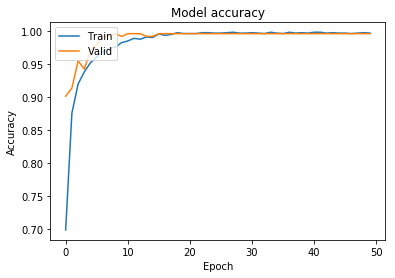

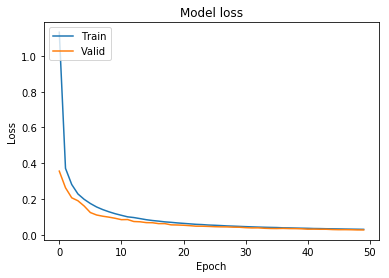

In [56]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.savefig('resnet50_accuracy.png')

plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.savefig('resnet50_loss.png')

plt.show()


In [66]:
Resnet50_model.load_weights('weights.best.Resnet50.hdf5')
Resnet50_predictions = [np.argmax(Resnet50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_resnet]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Resnet50_predictions)==np.argmax(y_test, axis=1))/len(Resnet50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 84.4011%


In [3]:
classes_name=['bathroom','bedroom','closet','corridor','dining_room','kitchen','livingroom','pantry','stairscase']

In [38]:
# a function that accept the predicted output and pronouce the object loud

def voice_assist(num):
    
    
        if (num==0):
            speaker.Speak("It's a bathroom!")

        elif (num==1):
            speaker.Speak("It's a bedroom!")  
        elif (num==2):
            speaker.Speak("It's a children room ! ")  
        elif (num==3):
            speaker.Speak("It's a closet!")  
        elif (num==4):
            speaker.Speak("It's a corridor!")  
        elif (num==5):
            speaker.Speak("It's a dining room!")  
        elif (num==6):
            speaker.Speak("It's a kitchen!")  
        elif (num==7):
            speaker.Speak("It's a living room!")  
        elif (num==8):
            speaker.Speak("It's a pantry!")  
        elif (num==9):
            speaker.Speak("It's a staircase!") 
   

In [39]:
   # a function that thakes frames from the camera and preprocess 
   #the frame and the predict the class of the image and then pass the parameter to voice_assist function
    prev_class_num=20 # random class number
    accuracy=0.6 # determine how sure the model of the classified object
    
    cap = cv2.VideoCapture(0) # select the camera you choose if you have multiple camera devices
    font = cv2.FONT_HERSHEY_SIMPLEX # font type


    while 1:
        start=time.time() # start the timer
        ret, img = cap.read() # read a frame 
        # preprocess the frame
        frame=cv2.resize(img, (224, 224))
        frame = image.img_to_array(frame)
        frame=np.expand_dims(frame,axis=0)
        #predict the frame using the model created and classify the frame
        prediction=Resnet50_model.predict(ResNet50(weights='imagenet', include_top=False).predict(preprocess_input(frame)))
        
        class_num=np.argmax(prediction) # return the number of the class that have the maximum class accuracy
        if(prediction[0][class_num]>accuracy):
            cv2.putText(img,classes_name[class_num],(10,224), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
            if( (class_num != prev_class_num)):

                prev_class_num=class_num
                voice_assist(class_num)
        cv2.imshow('img',img) # show the image ,this line can be deleted to decrease the time processing
        end=time.time() # end the timer 
        
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
    cap.release()
    cv2.destroyAllWindows()

    print("The time taken to process one frame is ={}".format(end-start)) 

The time taken to process one frame is =16.583635807037354


In [6]:
# loading mobilenetv2 model trained on imagenet dataset
model=MobileNetV2(weights='imagenet', include_top=False,pooling='avg')

C:\Users\blackice\Anaconda3\envs\test\lib\site-packages\keras_applications\mobilenet_v2.py:315: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [8]:

valid_mobile=model.predict(preprocess_input(valid_tensor))
print("done")

test_mobile=model.predict(preprocess_input(test_tensor))
print("done")

train_mobile=model.predict(preprocess_input(train_tensor))
print ("done")

train_tensor_aug=model.predict(preprocess_input(train_tensor_aug))
print ("done")


np.save("train_mobile", train_mobile)
np.save("valid_mobile", valid_mobile)
np.save("test_mobile", test_mobile)
np.save("train_tensor_aug", train_tensor_aug)


done
done
done


In [11]:
valid_mobile=np.load('valid_mobile.npy')
test_mobile=np.load('test_mobile.npy')
train_mobile=np.load('train_mobile.npy')
train_tensor_aug=np.load('train_tensor_aug.npy')

In [12]:
my_model = Sequential()

my_model.add(Dense(9, activation='softmax',input_shape=train_mobile.shape[1:]))

my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 11529     
Total params: 11,529
Trainable params: 11,529
Non-trainable params: 0
_________________________________________________________________


In [15]:
my_model = Sequential()


my_model.add(Dense(9, activation='softmax',input_shape=train_mobile.shape[1:]))


my_model.summary()
        
my_model.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='weights.best.Resnet50.hdf5', 
                               verbose=1, save_best_only=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 9)                 11529     
Total params: 11,529
Trainable params: 11,529
Non-trainable params: 0
_________________________________________________________________


In [36]:
# initialize the model parameter to find the best solution that achieve the highest accuracy
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
epoch=200
batch=[10,20,40,80,120,160,200]
measures={ "optimizer":[] , "batch":[] , "accuracy":[] } 

for opti in optimizer:
    for batch1 in batch:
        my_model = Sequential()


        my_model.add(Dense(9, activation='softmax',input_shape=train_mobile.shape[1:]))


        my_model.summary()
        
        my_model.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['accuracy'])
        checkpointer = ModelCheckpoint(filepath='weights.best.Resnet50.hdf5', 
                               verbose=1, save_best_only=True)
        history1=my_model.fit(train_mobile, y_train, 
                  validation_data=(valid_mobile, y_valid),
                  epochs=epoch, batch_size=batch1, callbacks=[checkpointer], verbose=2)


        my_model_predictions = [np.argmax(my_model.predict(np.expand_dims(feature, axis=0))) for feature in test_mobile]

        # report test accuracy
        test_accuracy = 100*np.sum(np.array(my_model_predictions)==np.argmax(y_test, axis=1))/len(my_model_predictions)
        measures["optimizer"].append(opti)
        measures["batch"].append(batch1)
        measures["accuracy"].append(test_accuracy)
        print("batch_size={}   optimizer={}".format(batch1,opti))
        print('Test accuracy: %.4f%%' % test_accuracy)
        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 9)                 11529     
Total params: 11,529
Trainable params: 11,529
Non-trainable params: 0
_________________________________________________________________
Train on 1520 samples, validate on 243 samples
Epoch 1/200
 - 2s - loss: 1.7435 - acc: 0.3776 - val_loss: 1.3227 - val_acc: 0.5144

Epoch 00001: val_loss improved from inf to 1.32274, saving model to weights.best.Resnet50.hdf5
Epoch 2/200
 - 1s - loss: 1.1993 - acc: 0.5803 - val_loss: 1.1787 - val_acc: 0.5514

Epoch 00002: val_loss improved from 1.32274 to 1.17874, saving model to weights.best.Resnet50.hdf5
Epoch 3/200
 - 1s - loss: 1.0179 - acc: 0.6572 - val_loss: 0.9290 - val_acc: 0.6790

Epoch 00003: val_loss improved from 1.17874 to 0.92904, saving model to weights.best.Resnet50.hdf5
Epoch 4/200
 - 1s - loss: 0.9051 - acc: 0.7053 - val_loss: 0.8787 - val


Epoch 00099: val_loss improved from 0.11594 to 0.11426, saving model to weights.best.Resnet50.hdf5
Epoch 100/200
 - 1s - loss: 0.0965 - acc: 0.9980 - val_loss: 0.1124 - val_acc: 0.9959

Epoch 00100: val_loss improved from 0.11426 to 0.11240, saving model to weights.best.Resnet50.hdf5
Epoch 101/200
 - 1s - loss: 0.0959 - acc: 0.9967 - val_loss: 0.1088 - val_acc: 0.9959

Epoch 00101: val_loss improved from 0.11240 to 0.10879, saving model to weights.best.Resnet50.hdf5
Epoch 102/200
 - 1s - loss: 0.0944 - acc: 0.9954 - val_loss: 0.1077 - val_acc: 0.9959

Epoch 00102: val_loss improved from 0.10879 to 0.10765, saving model to weights.best.Resnet50.hdf5
Epoch 103/200
 - 1s - loss: 0.0934 - acc: 0.9967 - val_loss: 0.1161 - val_acc: 0.9959

Epoch 00103: val_loss did not improve from 0.10765
Epoch 104/200
 - 1s - loss: 0.0927 - acc: 0.9967 - val_loss: 0.1096 - val_acc: 0.9918

Epoch 00104: val_loss did not improve from 0.10765
Epoch 105/200
 - 1s - loss: 0.0914 - acc: 0.9974 - val_loss: 0.109


Epoch 00152: val_loss did not improve from 0.07781
Epoch 153/200
 - 1s - loss: 0.0617 - acc: 0.9980 - val_loss: 0.0812 - val_acc: 0.9959

Epoch 00153: val_loss did not improve from 0.07781
Epoch 154/200
 - 1s - loss: 0.0617 - acc: 0.9967 - val_loss: 0.0768 - val_acc: 0.9959

Epoch 00154: val_loss improved from 0.07781 to 0.07678, saving model to weights.best.Resnet50.hdf5
Epoch 155/200
 - 1s - loss: 0.0615 - acc: 0.9967 - val_loss: 0.0824 - val_acc: 0.9959

Epoch 00155: val_loss did not improve from 0.07678
Epoch 156/200
 - 1s - loss: 0.0603 - acc: 0.9980 - val_loss: 0.0747 - val_acc: 0.9959

Epoch 00156: val_loss improved from 0.07678 to 0.07469, saving model to weights.best.Resnet50.hdf5
Epoch 157/200
 - 1s - loss: 0.0597 - acc: 0.9980 - val_loss: 0.0782 - val_acc: 0.9959

Epoch 00157: val_loss did not improve from 0.07469
Epoch 158/200
 - 1s - loss: 0.0604 - acc: 0.9974 - val_loss: 0.0754 - val_acc: 0.9959

Epoch 00158: val_loss did not improve from 0.07469
Epoch 159/200
 - 1s - lo


Epoch 00003: val_loss improved from 1.20309 to 1.03838, saving model to weights.best.Resnet50.hdf5
Epoch 4/200
 - 0s - loss: 1.0629 - acc: 0.6526 - val_loss: 0.9624 - val_acc: 0.6667

Epoch 00004: val_loss improved from 1.03838 to 0.96239, saving model to weights.best.Resnet50.hdf5
Epoch 5/200
 - 0s - loss: 0.9838 - acc: 0.6651 - val_loss: 0.9435 - val_acc: 0.6626

Epoch 00005: val_loss improved from 0.96239 to 0.94346, saving model to weights.best.Resnet50.hdf5
Epoch 6/200
 - 0s - loss: 0.9244 - acc: 0.7000 - val_loss: 0.8795 - val_acc: 0.7243

Epoch 00006: val_loss improved from 0.94346 to 0.87945, saving model to weights.best.Resnet50.hdf5
Epoch 7/200
 - 0s - loss: 0.8822 - acc: 0.7059 - val_loss: 0.8434 - val_acc: 0.7119

Epoch 00007: val_loss improved from 0.87945 to 0.84337, saving model to weights.best.Resnet50.hdf5
Epoch 8/200
 - 0s - loss: 0.8334 - acc: 0.7368 - val_loss: 0.8129 - val_acc: 0.7284

Epoch 00008: val_loss improved from 0.84337 to 0.81290, saving model to weights

Epoch 00102: val_loss improved from 0.20101 to 0.19733, saving model to weights.best.Resnet50.hdf5
Epoch 103/200
 - 0s - loss: 0.1871 - acc: 0.9809 - val_loss: 0.1953 - val_acc: 0.9877

Epoch 00103: val_loss improved from 0.19733 to 0.19527, saving model to weights.best.Resnet50.hdf5
Epoch 104/200
 - 0s - loss: 0.1843 - acc: 0.9836 - val_loss: 0.2020 - val_acc: 0.9877

Epoch 00104: val_loss did not improve from 0.19527
Epoch 105/200
 - 0s - loss: 0.1823 - acc: 0.9842 - val_loss: 0.1897 - val_acc: 0.9835

Epoch 00105: val_loss improved from 0.19527 to 0.18968, saving model to weights.best.Resnet50.hdf5
Epoch 106/200
 - 0s - loss: 0.1826 - acc: 0.9842 - val_loss: 0.1960 - val_acc: 0.9877

Epoch 00106: val_loss did not improve from 0.18968
Epoch 107/200
 - 0s - loss: 0.1798 - acc: 0.9868 - val_loss: 0.1919 - val_acc: 0.9712

Epoch 00107: val_loss did not improve from 0.18968
Epoch 108/200
 - 0s - loss: 0.1769 - acc: 0.9875 - val_loss: 0.1889 - val_acc: 0.9877

Epoch 00108: val_loss improv


Epoch 00153: val_loss did not improve from 0.13792
Epoch 154/200
 - 0s - loss: 0.1247 - acc: 0.9961 - val_loss: 0.1378 - val_acc: 0.9959

Epoch 00154: val_loss improved from 0.13792 to 0.13782, saving model to weights.best.Resnet50.hdf5
Epoch 155/200
 - 0s - loss: 0.1244 - acc: 0.9954 - val_loss: 0.1403 - val_acc: 0.9959

Epoch 00155: val_loss did not improve from 0.13782
Epoch 156/200
 - 0s - loss: 0.1235 - acc: 0.9961 - val_loss: 0.1483 - val_acc: 0.9918

Epoch 00156: val_loss did not improve from 0.13782
Epoch 157/200
 - 0s - loss: 0.1236 - acc: 0.9961 - val_loss: 0.1390 - val_acc: 0.9959

Epoch 00157: val_loss did not improve from 0.13782
Epoch 158/200
 - 0s - loss: 0.1214 - acc: 0.9954 - val_loss: 0.1422 - val_acc: 0.9959

Epoch 00158: val_loss did not improve from 0.13782
Epoch 159/200
 - 0s - loss: 0.1214 - acc: 0.9974 - val_loss: 0.1362 - val_acc: 0.9959

Epoch 00159: val_loss improved from 0.13782 to 0.13617, saving model to weights.best.Resnet50.hdf5
Epoch 160/200
 - 0s - lo


Epoch 00051: val_loss improved from 0.51445 to 0.51050, saving model to weights.best.Resnet50.hdf5
Epoch 52/200
 - 0s - loss: 0.4835 - acc: 0.8697 - val_loss: 0.4928 - val_acc: 0.8642

Epoch 00052: val_loss improved from 0.51050 to 0.49277, saving model to weights.best.Resnet50.hdf5
Epoch 53/200
 - 0s - loss: 0.4788 - acc: 0.8638 - val_loss: 0.4814 - val_acc: 0.8971

Epoch 00053: val_loss improved from 0.49277 to 0.48142, saving model to weights.best.Resnet50.hdf5
Epoch 54/200
 - 0s - loss: 0.4761 - acc: 0.8770 - val_loss: 0.4876 - val_acc: 0.8765

Epoch 00054: val_loss did not improve from 0.48142
Epoch 55/200
 - 0s - loss: 0.4681 - acc: 0.8783 - val_loss: 0.4832 - val_acc: 0.8724

Epoch 00055: val_loss did not improve from 0.48142
Epoch 56/200
 - 0s - loss: 0.4626 - acc: 0.8849 - val_loss: 0.4741 - val_acc: 0.8930

Epoch 00056: val_loss improved from 0.48142 to 0.47412, saving model to weights.best.Resnet50.hdf5
Epoch 57/200
 - 0s - loss: 0.4583 - acc: 0.8763 - val_loss: 0.4756 - va


Epoch 00101: val_loss improved from 0.34450 to 0.33871, saving model to weights.best.Resnet50.hdf5
Epoch 102/200
 - 0s - loss: 0.3199 - acc: 0.9362 - val_loss: 0.3384 - val_acc: 0.9465

Epoch 00102: val_loss improved from 0.33871 to 0.33843, saving model to weights.best.Resnet50.hdf5
Epoch 103/200
 - 0s - loss: 0.3194 - acc: 0.9368 - val_loss: 0.3361 - val_acc: 0.9424

Epoch 00103: val_loss improved from 0.33843 to 0.33608, saving model to weights.best.Resnet50.hdf5
Epoch 104/200
 - 0s - loss: 0.3153 - acc: 0.9395 - val_loss: 0.3354 - val_acc: 0.9342

Epoch 00104: val_loss improved from 0.33608 to 0.33541, saving model to weights.best.Resnet50.hdf5
Epoch 105/200
 - 0s - loss: 0.3139 - acc: 0.9395 - val_loss: 0.3279 - val_acc: 0.9506

Epoch 00105: val_loss improved from 0.33541 to 0.32794, saving model to weights.best.Resnet50.hdf5
Epoch 106/200
 - 0s - loss: 0.3116 - acc: 0.9441 - val_loss: 0.3268 - val_acc: 0.9424

Epoch 00106: val_loss improved from 0.32794 to 0.32682, saving model 


Epoch 00151: val_loss improved from 0.25188 to 0.25178, saving model to weights.best.Resnet50.hdf5
Epoch 152/200
 - 0s - loss: 0.2376 - acc: 0.9697 - val_loss: 0.2575 - val_acc: 0.9753

Epoch 00152: val_loss did not improve from 0.25178
Epoch 153/200
 - 0s - loss: 0.2359 - acc: 0.9671 - val_loss: 0.2568 - val_acc: 0.9588

Epoch 00153: val_loss did not improve from 0.25178
Epoch 154/200
 - 0s - loss: 0.2347 - acc: 0.9671 - val_loss: 0.2474 - val_acc: 0.9753

Epoch 00154: val_loss improved from 0.25178 to 0.24745, saving model to weights.best.Resnet50.hdf5
Epoch 155/200
 - 0s - loss: 0.2341 - acc: 0.9671 - val_loss: 0.2531 - val_acc: 0.9753

Epoch 00155: val_loss did not improve from 0.24745
Epoch 156/200
 - 0s - loss: 0.2305 - acc: 0.9737 - val_loss: 0.2475 - val_acc: 0.9753

Epoch 00156: val_loss did not improve from 0.24745
Epoch 157/200
 - 0s - loss: 0.2306 - acc: 0.9691 - val_loss: 0.2468 - val_acc: 0.9753

Epoch 00157: val_loss improved from 0.24745 to 0.24679, saving model to wei

Epoch 00045: val_loss improved from 0.71040 to 0.70337, saving model to weights.best.Resnet50.hdf5
Epoch 46/200
 - 0s - loss: 0.6853 - acc: 0.7901 - val_loss: 0.6890 - val_acc: 0.7819

Epoch 00046: val_loss improved from 0.70337 to 0.68895, saving model to weights.best.Resnet50.hdf5
Epoch 47/200
 - 0s - loss: 0.6759 - acc: 0.8000 - val_loss: 0.6949 - val_acc: 0.7654

Epoch 00047: val_loss did not improve from 0.68895
Epoch 48/200
 - 0s - loss: 0.6714 - acc: 0.7967 - val_loss: 0.6906 - val_acc: 0.7860

Epoch 00048: val_loss did not improve from 0.68895
Epoch 49/200
 - 0s - loss: 0.6673 - acc: 0.8026 - val_loss: 0.6806 - val_acc: 0.7737

Epoch 00049: val_loss improved from 0.68895 to 0.68058, saving model to weights.best.Resnet50.hdf5
Epoch 50/200
 - 0s - loss: 0.6651 - acc: 0.8013 - val_loss: 0.6761 - val_acc: 0.7860

Epoch 00050: val_loss improved from 0.68058 to 0.67612, saving model to weights.best.Resnet50.hdf5
Epoch 51/200
 - 0s - loss: 0.6540 - acc: 0.7980 - val_loss: 0.6877 - val


Epoch 00095: val_loss improved from 0.51355 to 0.51175, saving model to weights.best.Resnet50.hdf5
Epoch 96/200
 - 0s - loss: 0.4962 - acc: 0.8586 - val_loss: 0.5071 - val_acc: 0.8642

Epoch 00096: val_loss improved from 0.51175 to 0.50707, saving model to weights.best.Resnet50.hdf5
Epoch 97/200
 - 0s - loss: 0.4923 - acc: 0.8618 - val_loss: 0.5217 - val_acc: 0.8313

Epoch 00097: val_loss did not improve from 0.50707
Epoch 98/200
 - 0s - loss: 0.4907 - acc: 0.8592 - val_loss: 0.4966 - val_acc: 0.8724

Epoch 00098: val_loss improved from 0.50707 to 0.49657, saving model to weights.best.Resnet50.hdf5
Epoch 99/200
 - 0s - loss: 0.4905 - acc: 0.8632 - val_loss: 0.4965 - val_acc: 0.8601

Epoch 00099: val_loss improved from 0.49657 to 0.49650, saving model to weights.best.Resnet50.hdf5
Epoch 100/200
 - 0s - loss: 0.4893 - acc: 0.8579 - val_loss: 0.4969 - val_acc: 0.8642

Epoch 00100: val_loss did not improve from 0.49650
Epoch 101/200
 - 0s - loss: 0.4836 - acc: 0.8664 - val_loss: 0.4949 - 

Epoch 00145: val_loss improved from 0.41208 to 0.40722, saving model to weights.best.Resnet50.hdf5
Epoch 146/200
 - 0s - loss: 0.3950 - acc: 0.9072 - val_loss: 0.4049 - val_acc: 0.9259

Epoch 00146: val_loss improved from 0.40722 to 0.40495, saving model to weights.best.Resnet50.hdf5
Epoch 147/200
 - 0s - loss: 0.3951 - acc: 0.9099 - val_loss: 0.4056 - val_acc: 0.9136

Epoch 00147: val_loss did not improve from 0.40495
Epoch 148/200
 - 0s - loss: 0.3918 - acc: 0.9118 - val_loss: 0.4083 - val_acc: 0.9095

Epoch 00148: val_loss did not improve from 0.40495
Epoch 149/200
 - 0s - loss: 0.3909 - acc: 0.9092 - val_loss: 0.3992 - val_acc: 0.9300

Epoch 00149: val_loss improved from 0.40495 to 0.39916, saving model to weights.best.Resnet50.hdf5
Epoch 150/200
 - 0s - loss: 0.3892 - acc: 0.9092 - val_loss: 0.4028 - val_acc: 0.9300

Epoch 00150: val_loss did not improve from 0.39916
Epoch 151/200
 - 0s - loss: 0.3865 - acc: 0.9158 - val_loss: 0.4045 - val_acc: 0.9095

Epoch 00151: val_loss did no


Epoch 00039: val_loss did not improve from 0.86112
Epoch 40/200
 - 0s - loss: 0.8100 - acc: 0.7507 - val_loss: 0.8518 - val_acc: 0.7284

Epoch 00040: val_loss improved from 0.86112 to 0.85181, saving model to weights.best.Resnet50.hdf5
Epoch 41/200
 - 0s - loss: 0.8016 - acc: 0.7599 - val_loss: 0.8369 - val_acc: 0.7449

Epoch 00041: val_loss improved from 0.85181 to 0.83693, saving model to weights.best.Resnet50.hdf5
Epoch 42/200
 - 0s - loss: 0.7962 - acc: 0.7572 - val_loss: 0.8460 - val_acc: 0.7243

Epoch 00042: val_loss did not improve from 0.83693
Epoch 43/200
 - 0s - loss: 0.7917 - acc: 0.7651 - val_loss: 0.8283 - val_acc: 0.7366

Epoch 00043: val_loss improved from 0.83693 to 0.82835, saving model to weights.best.Resnet50.hdf5
Epoch 44/200
 - 0s - loss: 0.7857 - acc: 0.7651 - val_loss: 0.8232 - val_acc: 0.7366

Epoch 00044: val_loss improved from 0.82835 to 0.82320, saving model to weights.best.Resnet50.hdf5
Epoch 45/200
 - 0s - loss: 0.7811 - acc: 0.7658 - val_loss: 0.8218 - va


Epoch 00088: val_loss improved from 0.64129 to 0.63984, saving model to weights.best.Resnet50.hdf5
Epoch 89/200
 - 0s - loss: 0.6050 - acc: 0.8178 - val_loss: 0.6362 - val_acc: 0.8025

Epoch 00089: val_loss improved from 0.63984 to 0.63616, saving model to weights.best.Resnet50.hdf5
Epoch 90/200
 - 0s - loss: 0.6012 - acc: 0.8211 - val_loss: 0.6420 - val_acc: 0.8025

Epoch 00090: val_loss did not improve from 0.63616
Epoch 91/200
 - 0s - loss: 0.5990 - acc: 0.8237 - val_loss: 0.6343 - val_acc: 0.8107

Epoch 00091: val_loss improved from 0.63616 to 0.63431, saving model to weights.best.Resnet50.hdf5
Epoch 92/200
 - 0s - loss: 0.5950 - acc: 0.8283 - val_loss: 0.6395 - val_acc: 0.8066

Epoch 00092: val_loss did not improve from 0.63431
Epoch 93/200
 - 0s - loss: 0.5945 - acc: 0.8276 - val_loss: 0.6369 - val_acc: 0.8025

Epoch 00093: val_loss did not improve from 0.63431
Epoch 94/200
 - 0s - loss: 0.5902 - acc: 0.8289 - val_loss: 0.6275 - val_acc: 0.8107

Epoch 00094: val_loss improved fr


Epoch 00191: val_loss improved from 0.45520 to 0.45416, saving model to weights.best.Resnet50.hdf5
Epoch 192/200
 - 0s - loss: 0.4172 - acc: 0.9000 - val_loss: 0.4496 - val_acc: 0.8971

Epoch 00192: val_loss improved from 0.45416 to 0.44956, saving model to weights.best.Resnet50.hdf5
Epoch 193/200
 - 0s - loss: 0.4145 - acc: 0.9007 - val_loss: 0.4550 - val_acc: 0.8889

Epoch 00193: val_loss did not improve from 0.44956
Epoch 194/200
 - 0s - loss: 0.4132 - acc: 0.8967 - val_loss: 0.4479 - val_acc: 0.8930

Epoch 00194: val_loss improved from 0.44956 to 0.44789, saving model to weights.best.Resnet50.hdf5
Epoch 195/200
 - 0s - loss: 0.4134 - acc: 0.8993 - val_loss: 0.4495 - val_acc: 0.8971

Epoch 00195: val_loss did not improve from 0.44789
Epoch 196/200
 - 0s - loss: 0.4128 - acc: 0.9066 - val_loss: 0.4448 - val_acc: 0.9012

Epoch 00196: val_loss improved from 0.44789 to 0.44483, saving model to weights.best.Resnet50.hdf5
Epoch 197/200
 - 0s - loss: 0.4113 - acc: 0.9020 - val_loss: 0.446


Epoch 00083: val_loss improved from 0.70972 to 0.69951, saving model to weights.best.Resnet50.hdf5
Epoch 84/200
 - 0s - loss: 0.6825 - acc: 0.7941 - val_loss: 0.6941 - val_acc: 0.7778

Epoch 00084: val_loss improved from 0.69951 to 0.69406, saving model to weights.best.Resnet50.hdf5
Epoch 85/200
 - 0s - loss: 0.6788 - acc: 0.8000 - val_loss: 0.6912 - val_acc: 0.7819

Epoch 00085: val_loss improved from 0.69406 to 0.69120, saving model to weights.best.Resnet50.hdf5
Epoch 86/200
 - 0s - loss: 0.6765 - acc: 0.7993 - val_loss: 0.6935 - val_acc: 0.7819

Epoch 00086: val_loss did not improve from 0.69120
Epoch 87/200
 - 0s - loss: 0.6733 - acc: 0.8013 - val_loss: 0.6856 - val_acc: 0.7860

Epoch 00087: val_loss improved from 0.69120 to 0.68558, saving model to weights.best.Resnet50.hdf5
Epoch 88/200
 - 0s - loss: 0.6718 - acc: 0.8013 - val_loss: 0.7008 - val_acc: 0.7860

Epoch 00088: val_loss did not improve from 0.68558
Epoch 89/200
 - 0s - loss: 0.6684 - acc: 0.7987 - val_loss: 0.6926 - va

Epoch 00184: val_loss improved from 0.50562 to 0.50287, saving model to weights.best.Resnet50.hdf5
Epoch 185/200
 - 0s - loss: 0.4864 - acc: 0.8658 - val_loss: 0.4990 - val_acc: 0.8560

Epoch 00185: val_loss improved from 0.50287 to 0.49901, saving model to weights.best.Resnet50.hdf5
Epoch 186/200
 - 0s - loss: 0.4850 - acc: 0.8724 - val_loss: 0.5031 - val_acc: 0.8724

Epoch 00186: val_loss did not improve from 0.49901
Epoch 187/200
 - 0s - loss: 0.4846 - acc: 0.8678 - val_loss: 0.5022 - val_acc: 0.8724

Epoch 00187: val_loss did not improve from 0.49901
Epoch 188/200
 - 0s - loss: 0.4823 - acc: 0.8664 - val_loss: 0.5011 - val_acc: 0.8560

Epoch 00188: val_loss did not improve from 0.49901
Epoch 189/200
 - 0s - loss: 0.4807 - acc: 0.8704 - val_loss: 0.4988 - val_acc: 0.8724

Epoch 00189: val_loss improved from 0.49901 to 0.49884, saving model to weights.best.Resnet50.hdf5
Epoch 190/200
 - 0s - loss: 0.4801 - acc: 0.8711 - val_loss: 0.4994 - val_acc: 0.8683

Epoch 00190: val_loss did no

Epoch 74/200
 - 0s - loss: 0.7754 - acc: 0.7599 - val_loss: 0.8109 - val_acc: 0.7243

Epoch 00074: val_loss improved from 0.81420 to 0.81088, saving model to weights.best.Resnet50.hdf5
Epoch 75/200
 - 0s - loss: 0.7713 - acc: 0.7592 - val_loss: 0.8071 - val_acc: 0.7243

Epoch 00075: val_loss improved from 0.81088 to 0.80711, saving model to weights.best.Resnet50.hdf5
Epoch 76/200
 - 0s - loss: 0.7685 - acc: 0.7645 - val_loss: 0.8047 - val_acc: 0.7449

Epoch 00076: val_loss improved from 0.80711 to 0.80474, saving model to weights.best.Resnet50.hdf5
Epoch 77/200
 - 0s - loss: 0.7651 - acc: 0.7612 - val_loss: 0.8031 - val_acc: 0.7284

Epoch 00077: val_loss improved from 0.80474 to 0.80306, saving model to weights.best.Resnet50.hdf5
Epoch 78/200
 - 0s - loss: 0.7612 - acc: 0.7645 - val_loss: 0.7995 - val_acc: 0.7366

Epoch 00078: val_loss improved from 0.80306 to 0.79954, saving model to weights.best.Resnet50.hdf5
Epoch 79/200
 - 0s - loss: 0.7580 - acc: 0.7658 - val_loss: 0.7946 - val_ac

Epoch 00171: val_loss improved from 0.59605 to 0.59351, saving model to weights.best.Resnet50.hdf5
Epoch 172/200
 - 0s - loss: 0.5615 - acc: 0.8388 - val_loss: 0.5936 - val_acc: 0.8272

Epoch 00172: val_loss did not improve from 0.59351
Epoch 173/200
 - 0s - loss: 0.5595 - acc: 0.8447 - val_loss: 0.5887 - val_acc: 0.8272

Epoch 00173: val_loss improved from 0.59351 to 0.58875, saving model to weights.best.Resnet50.hdf5
Epoch 174/200
 - 0s - loss: 0.5591 - acc: 0.8414 - val_loss: 0.5894 - val_acc: 0.8230

Epoch 00174: val_loss did not improve from 0.58875
Epoch 175/200
 - 0s - loss: 0.5566 - acc: 0.8447 - val_loss: 0.5897 - val_acc: 0.8230

Epoch 00175: val_loss did not improve from 0.58875
Epoch 176/200
 - 0s - loss: 0.5560 - acc: 0.8414 - val_loss: 0.5876 - val_acc: 0.8272

Epoch 00176: val_loss improved from 0.58875 to 0.58757, saving model to weights.best.Resnet50.hdf5
Epoch 177/200
 - 0s - loss: 0.5536 - acc: 0.8441 - val_loss: 0.5808 - val_acc: 0.8148

Epoch 00177: val_loss improv


Epoch 00017: val_loss improved from 0.24641 to 0.22162, saving model to weights.best.Resnet50.hdf5
Epoch 18/200
 - 1s - loss: 0.2138 - acc: 0.9572 - val_loss: 0.2109 - val_acc: 0.9630

Epoch 00018: val_loss improved from 0.22162 to 0.21090, saving model to weights.best.Resnet50.hdf5
Epoch 19/200
 - 1s - loss: 0.2019 - acc: 0.9612 - val_loss: 0.1717 - val_acc: 0.9794

Epoch 00019: val_loss improved from 0.21090 to 0.17169, saving model to weights.best.Resnet50.hdf5
Epoch 20/200
 - 1s - loss: 0.1866 - acc: 0.9618 - val_loss: 0.1732 - val_acc: 0.9794

Epoch 00020: val_loss did not improve from 0.17169
Epoch 21/200
 - 1s - loss: 0.1708 - acc: 0.9697 - val_loss: 0.1682 - val_acc: 0.9712

Epoch 00021: val_loss improved from 0.17169 to 0.16819, saving model to weights.best.Resnet50.hdf5
Epoch 22/200
 - 1s - loss: 0.1610 - acc: 0.9724 - val_loss: 0.1535 - val_acc: 0.9753

Epoch 00022: val_loss improved from 0.16819 to 0.15353, saving model to weights.best.Resnet50.hdf5
Epoch 23/200
 - 1s - lo


Epoch 00126: val_loss did not improve from 0.01315
Epoch 127/200
 - 1s - loss: 0.0062 - acc: 0.9974 - val_loss: 0.0278 - val_acc: 0.9877

Epoch 00127: val_loss did not improve from 0.01315
Epoch 128/200
 - 1s - loss: 0.0047 - acc: 0.9974 - val_loss: 0.0156 - val_acc: 0.9959

Epoch 00128: val_loss did not improve from 0.01315
Epoch 129/200
 - 1s - loss: 0.0065 - acc: 0.9967 - val_loss: 0.0264 - val_acc: 0.9877

Epoch 00129: val_loss did not improve from 0.01315
Epoch 130/200
 - 1s - loss: 0.0072 - acc: 0.9974 - val_loss: 0.0294 - val_acc: 0.9877

Epoch 00130: val_loss did not improve from 0.01315
Epoch 131/200
 - 1s - loss: 0.0069 - acc: 0.9980 - val_loss: 0.0224 - val_acc: 0.9877

Epoch 00131: val_loss did not improve from 0.01315
Epoch 132/200
 - 1s - loss: 0.0053 - acc: 0.9974 - val_loss: 0.0258 - val_acc: 0.9877

Epoch 00132: val_loss did not improve from 0.01315
Epoch 133/200
 - 1s - loss: 0.0063 - acc: 0.9974 - val_loss: 0.0265 - val_acc: 0.9877

Epoch 00133: val_loss did not imp

Epoch 00031: val_loss improved from 0.13052 to 0.12731, saving model to weights.best.Resnet50.hdf5
Epoch 32/200
 - 0s - loss: 0.1191 - acc: 0.9842 - val_loss: 0.1258 - val_acc: 0.9794

Epoch 00032: val_loss improved from 0.12731 to 0.12583, saving model to weights.best.Resnet50.hdf5
Epoch 33/200
 - 0s - loss: 0.1093 - acc: 0.9908 - val_loss: 0.1226 - val_acc: 0.9835

Epoch 00033: val_loss improved from 0.12583 to 0.12261, saving model to weights.best.Resnet50.hdf5
Epoch 34/200
 - 0s - loss: 0.1064 - acc: 0.9888 - val_loss: 0.1336 - val_acc: 0.9835

Epoch 00034: val_loss did not improve from 0.12261
Epoch 35/200
 - 0s - loss: 0.0991 - acc: 0.9901 - val_loss: 0.0966 - val_acc: 0.9918

Epoch 00035: val_loss improved from 0.12261 to 0.09664, saving model to weights.best.Resnet50.hdf5
Epoch 36/200
 - 0s - loss: 0.0928 - acc: 0.9941 - val_loss: 0.0991 - val_acc: 0.9918

Epoch 00036: val_loss did not improve from 0.09664
Epoch 37/200
 - 0s - loss: 0.0865 - acc: 0.9934 - val_loss: 0.0952 - val


Epoch 00084: val_loss did not improve from 0.02334
Epoch 85/200
 - 0s - loss: 0.0117 - acc: 0.9967 - val_loss: 0.0314 - val_acc: 0.9877

Epoch 00085: val_loss did not improve from 0.02334
Epoch 86/200
 - 0s - loss: 0.0113 - acc: 0.9980 - val_loss: 0.0292 - val_acc: 0.9877

Epoch 00086: val_loss did not improve from 0.02334
Epoch 87/200
 - 0s - loss: 0.0109 - acc: 0.9967 - val_loss: 0.0320 - val_acc: 0.9877

Epoch 00087: val_loss did not improve from 0.02334
Epoch 88/200
 - 0s - loss: 0.0090 - acc: 0.9974 - val_loss: 0.0339 - val_acc: 0.9877

Epoch 00088: val_loss did not improve from 0.02334
Epoch 89/200
 - 0s - loss: 0.0102 - acc: 0.9980 - val_loss: 0.0328 - val_acc: 0.9877

Epoch 00089: val_loss did not improve from 0.02334
Epoch 90/200
 - 0s - loss: 0.0105 - acc: 0.9974 - val_loss: 0.0278 - val_acc: 0.9918

Epoch 00090: val_loss did not improve from 0.02334
Epoch 91/200
 - 0s - loss: 0.0096 - acc: 0.9967 - val_loss: 0.0263 - val_acc: 0.9918

Epoch 00091: val_loss did not improve fr


Epoch 00142: val_loss did not improve from 0.01577
Epoch 143/200
 - 0s - loss: 0.0069 - acc: 0.9961 - val_loss: 0.0318 - val_acc: 0.9877

Epoch 00143: val_loss did not improve from 0.01577
Epoch 144/200
 - 0s - loss: 0.0048 - acc: 0.9974 - val_loss: 0.0188 - val_acc: 0.9959

Epoch 00144: val_loss did not improve from 0.01577
Epoch 145/200
 - 0s - loss: 0.0064 - acc: 0.9967 - val_loss: 0.0314 - val_acc: 0.9877

Epoch 00145: val_loss did not improve from 0.01577
Epoch 146/200
 - 0s - loss: 0.0070 - acc: 0.9967 - val_loss: 0.0177 - val_acc: 0.9959

Epoch 00146: val_loss did not improve from 0.01577
Epoch 147/200
 - 0s - loss: 0.0071 - acc: 0.9961 - val_loss: 0.0169 - val_acc: 0.9959

Epoch 00147: val_loss did not improve from 0.01577
Epoch 148/200
 - 0s - loss: 0.0061 - acc: 0.9967 - val_loss: 0.0188 - val_acc: 0.9959

Epoch 00148: val_loss did not improve from 0.01577
Epoch 149/200
 - 0s - loss: 0.0063 - acc: 0.9967 - val_loss: 0.0195 - val_acc: 0.9918

Epoch 00149: val_loss did not imp

Epoch 00045: val_loss improved from 0.12429 to 0.10953, saving model to weights.best.Resnet50.hdf5
Epoch 46/200
 - 0s - loss: 0.1041 - acc: 0.9921 - val_loss: 0.1174 - val_acc: 0.9918

Epoch 00046: val_loss did not improve from 0.10953
Epoch 47/200
 - 0s - loss: 0.1012 - acc: 0.9934 - val_loss: 0.1162 - val_acc: 0.9835

Epoch 00047: val_loss did not improve from 0.10953
Epoch 48/200
 - 0s - loss: 0.0943 - acc: 0.9934 - val_loss: 0.1044 - val_acc: 0.9959

Epoch 00048: val_loss improved from 0.10953 to 0.10440, saving model to weights.best.Resnet50.hdf5
Epoch 49/200
 - 0s - loss: 0.0919 - acc: 0.9947 - val_loss: 0.1137 - val_acc: 0.9835

Epoch 00049: val_loss did not improve from 0.10440
Epoch 50/200
 - 0s - loss: 0.0878 - acc: 0.9961 - val_loss: 0.0948 - val_acc: 0.9918

Epoch 00050: val_loss improved from 0.10440 to 0.09481, saving model to weights.best.Resnet50.hdf5
Epoch 51/200
 - 0s - loss: 0.0834 - acc: 0.9954 - val_loss: 0.1074 - val_acc: 0.9877

Epoch 00051: val_loss did not impr

Epoch 00155: val_loss did not improve from 0.02288
Epoch 156/200
 - 0s - loss: 0.0076 - acc: 0.9967 - val_loss: 0.0246 - val_acc: 0.9959

Epoch 00156: val_loss did not improve from 0.02288
Epoch 157/200
 - 0s - loss: 0.0076 - acc: 0.9967 - val_loss: 0.0406 - val_acc: 0.9877

Epoch 00157: val_loss did not improve from 0.02288
Epoch 158/200
 - 0s - loss: 0.0067 - acc: 0.9967 - val_loss: 0.0247 - val_acc: 0.9959

Epoch 00158: val_loss did not improve from 0.02288
Epoch 159/200
 - 0s - loss: 0.0070 - acc: 0.9980 - val_loss: 0.0301 - val_acc: 0.9918

Epoch 00159: val_loss did not improve from 0.02288
Epoch 160/200
 - 0s - loss: 0.0072 - acc: 0.9980 - val_loss: 0.0278 - val_acc: 0.9918

Epoch 00160: val_loss did not improve from 0.02288
Epoch 161/200
 - 0s - loss: 0.0068 - acc: 0.9961 - val_loss: 0.0266 - val_acc: 0.9959

Epoch 00161: val_loss did not improve from 0.02288
Epoch 162/200
 - 0s - loss: 0.0072 - acc: 0.9974 - val_loss: 0.0258 - val_acc: 0.9959

Epoch 00162: val_loss did not impr


Epoch 00008: val_loss improved from 0.85304 to 0.82700, saving model to weights.best.Resnet50.hdf5
Epoch 9/200
 - 0s - loss: 0.7730 - acc: 0.7632 - val_loss: 0.8320 - val_acc: 0.7078

Epoch 00009: val_loss did not improve from 0.82700
Epoch 10/200
 - 0s - loss: 0.7418 - acc: 0.7671 - val_loss: 0.7583 - val_acc: 0.7284

Epoch 00010: val_loss improved from 0.82700 to 0.75835, saving model to weights.best.Resnet50.hdf5
Epoch 11/200
 - 0s - loss: 0.7192 - acc: 0.7691 - val_loss: 0.6950 - val_acc: 0.7737

Epoch 00011: val_loss improved from 0.75835 to 0.69501, saving model to weights.best.Resnet50.hdf5
Epoch 12/200
 - 0s - loss: 0.6617 - acc: 0.8000 - val_loss: 0.6831 - val_acc: 0.7531

Epoch 00012: val_loss improved from 0.69501 to 0.68307, saving model to weights.best.Resnet50.hdf5
Epoch 13/200
 - 0s - loss: 0.6352 - acc: 0.8072 - val_loss: 0.6395 - val_acc: 0.8066

Epoch 00013: val_loss improved from 0.68307 to 0.63953, saving model to weights.best.Resnet50.hdf5
Epoch 14/200
 - 0s - los

Epoch 111/200
 - 0s - loss: 0.0269 - acc: 0.9974 - val_loss: 0.0572 - val_acc: 0.9877

Epoch 00111: val_loss did not improve from 0.04747
Epoch 112/200
 - 0s - loss: 0.0270 - acc: 0.9980 - val_loss: 0.0504 - val_acc: 0.9877

Epoch 00112: val_loss did not improve from 0.04747
Epoch 113/200
 - 0s - loss: 0.0270 - acc: 0.9980 - val_loss: 0.0555 - val_acc: 0.9918

Epoch 00113: val_loss did not improve from 0.04747
Epoch 114/200
 - 0s - loss: 0.0263 - acc: 0.9967 - val_loss: 0.0433 - val_acc: 0.9918

Epoch 00114: val_loss improved from 0.04747 to 0.04332, saving model to weights.best.Resnet50.hdf5
Epoch 115/200
 - 0s - loss: 0.0246 - acc: 0.9974 - val_loss: 0.0541 - val_acc: 0.9877

Epoch 00115: val_loss did not improve from 0.04332
Epoch 116/200
 - 0s - loss: 0.0248 - acc: 0.9974 - val_loss: 0.0491 - val_acc: 0.9877

Epoch 00116: val_loss did not improve from 0.04332
Epoch 117/200
 - 0s - loss: 0.0236 - acc: 0.9980 - val_loss: 0.0443 - val_acc: 0.9918

Epoch 00117: val_loss did not improve


Epoch 00166: val_loss did not improve from 0.02985
Epoch 167/200
 - 0s - loss: 0.0102 - acc: 0.9974 - val_loss: 0.0406 - val_acc: 0.9877

Epoch 00167: val_loss did not improve from 0.02985
Epoch 168/200
 - 0s - loss: 0.0098 - acc: 0.9980 - val_loss: 0.0440 - val_acc: 0.9877

Epoch 00168: val_loss did not improve from 0.02985
Epoch 169/200
 - 0s - loss: 0.0101 - acc: 0.9967 - val_loss: 0.0486 - val_acc: 0.9877

Epoch 00169: val_loss did not improve from 0.02985
Epoch 170/200
 - 0s - loss: 0.0104 - acc: 0.9974 - val_loss: 0.0413 - val_acc: 0.9877

Epoch 00170: val_loss did not improve from 0.02985
Epoch 171/200
 - 0s - loss: 0.0099 - acc: 0.9967 - val_loss: 0.0413 - val_acc: 0.9877

Epoch 00171: val_loss did not improve from 0.02985
Epoch 172/200
 - 0s - loss: 0.0101 - acc: 0.9961 - val_loss: 0.0419 - val_acc: 0.9877

Epoch 00172: val_loss did not improve from 0.02985
Epoch 173/200
 - 0s - loss: 0.0099 - acc: 0.9961 - val_loss: 0.0419 - val_acc: 0.9877

Epoch 00173: val_loss did not imp


Epoch 00016: val_loss improved from 0.66697 to 0.64080, saving model to weights.best.Resnet50.hdf5
Epoch 17/200
 - 0s - loss: 0.6184 - acc: 0.8289 - val_loss: 0.6393 - val_acc: 0.7942

Epoch 00017: val_loss improved from 0.64080 to 0.63932, saving model to weights.best.Resnet50.hdf5
Epoch 18/200
 - 0s - loss: 0.5946 - acc: 0.8237 - val_loss: 0.6510 - val_acc: 0.7984

Epoch 00018: val_loss did not improve from 0.63932
Epoch 19/200
 - 0s - loss: 0.5801 - acc: 0.8276 - val_loss: 0.5947 - val_acc: 0.8189

Epoch 00019: val_loss improved from 0.63932 to 0.59466, saving model to weights.best.Resnet50.hdf5
Epoch 20/200
 - 0s - loss: 0.5528 - acc: 0.8428 - val_loss: 0.5484 - val_acc: 0.8436

Epoch 00020: val_loss improved from 0.59466 to 0.54837, saving model to weights.best.Resnet50.hdf5
Epoch 21/200
 - 0s - loss: 0.5386 - acc: 0.8447 - val_loss: 0.5445 - val_acc: 0.8477

Epoch 00021: val_loss improved from 0.54837 to 0.54447, saving model to weights.best.Resnet50.hdf5
Epoch 22/200
 - 0s - lo


Epoch 00065: val_loss improved from 0.17473 to 0.16599, saving model to weights.best.Resnet50.hdf5
Epoch 66/200
 - 0s - loss: 0.1448 - acc: 0.9882 - val_loss: 0.1673 - val_acc: 0.9835

Epoch 00066: val_loss did not improve from 0.16599
Epoch 67/200
 - 0s - loss: 0.1433 - acc: 0.9888 - val_loss: 0.1711 - val_acc: 0.9877

Epoch 00067: val_loss did not improve from 0.16599
Epoch 68/200
 - 0s - loss: 0.1418 - acc: 0.9901 - val_loss: 0.1495 - val_acc: 0.9918

Epoch 00068: val_loss improved from 0.16599 to 0.14953, saving model to weights.best.Resnet50.hdf5
Epoch 69/200
 - 0s - loss: 0.1336 - acc: 0.9908 - val_loss: 0.1421 - val_acc: 0.9918

Epoch 00069: val_loss improved from 0.14953 to 0.14207, saving model to weights.best.Resnet50.hdf5
Epoch 70/200
 - 0s - loss: 0.1292 - acc: 0.9901 - val_loss: 0.1544 - val_acc: 0.9794

Epoch 00070: val_loss did not improve from 0.14207
Epoch 71/200
 - 0s - loss: 0.1303 - acc: 0.9908 - val_loss: 0.1384 - val_acc: 0.9918

Epoch 00071: val_loss improved fr

Epoch 00118: val_loss improved from 0.06227 to 0.05864, saving model to weights.best.Resnet50.hdf5
Epoch 119/200
 - 0s - loss: 0.0407 - acc: 0.9980 - val_loss: 0.0589 - val_acc: 0.9959

Epoch 00119: val_loss did not improve from 0.05864
Epoch 120/200
 - 0s - loss: 0.0386 - acc: 0.9974 - val_loss: 0.0664 - val_acc: 0.9959

Epoch 00120: val_loss did not improve from 0.05864
Epoch 121/200
 - 0s - loss: 0.0386 - acc: 0.9974 - val_loss: 0.0636 - val_acc: 0.9959

Epoch 00121: val_loss did not improve from 0.05864
Epoch 122/200
 - 0s - loss: 0.0387 - acc: 0.9974 - val_loss: 0.0620 - val_acc: 0.9918

Epoch 00122: val_loss did not improve from 0.05864
Epoch 123/200
 - 0s - loss: 0.0367 - acc: 0.9961 - val_loss: 0.0685 - val_acc: 0.9918

Epoch 00123: val_loss did not improve from 0.05864
Epoch 124/200
 - 0s - loss: 0.0371 - acc: 0.9967 - val_loss: 0.0540 - val_acc: 0.9959

Epoch 00124: val_loss improved from 0.05864 to 0.05402, saving model to weights.best.Resnet50.hdf5
Epoch 125/200
 - 0s - los


Epoch 00022: val_loss improved from 0.61335 to 0.59159, saving model to weights.best.Resnet50.hdf5
Epoch 23/200
 - 0s - loss: 0.5665 - acc: 0.8289 - val_loss: 0.5741 - val_acc: 0.8354

Epoch 00023: val_loss improved from 0.59159 to 0.57411, saving model to weights.best.Resnet50.hdf5
Epoch 24/200
 - 0s - loss: 0.5441 - acc: 0.8401 - val_loss: 0.6055 - val_acc: 0.8189

Epoch 00024: val_loss did not improve from 0.57411
Epoch 25/200
 - 0s - loss: 0.5315 - acc: 0.8539 - val_loss: 0.6346 - val_acc: 0.7984

Epoch 00025: val_loss did not improve from 0.57411
Epoch 26/200
 - 0s - loss: 0.5199 - acc: 0.8454 - val_loss: 0.5437 - val_acc: 0.8395

Epoch 00026: val_loss improved from 0.57411 to 0.54370, saving model to weights.best.Resnet50.hdf5
Epoch 27/200
 - 0s - loss: 0.4957 - acc: 0.8625 - val_loss: 0.5202 - val_acc: 0.8683

Epoch 00027: val_loss improved from 0.54370 to 0.52016, saving model to weights.best.Resnet50.hdf5
Epoch 28/200
 - 0s - loss: 0.4868 - acc: 0.8684 - val_loss: 0.5584 - va


Epoch 00124: val_loss did not improve from 0.07725
Epoch 125/200
 - 0s - loss: 0.0527 - acc: 0.9974 - val_loss: 0.0804 - val_acc: 0.9877

Epoch 00125: val_loss did not improve from 0.07725
Epoch 126/200
 - 0s - loss: 0.0542 - acc: 0.9980 - val_loss: 0.0823 - val_acc: 0.9877

Epoch 00126: val_loss did not improve from 0.07725
Epoch 127/200
 - 0s - loss: 0.0533 - acc: 0.9980 - val_loss: 0.0882 - val_acc: 0.9877

Epoch 00127: val_loss did not improve from 0.07725
Epoch 128/200
 - 0s - loss: 0.0515 - acc: 0.9980 - val_loss: 0.0788 - val_acc: 0.9918

Epoch 00128: val_loss did not improve from 0.07725
Epoch 129/200
 - 0s - loss: 0.0500 - acc: 0.9980 - val_loss: 0.0732 - val_acc: 0.9959

Epoch 00129: val_loss improved from 0.07725 to 0.07317, saving model to weights.best.Resnet50.hdf5
Epoch 130/200
 - 0s - loss: 0.0494 - acc: 0.9980 - val_loss: 0.0665 - val_acc: 0.9918

Epoch 00130: val_loss improved from 0.07317 to 0.06652, saving model to weights.best.Resnet50.hdf5
Epoch 131/200
 - 0s - lo

Epoch 00028: val_loss did not improve from 0.58409
Epoch 29/200
 - 0s - loss: 0.5314 - acc: 0.8474 - val_loss: 0.5271 - val_acc: 0.8601

Epoch 00029: val_loss improved from 0.58409 to 0.52712, saving model to weights.best.Resnet50.hdf5
Epoch 30/200
 - 0s - loss: 0.5138 - acc: 0.8592 - val_loss: 0.5539 - val_acc: 0.8354

Epoch 00030: val_loss did not improve from 0.52712
Epoch 31/200
 - 0s - loss: 0.5046 - acc: 0.8572 - val_loss: 0.5121 - val_acc: 0.8642

Epoch 00031: val_loss improved from 0.52712 to 0.51214, saving model to weights.best.Resnet50.hdf5
Epoch 32/200
 - 0s - loss: 0.4929 - acc: 0.8592 - val_loss: 0.4993 - val_acc: 0.8560

Epoch 00032: val_loss improved from 0.51214 to 0.49929, saving model to weights.best.Resnet50.hdf5
Epoch 33/200
 - 0s - loss: 0.4765 - acc: 0.8717 - val_loss: 0.4788 - val_acc: 0.8683

Epoch 00033: val_loss improved from 0.49929 to 0.47882, saving model to weights.best.Resnet50.hdf5
Epoch 34/200
 - 0s - loss: 0.4643 - acc: 0.8763 - val_loss: 0.5205 - val


Epoch 00130: val_loss did not improve from 0.08952
Epoch 131/200
 - 0s - loss: 0.0704 - acc: 0.9974 - val_loss: 0.0875 - val_acc: 0.9918

Epoch 00131: val_loss improved from 0.08952 to 0.08750, saving model to weights.best.Resnet50.hdf5
Epoch 132/200
 - 0s - loss: 0.0659 - acc: 0.9974 - val_loss: 0.1023 - val_acc: 0.9918

Epoch 00132: val_loss did not improve from 0.08750
Epoch 133/200
 - 0s - loss: 0.0701 - acc: 0.9967 - val_loss: 0.0900 - val_acc: 0.9918

Epoch 00133: val_loss did not improve from 0.08750
Epoch 134/200
 - 0s - loss: 0.0641 - acc: 0.9980 - val_loss: 0.0803 - val_acc: 0.9959

Epoch 00134: val_loss improved from 0.08750 to 0.08035, saving model to weights.best.Resnet50.hdf5
Epoch 135/200
 - 0s - loss: 0.0640 - acc: 0.9974 - val_loss: 0.1010 - val_acc: 0.9877

Epoch 00135: val_loss did not improve from 0.08035
Epoch 136/200
 - 0s - loss: 0.0643 - acc: 0.9967 - val_loss: 0.0838 - val_acc: 0.9918

Epoch 00136: val_loss did not improve from 0.08035
Epoch 137/200
 - 0s - lo


Epoch 00186: val_loss did not improve from 0.04368
Epoch 187/200
 - 0s - loss: 0.0290 - acc: 0.9980 - val_loss: 0.0520 - val_acc: 0.9918

Epoch 00187: val_loss did not improve from 0.04368
Epoch 188/200
 - 0s - loss: 0.0284 - acc: 0.9974 - val_loss: 0.0535 - val_acc: 0.9918

Epoch 00188: val_loss did not improve from 0.04368
Epoch 189/200
 - 0s - loss: 0.0279 - acc: 0.9974 - val_loss: 0.0547 - val_acc: 0.9877

Epoch 00189: val_loss did not improve from 0.04368
Epoch 190/200
 - 0s - loss: 0.0265 - acc: 0.9974 - val_loss: 0.0620 - val_acc: 0.9877

Epoch 00190: val_loss did not improve from 0.04368
Epoch 191/200
 - 0s - loss: 0.0270 - acc: 0.9967 - val_loss: 0.0460 - val_acc: 0.9918

Epoch 00191: val_loss did not improve from 0.04368
Epoch 192/200
 - 0s - loss: 0.0261 - acc: 0.9974 - val_loss: 0.0461 - val_acc: 0.9918

Epoch 00192: val_loss did not improve from 0.04368
Epoch 193/200
 - 0s - loss: 0.0265 - acc: 0.9974 - val_loss: 0.0479 - val_acc: 0.9918

Epoch 00193: val_loss did not imp

Epoch 00079: val_loss improved from 0.25053 to 0.24796, saving model to weights.best.Resnet50.hdf5
Epoch 80/200
 - 1s - loss: 0.2256 - acc: 0.9770 - val_loss: 0.2469 - val_acc: 0.9712

Epoch 00080: val_loss improved from 0.24796 to 0.24695, saving model to weights.best.Resnet50.hdf5
Epoch 81/200
 - 1s - loss: 0.2241 - acc: 0.9737 - val_loss: 0.2430 - val_acc: 0.9712

Epoch 00081: val_loss improved from 0.24695 to 0.24298, saving model to weights.best.Resnet50.hdf5
Epoch 82/200
 - 1s - loss: 0.2219 - acc: 0.9757 - val_loss: 0.2432 - val_acc: 0.9671

Epoch 00082: val_loss did not improve from 0.24298
Epoch 83/200
 - 1s - loss: 0.2202 - acc: 0.9776 - val_loss: 0.2438 - val_acc: 0.9712

Epoch 00083: val_loss did not improve from 0.24298
Epoch 84/200
 - 1s - loss: 0.2188 - acc: 0.9789 - val_loss: 0.2416 - val_acc: 0.9712

Epoch 00084: val_loss improved from 0.24298 to 0.24159, saving model to weights.best.Resnet50.hdf5
Epoch 85/200
 - 1s - loss: 0.2170 - acc: 0.9763 - val_loss: 0.2386 - val


Epoch 00128: val_loss did not improve from 0.18735
Epoch 129/200
 - 1s - loss: 0.1639 - acc: 0.9914 - val_loss: 0.1872 - val_acc: 0.9877

Epoch 00129: val_loss improved from 0.18735 to 0.18720, saving model to weights.best.Resnet50.hdf5
Epoch 130/200
 - 1s - loss: 0.1628 - acc: 0.9914 - val_loss: 0.1867 - val_acc: 0.9835

Epoch 00130: val_loss improved from 0.18720 to 0.18666, saving model to weights.best.Resnet50.hdf5
Epoch 131/200
 - 1s - loss: 0.1617 - acc: 0.9921 - val_loss: 0.1855 - val_acc: 0.9835

Epoch 00131: val_loss improved from 0.18666 to 0.18552, saving model to weights.best.Resnet50.hdf5
Epoch 132/200
 - 1s - loss: 0.1611 - acc: 0.9914 - val_loss: 0.1846 - val_acc: 0.9877

Epoch 00132: val_loss improved from 0.18552 to 0.18460, saving model to weights.best.Resnet50.hdf5
Epoch 133/200
 - 1s - loss: 0.1601 - acc: 0.9921 - val_loss: 0.1843 - val_acc: 0.9877

Epoch 00133: val_loss improved from 0.18460 to 0.18426, saving model to weights.best.Resnet50.hdf5
Epoch 134/200
 - 1


Epoch 00019: val_loss improved from 0.49571 to 0.47700, saving model to weights.best.Resnet50.hdf5
Epoch 20/200
 - 0s - loss: 0.4734 - acc: 0.8664 - val_loss: 0.4777 - val_acc: 0.8724

Epoch 00020: val_loss did not improve from 0.47700
Epoch 21/200
 - 0s - loss: 0.4632 - acc: 0.8816 - val_loss: 0.4715 - val_acc: 0.8642

Epoch 00021: val_loss improved from 0.47700 to 0.47154, saving model to weights.best.Resnet50.hdf5
Epoch 22/200
 - 0s - loss: 0.4538 - acc: 0.8822 - val_loss: 0.4656 - val_acc: 0.8889

Epoch 00022: val_loss improved from 0.47154 to 0.46561, saving model to weights.best.Resnet50.hdf5
Epoch 23/200
 - 0s - loss: 0.4456 - acc: 0.8868 - val_loss: 0.4588 - val_acc: 0.8807

Epoch 00023: val_loss improved from 0.46561 to 0.45884, saving model to weights.best.Resnet50.hdf5
Epoch 24/200
 - 0s - loss: 0.4369 - acc: 0.8928 - val_loss: 0.4391 - val_acc: 0.8971

Epoch 00024: val_loss improved from 0.45884 to 0.43914, saving model to weights.best.Resnet50.hdf5
Epoch 25/200
 - 0s - lo


Epoch 00114: val_loss did not improve from 0.20558
Epoch 115/200
 - 0s - loss: 0.1814 - acc: 0.9875 - val_loss: 0.2039 - val_acc: 0.9835

Epoch 00115: val_loss improved from 0.20558 to 0.20390, saving model to weights.best.Resnet50.hdf5
Epoch 116/200
 - 0s - loss: 0.1803 - acc: 0.9868 - val_loss: 0.2043 - val_acc: 0.9877

Epoch 00116: val_loss did not improve from 0.20390
Epoch 117/200
 - 0s - loss: 0.1793 - acc: 0.9882 - val_loss: 0.2034 - val_acc: 0.9877

Epoch 00117: val_loss improved from 0.20390 to 0.20345, saving model to weights.best.Resnet50.hdf5
Epoch 118/200
 - 0s - loss: 0.1780 - acc: 0.9895 - val_loss: 0.2034 - val_acc: 0.9835

Epoch 00118: val_loss improved from 0.20345 to 0.20335, saving model to weights.best.Resnet50.hdf5
Epoch 119/200
 - 0s - loss: 0.1772 - acc: 0.9882 - val_loss: 0.1986 - val_acc: 0.9835

Epoch 00119: val_loss improved from 0.20335 to 0.19859, saving model to weights.best.Resnet50.hdf5
Epoch 120/200
 - 0s - loss: 0.1763 - acc: 0.9875 - val_loss: 0.199


Epoch 00162: val_loss improved from 0.16661 to 0.16623, saving model to weights.best.Resnet50.hdf5
Epoch 163/200
 - 0s - loss: 0.1412 - acc: 0.9934 - val_loss: 0.1670 - val_acc: 0.9918

Epoch 00163: val_loss did not improve from 0.16623
Epoch 164/200
 - 0s - loss: 0.1407 - acc: 0.9954 - val_loss: 0.1659 - val_acc: 0.9918

Epoch 00164: val_loss improved from 0.16623 to 0.16594, saving model to weights.best.Resnet50.hdf5
Epoch 165/200
 - 0s - loss: 0.1399 - acc: 0.9954 - val_loss: 0.1638 - val_acc: 0.9918

Epoch 00165: val_loss improved from 0.16594 to 0.16379, saving model to weights.best.Resnet50.hdf5
Epoch 166/200
 - 0s - loss: 0.1393 - acc: 0.9941 - val_loss: 0.1654 - val_acc: 0.9918

Epoch 00166: val_loss did not improve from 0.16379
Epoch 167/200
 - 0s - loss: 0.1386 - acc: 0.9934 - val_loss: 0.1631 - val_acc: 0.9918

Epoch 00167: val_loss improved from 0.16379 to 0.16312, saving model to weights.best.Resnet50.hdf5
Epoch 168/200
 - 0s - loss: 0.1381 - acc: 0.9954 - val_loss: 0.162

Epoch 00053: val_loss improved from 0.34644 to 0.34038, saving model to weights.best.Resnet50.hdf5
Epoch 54/200
 - 0s - loss: 0.3213 - acc: 0.9447 - val_loss: 0.3359 - val_acc: 0.9588

Epoch 00054: val_loss improved from 0.34038 to 0.33587, saving model to weights.best.Resnet50.hdf5
Epoch 55/200
 - 0s - loss: 0.3178 - acc: 0.9480 - val_loss: 0.3347 - val_acc: 0.9588

Epoch 00055: val_loss improved from 0.33587 to 0.33465, saving model to weights.best.Resnet50.hdf5
Epoch 56/200
 - 0s - loss: 0.3149 - acc: 0.9513 - val_loss: 0.3347 - val_acc: 0.9588

Epoch 00056: val_loss did not improve from 0.33465
Epoch 57/200
 - 0s - loss: 0.3121 - acc: 0.9480 - val_loss: 0.3349 - val_acc: 0.9547

Epoch 00057: val_loss did not improve from 0.33465
Epoch 58/200
 - 0s - loss: 0.3093 - acc: 0.9520 - val_loss: 0.3267 - val_acc: 0.9588

Epoch 00058: val_loss improved from 0.33465 to 0.32669, saving model to weights.best.Resnet50.hdf5
Epoch 59/200
 - 0s - loss: 0.3054 - acc: 0.9493 - val_loss: 0.3323 - val


Epoch 00101: val_loss improved from 0.24345 to 0.24170, saving model to weights.best.Resnet50.hdf5
Epoch 102/200
 - 0s - loss: 0.2181 - acc: 0.9789 - val_loss: 0.2415 - val_acc: 0.9712

Epoch 00102: val_loss improved from 0.24170 to 0.24149, saving model to weights.best.Resnet50.hdf5
Epoch 103/200
 - 0s - loss: 0.2165 - acc: 0.9796 - val_loss: 0.2412 - val_acc: 0.9753

Epoch 00103: val_loss improved from 0.24149 to 0.24125, saving model to weights.best.Resnet50.hdf5
Epoch 104/200
 - 0s - loss: 0.2156 - acc: 0.9816 - val_loss: 0.2373 - val_acc: 0.9753

Epoch 00104: val_loss improved from 0.24125 to 0.23734, saving model to weights.best.Resnet50.hdf5
Epoch 105/200
 - 0s - loss: 0.2135 - acc: 0.9816 - val_loss: 0.2366 - val_acc: 0.9712

Epoch 00105: val_loss improved from 0.23734 to 0.23658, saving model to weights.best.Resnet50.hdf5
Epoch 106/200
 - 0s - loss: 0.2127 - acc: 0.9822 - val_loss: 0.2347 - val_acc: 0.9794

Epoch 00106: val_loss improved from 0.23658 to 0.23471, saving model 


Epoch 00150: val_loss did not improve from 0.19134
Epoch 151/200
 - 0s - loss: 0.1654 - acc: 0.9908 - val_loss: 0.1888 - val_acc: 0.9877

Epoch 00151: val_loss improved from 0.19134 to 0.18878, saving model to weights.best.Resnet50.hdf5
Epoch 152/200
 - 0s - loss: 0.1650 - acc: 0.9901 - val_loss: 0.1887 - val_acc: 0.9918

Epoch 00152: val_loss improved from 0.18878 to 0.18866, saving model to weights.best.Resnet50.hdf5
Epoch 153/200
 - 0s - loss: 0.1641 - acc: 0.9895 - val_loss: 0.1889 - val_acc: 0.9918

Epoch 00153: val_loss did not improve from 0.18866
Epoch 154/200
 - 0s - loss: 0.1635 - acc: 0.9914 - val_loss: 0.1869 - val_acc: 0.9877

Epoch 00154: val_loss improved from 0.18866 to 0.18689, saving model to weights.best.Resnet50.hdf5
Epoch 155/200
 - 0s - loss: 0.1623 - acc: 0.9921 - val_loss: 0.1875 - val_acc: 0.9877

Epoch 00155: val_loss did not improve from 0.18689
Epoch 156/200
 - 0s - loss: 0.1617 - acc: 0.9921 - val_loss: 0.1854 - val_acc: 0.9877

Epoch 00156: val_loss impro


Epoch 00200: val_loss improved from 0.15974 to 0.15861, saving model to weights.best.Resnet50.hdf5
batch_size=40   optimizer=Adagrad
Test accuracy: 68.2451%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 9)                 11529     
Total params: 11,529
Trainable params: 11,529
Non-trainable params: 0
_________________________________________________________________
Train on 1520 samples, validate on 243 samples
Epoch 1/200
 - 1s - loss: 2.2571 - acc: 0.3316 - val_loss: 1.4234 - val_acc: 0.5062

Epoch 00001: val_loss improved from inf to 1.42344, saving model to weights.best.Resnet50.hdf5
Epoch 2/200
 - 0s - loss: 1.2751 - acc: 0.5849 - val_loss: 1.1322 - val_acc: 0.6461

Epoch 00002: val_loss improved from 1.42344 to 1.13221, saving model to weights.best.Resnet50.hdf5
Epoch 3/200
 - 0s - loss: 1.1260 - acc: 0.6388 - val_loss: 1.0303 - val_acc: 0.6872

Epoch 00003:

Epoch 00088: val_loss improved from 0.30717 to 0.30326, saving model to weights.best.Resnet50.hdf5
Epoch 89/200
 - 0s - loss: 0.2763 - acc: 0.9572 - val_loss: 0.3086 - val_acc: 0.9588

Epoch 00089: val_loss did not improve from 0.30326
Epoch 90/200
 - 0s - loss: 0.2748 - acc: 0.9599 - val_loss: 0.3040 - val_acc: 0.9547

Epoch 00090: val_loss did not improve from 0.30326
Epoch 91/200
 - 0s - loss: 0.2731 - acc: 0.9612 - val_loss: 0.2945 - val_acc: 0.9630

Epoch 00091: val_loss improved from 0.30326 to 0.29445, saving model to weights.best.Resnet50.hdf5
Epoch 92/200
 - 0s - loss: 0.2709 - acc: 0.9579 - val_loss: 0.2949 - val_acc: 0.9630

Epoch 00092: val_loss did not improve from 0.29445
Epoch 93/200
 - 0s - loss: 0.2687 - acc: 0.9605 - val_loss: 0.2950 - val_acc: 0.9630

Epoch 00093: val_loss did not improve from 0.29445
Epoch 94/200
 - 0s - loss: 0.2666 - acc: 0.9632 - val_loss: 0.2943 - val_acc: 0.9630

Epoch 00094: val_loss improved from 0.29445 to 0.29430, saving model to weights.be


Epoch 00136: val_loss improved from 0.23394 to 0.23379, saving model to weights.best.Resnet50.hdf5
Epoch 137/200
 - 0s - loss: 0.2074 - acc: 0.9842 - val_loss: 0.2327 - val_acc: 0.9712

Epoch 00137: val_loss improved from 0.23379 to 0.23270, saving model to weights.best.Resnet50.hdf5
Epoch 138/200
 - 0s - loss: 0.2062 - acc: 0.9849 - val_loss: 0.2302 - val_acc: 0.9753

Epoch 00138: val_loss improved from 0.23270 to 0.23024, saving model to weights.best.Resnet50.hdf5
Epoch 139/200
 - 0s - loss: 0.2051 - acc: 0.9836 - val_loss: 0.2289 - val_acc: 0.9712

Epoch 00139: val_loss improved from 0.23024 to 0.22886, saving model to weights.best.Resnet50.hdf5
Epoch 140/200
 - 0s - loss: 0.2042 - acc: 0.9849 - val_loss: 0.2291 - val_acc: 0.9712

Epoch 00140: val_loss did not improve from 0.22886
Epoch 141/200
 - 0s - loss: 0.2031 - acc: 0.9836 - val_loss: 0.2269 - val_acc: 0.9753

Epoch 00141: val_loss improved from 0.22886 to 0.22693, saving model to weights.best.Resnet50.hdf5
Epoch 142/200
 - 0

Epoch 00026: val_loss improved from 0.59460 to 0.57968, saving model to weights.best.Resnet50.hdf5
Epoch 27/200
 - 0s - loss: 0.5552 - acc: 0.8382 - val_loss: 0.5676 - val_acc: 0.8436

Epoch 00027: val_loss improved from 0.57968 to 0.56757, saving model to weights.best.Resnet50.hdf5
Epoch 28/200
 - 0s - loss: 0.5466 - acc: 0.8513 - val_loss: 0.5619 - val_acc: 0.8313

Epoch 00028: val_loss improved from 0.56757 to 0.56188, saving model to weights.best.Resnet50.hdf5
Epoch 29/200
 - 0s - loss: 0.5368 - acc: 0.8447 - val_loss: 0.5566 - val_acc: 0.8519

Epoch 00029: val_loss improved from 0.56188 to 0.55656, saving model to weights.best.Resnet50.hdf5
Epoch 30/200
 - 0s - loss: 0.5310 - acc: 0.8553 - val_loss: 0.5471 - val_acc: 0.8560

Epoch 00030: val_loss improved from 0.55656 to 0.54708, saving model to weights.best.Resnet50.hdf5
Epoch 31/200
 - 0s - loss: 0.5223 - acc: 0.8599 - val_loss: 0.5501 - val_acc: 0.8477

Epoch 00031: val_loss did not improve from 0.54708
Epoch 32/200
 - 0s - los

Epoch 00121: val_loss improved from 0.27307 to 0.27302, saving model to weights.best.Resnet50.hdf5
Epoch 122/200
 - 0s - loss: 0.2464 - acc: 0.9730 - val_loss: 0.2701 - val_acc: 0.9712

Epoch 00122: val_loss improved from 0.27302 to 0.27013, saving model to weights.best.Resnet50.hdf5
Epoch 123/200
 - 0s - loss: 0.2457 - acc: 0.9717 - val_loss: 0.2703 - val_acc: 0.9671

Epoch 00123: val_loss did not improve from 0.27013
Epoch 124/200
 - 0s - loss: 0.2444 - acc: 0.9717 - val_loss: 0.2679 - val_acc: 0.9712

Epoch 00124: val_loss improved from 0.27013 to 0.26786, saving model to weights.best.Resnet50.hdf5
Epoch 125/200
 - 0s - loss: 0.2421 - acc: 0.9750 - val_loss: 0.2666 - val_acc: 0.9671

Epoch 00125: val_loss improved from 0.26786 to 0.26661, saving model to weights.best.Resnet50.hdf5
Epoch 126/200
 - 0s - loss: 0.2412 - acc: 0.9743 - val_loss: 0.2635 - val_acc: 0.9753

Epoch 00126: val_loss improved from 0.26661 to 0.26345, saving model to weights.best.Resnet50.hdf5
Epoch 127/200
 - 0s


Epoch 00170: val_loss improved from 0.21998 to 0.21941, saving model to weights.best.Resnet50.hdf5
Epoch 171/200
 - 0s - loss: 0.1944 - acc: 0.9868 - val_loss: 0.2191 - val_acc: 0.9794

Epoch 00171: val_loss improved from 0.21941 to 0.21910, saving model to weights.best.Resnet50.hdf5
Epoch 172/200
 - 0s - loss: 0.1935 - acc: 0.9868 - val_loss: 0.2155 - val_acc: 0.9794

Epoch 00172: val_loss improved from 0.21910 to 0.21548, saving model to weights.best.Resnet50.hdf5
Epoch 173/200
 - 0s - loss: 0.1932 - acc: 0.9868 - val_loss: 0.2173 - val_acc: 0.9794

Epoch 00173: val_loss did not improve from 0.21548
Epoch 174/200
 - 0s - loss: 0.1918 - acc: 0.9875 - val_loss: 0.2184 - val_acc: 0.9877

Epoch 00174: val_loss did not improve from 0.21548
Epoch 175/200
 - 0s - loss: 0.1915 - acc: 0.9888 - val_loss: 0.2182 - val_acc: 0.9877

Epoch 00175: val_loss did not improve from 0.21548
Epoch 176/200
 - 0s - loss: 0.1906 - acc: 0.9882 - val_loss: 0.2177 - val_acc: 0.9794

Epoch 00176: val_loss did n


Epoch 00015: val_loss improved from 0.78736 to 0.75511, saving model to weights.best.Resnet50.hdf5
Epoch 16/200
 - 0s - loss: 0.7376 - acc: 0.7822 - val_loss: 0.7475 - val_acc: 0.7695

Epoch 00016: val_loss improved from 0.75511 to 0.74752, saving model to weights.best.Resnet50.hdf5
Epoch 17/200
 - 0s - loss: 0.7191 - acc: 0.7875 - val_loss: 0.7235 - val_acc: 0.7819

Epoch 00017: val_loss improved from 0.74752 to 0.72352, saving model to weights.best.Resnet50.hdf5
Epoch 18/200
 - 0s - loss: 0.7021 - acc: 0.7941 - val_loss: 0.7246 - val_acc: 0.7613

Epoch 00018: val_loss did not improve from 0.72352
Epoch 19/200
 - 0s - loss: 0.6954 - acc: 0.7961 - val_loss: 0.6939 - val_acc: 0.7984

Epoch 00019: val_loss improved from 0.72352 to 0.69386, saving model to weights.best.Resnet50.hdf5
Epoch 20/200
 - 0s - loss: 0.6764 - acc: 0.8072 - val_loss: 0.6844 - val_acc: 0.8189

Epoch 00020: val_loss improved from 0.69386 to 0.68439, saving model to weights.best.Resnet50.hdf5
Epoch 21/200
 - 0s - lo


Epoch 00113: val_loss improved from 0.30778 to 0.30565, saving model to weights.best.Resnet50.hdf5
Epoch 114/200
 - 0s - loss: 0.2869 - acc: 0.9612 - val_loss: 0.3073 - val_acc: 0.9630

Epoch 00114: val_loss did not improve from 0.30565
Epoch 115/200
 - 0s - loss: 0.2849 - acc: 0.9592 - val_loss: 0.3062 - val_acc: 0.9630

Epoch 00115: val_loss did not improve from 0.30565
Epoch 116/200
 - 0s - loss: 0.2847 - acc: 0.9612 - val_loss: 0.2974 - val_acc: 0.9588

Epoch 00116: val_loss improved from 0.30565 to 0.29737, saving model to weights.best.Resnet50.hdf5
Epoch 117/200
 - 0s - loss: 0.2817 - acc: 0.9645 - val_loss: 0.3046 - val_acc: 0.9547

Epoch 00117: val_loss did not improve from 0.29737
Epoch 118/200
 - 0s - loss: 0.2804 - acc: 0.9618 - val_loss: 0.2952 - val_acc: 0.9588

Epoch 00118: val_loss improved from 0.29737 to 0.29515, saving model to weights.best.Resnet50.hdf5
Epoch 119/200
 - 0s - loss: 0.2794 - acc: 0.9658 - val_loss: 0.2942 - val_acc: 0.9630

Epoch 00119: val_loss impro

Epoch 00007: val_loss improved from 1.03747 to 1.00704, saving model to weights.best.Resnet50.hdf5
Epoch 8/200
 - 0s - loss: 0.9548 - acc: 0.6901 - val_loss: 0.9741 - val_acc: 0.6914

Epoch 00008: val_loss improved from 1.00704 to 0.97410, saving model to weights.best.Resnet50.hdf5
Epoch 9/200
 - 0s - loss: 0.9184 - acc: 0.7099 - val_loss: 0.9687 - val_acc: 0.6872

Epoch 00009: val_loss improved from 0.97410 to 0.96866, saving model to weights.best.Resnet50.hdf5
Epoch 10/200
 - 0s - loss: 0.8871 - acc: 0.7132 - val_loss: 0.9036 - val_acc: 0.6996

Epoch 00010: val_loss improved from 0.96866 to 0.90359, saving model to weights.best.Resnet50.hdf5
Epoch 11/200
 - 0s - loss: 0.8647 - acc: 0.7217 - val_loss: 0.8979 - val_acc: 0.6831

Epoch 00011: val_loss improved from 0.90359 to 0.89792, saving model to weights.best.Resnet50.hdf5
Epoch 12/200
 - 0s - loss: 0.8400 - acc: 0.7322 - val_loss: 0.8446 - val_acc: 0.7325

Epoch 00012: val_loss improved from 0.89792 to 0.84456, saving model to weigh


Epoch 00054: val_loss improved from 0.49632 to 0.48804, saving model to weights.best.Resnet50.hdf5
Epoch 55/200
 - 0s - loss: 0.4494 - acc: 0.8947 - val_loss: 0.4855 - val_acc: 0.8848

Epoch 00055: val_loss improved from 0.48804 to 0.48554, saving model to weights.best.Resnet50.hdf5
Epoch 56/200
 - 0s - loss: 0.4459 - acc: 0.8941 - val_loss: 0.4737 - val_acc: 0.8971

Epoch 00056: val_loss improved from 0.48554 to 0.47371, saving model to weights.best.Resnet50.hdf5
Epoch 57/200
 - 0s - loss: 0.4417 - acc: 0.8961 - val_loss: 0.4721 - val_acc: 0.9012

Epoch 00057: val_loss improved from 0.47371 to 0.47206, saving model to weights.best.Resnet50.hdf5
Epoch 58/200
 - 0s - loss: 0.4399 - acc: 0.8941 - val_loss: 0.4682 - val_acc: 0.8889

Epoch 00058: val_loss improved from 0.47206 to 0.46821, saving model to weights.best.Resnet50.hdf5
Epoch 59/200
 - 0s - loss: 0.4351 - acc: 0.8974 - val_loss: 0.4645 - val_acc: 0.8930

Epoch 00059: val_loss improved from 0.46821 to 0.46451, saving model to we

Epoch 00151: val_loss improved from 0.27454 to 0.27409, saving model to weights.best.Resnet50.hdf5
Epoch 152/200
 - 0s - loss: 0.2465 - acc: 0.9743 - val_loss: 0.2704 - val_acc: 0.9753

Epoch 00152: val_loss improved from 0.27409 to 0.27039, saving model to weights.best.Resnet50.hdf5
Epoch 153/200
 - 0s - loss: 0.2449 - acc: 0.9750 - val_loss: 0.2718 - val_acc: 0.9753

Epoch 00153: val_loss did not improve from 0.27039
Epoch 154/200
 - 0s - loss: 0.2435 - acc: 0.9783 - val_loss: 0.2729 - val_acc: 0.9753

Epoch 00154: val_loss did not improve from 0.27039
Epoch 155/200
 - 0s - loss: 0.2426 - acc: 0.9796 - val_loss: 0.2670 - val_acc: 0.9753

Epoch 00155: val_loss improved from 0.27039 to 0.26701, saving model to weights.best.Resnet50.hdf5
Epoch 156/200
 - 0s - loss: 0.2420 - acc: 0.9776 - val_loss: 0.2686 - val_acc: 0.9753

Epoch 00156: val_loss did not improve from 0.26701
Epoch 157/200
 - 0s - loss: 0.2406 - acc: 0.9783 - val_loss: 0.2658 - val_acc: 0.9753

Epoch 00157: val_loss improv


Epoch 00046: val_loss improved from 0.07019 to 0.06115, saving model to weights.best.Resnet50.hdf5
Epoch 47/200
 - 1s - loss: 0.0574 - acc: 0.9967 - val_loss: 0.0770 - val_acc: 0.9959

Epoch 00047: val_loss did not improve from 0.06115
Epoch 48/200
 - 1s - loss: 0.0561 - acc: 0.9980 - val_loss: 0.0641 - val_acc: 0.9959

Epoch 00048: val_loss did not improve from 0.06115
Epoch 49/200
 - 1s - loss: 0.0534 - acc: 0.9980 - val_loss: 0.0690 - val_acc: 0.9835

Epoch 00049: val_loss did not improve from 0.06115
Epoch 50/200
 - 1s - loss: 0.0504 - acc: 0.9974 - val_loss: 0.0636 - val_acc: 0.9918

Epoch 00050: val_loss did not improve from 0.06115
Epoch 51/200
 - 1s - loss: 0.0506 - acc: 0.9961 - val_loss: 0.0600 - val_acc: 0.9959

Epoch 00051: val_loss improved from 0.06115 to 0.06002, saving model to weights.best.Resnet50.hdf5
Epoch 52/200
 - 1s - loss: 0.0456 - acc: 0.9961 - val_loss: 0.0557 - val_acc: 0.9959

Epoch 00052: val_loss improved from 0.06002 to 0.05574, saving model to weights.b


Epoch 00160: val_loss did not improve from 0.02439
Epoch 161/200
 - 1s - loss: 0.0061 - acc: 0.9967 - val_loss: 0.0377 - val_acc: 0.9835

Epoch 00161: val_loss did not improve from 0.02439
Epoch 162/200
 - 1s - loss: 0.0061 - acc: 0.9974 - val_loss: 0.0282 - val_acc: 0.9877

Epoch 00162: val_loss did not improve from 0.02439
Epoch 163/200
 - 1s - loss: 0.0063 - acc: 0.9974 - val_loss: 0.0257 - val_acc: 0.9918

Epoch 00163: val_loss did not improve from 0.02439
Epoch 164/200
 - 1s - loss: 0.0064 - acc: 0.9980 - val_loss: 0.0272 - val_acc: 0.9877

Epoch 00164: val_loss did not improve from 0.02439
Epoch 165/200
 - 1s - loss: 0.0061 - acc: 0.9974 - val_loss: 0.0323 - val_acc: 0.9918

Epoch 00165: val_loss did not improve from 0.02439
Epoch 166/200
 - 1s - loss: 0.0058 - acc: 0.9980 - val_loss: 0.0280 - val_acc: 0.9877

Epoch 00166: val_loss did not improve from 0.02439
Epoch 167/200
 - 1s - loss: 0.0058 - acc: 0.9980 - val_loss: 0.0319 - val_acc: 0.9877

Epoch 00167: val_loss did not imp

Epoch 00059: val_loss improved from 0.06814 to 0.06568, saving model to weights.best.Resnet50.hdf5
Epoch 60/200
 - 0s - loss: 0.0506 - acc: 0.9974 - val_loss: 0.0751 - val_acc: 0.9877

Epoch 00060: val_loss did not improve from 0.06568
Epoch 61/200
 - 0s - loss: 0.0485 - acc: 0.9974 - val_loss: 0.0675 - val_acc: 0.9959

Epoch 00061: val_loss did not improve from 0.06568
Epoch 62/200
 - 0s - loss: 0.0484 - acc: 0.9974 - val_loss: 0.0687 - val_acc: 0.9959

Epoch 00062: val_loss did not improve from 0.06568
Epoch 63/200
 - 0s - loss: 0.0451 - acc: 0.9967 - val_loss: 0.0614 - val_acc: 0.9959

Epoch 00063: val_loss improved from 0.06568 to 0.06137, saving model to weights.best.Resnet50.hdf5
Epoch 64/200
 - 0s - loss: 0.0440 - acc: 0.9961 - val_loss: 0.0590 - val_acc: 0.9959

Epoch 00064: val_loss improved from 0.06137 to 0.05901, saving model to weights.best.Resnet50.hdf5
Epoch 65/200
 - 0s - loss: 0.0424 - acc: 0.9967 - val_loss: 0.0678 - val_acc: 0.9918

Epoch 00065: val_loss did not impr


Epoch 00171: val_loss did not improve from 0.02486
Epoch 172/200
 - 0s - loss: 0.0069 - acc: 0.9967 - val_loss: 0.0266 - val_acc: 0.9959

Epoch 00172: val_loss did not improve from 0.02486
Epoch 173/200
 - 0s - loss: 0.0076 - acc: 0.9974 - val_loss: 0.0246 - val_acc: 0.9959

Epoch 00173: val_loss improved from 0.02486 to 0.02462, saving model to weights.best.Resnet50.hdf5
Epoch 174/200
 - 0s - loss: 0.0073 - acc: 0.9967 - val_loss: 0.0255 - val_acc: 0.9959

Epoch 00174: val_loss did not improve from 0.02462
Epoch 175/200
 - 0s - loss: 0.0068 - acc: 0.9980 - val_loss: 0.0336 - val_acc: 0.9918

Epoch 00175: val_loss did not improve from 0.02462
Epoch 176/200
 - 0s - loss: 0.0070 - acc: 0.9967 - val_loss: 0.0330 - val_acc: 0.9918

Epoch 00176: val_loss did not improve from 0.02462
Epoch 177/200
 - 0s - loss: 0.0070 - acc: 0.9974 - val_loss: 0.0267 - val_acc: 0.9959

Epoch 00177: val_loss did not improve from 0.02462
Epoch 178/200
 - 0s - loss: 0.0072 - acc: 0.9967 - val_loss: 0.0273 - va


Epoch 00020: val_loss improved from 0.39523 to 0.36614, saving model to weights.best.Resnet50.hdf5
Epoch 21/200
 - 0s - loss: 0.3698 - acc: 0.9171 - val_loss: 0.3710 - val_acc: 0.9300

Epoch 00021: val_loss did not improve from 0.36614
Epoch 22/200
 - 0s - loss: 0.3602 - acc: 0.9099 - val_loss: 0.3390 - val_acc: 0.9465

Epoch 00022: val_loss improved from 0.36614 to 0.33897, saving model to weights.best.Resnet50.hdf5
Epoch 23/200
 - 0s - loss: 0.3486 - acc: 0.9151 - val_loss: 0.3332 - val_acc: 0.9300

Epoch 00023: val_loss improved from 0.33897 to 0.33318, saving model to weights.best.Resnet50.hdf5
Epoch 24/200
 - 0s - loss: 0.3304 - acc: 0.9276 - val_loss: 0.3237 - val_acc: 0.9506

Epoch 00024: val_loss improved from 0.33318 to 0.32372, saving model to weights.best.Resnet50.hdf5
Epoch 25/200
 - 0s - loss: 0.3192 - acc: 0.9322 - val_loss: 0.3115 - val_acc: 0.9547

Epoch 00025: val_loss improved from 0.32372 to 0.31146, saving model to weights.best.Resnet50.hdf5
Epoch 26/200
 - 0s - lo


Epoch 00122: val_loss did not improve from 0.03482
Epoch 123/200
 - 0s - loss: 0.0192 - acc: 0.9967 - val_loss: 0.0355 - val_acc: 0.9959

Epoch 00123: val_loss did not improve from 0.03482
Epoch 124/200
 - 0s - loss: 0.0177 - acc: 0.9980 - val_loss: 0.0448 - val_acc: 0.9959

Epoch 00124: val_loss did not improve from 0.03482
Epoch 125/200
 - 0s - loss: 0.0189 - acc: 0.9980 - val_loss: 0.0355 - val_acc: 0.9959

Epoch 00125: val_loss did not improve from 0.03482
Epoch 126/200
 - 0s - loss: 0.0182 - acc: 0.9974 - val_loss: 0.0369 - val_acc: 0.9959

Epoch 00126: val_loss did not improve from 0.03482
Epoch 127/200
 - 0s - loss: 0.0183 - acc: 0.9967 - val_loss: 0.0382 - val_acc: 0.9959

Epoch 00127: val_loss did not improve from 0.03482
Epoch 128/200
 - 0s - loss: 0.0174 - acc: 0.9967 - val_loss: 0.0340 - val_acc: 0.9959

Epoch 00128: val_loss improved from 0.03482 to 0.03405, saving model to weights.best.Resnet50.hdf5
Epoch 129/200
 - 0s - loss: 0.0171 - acc: 0.9967 - val_loss: 0.0379 - va


Epoch 00179: val_loss did not improve from 0.02609
Epoch 180/200
 - 0s - loss: 0.0103 - acc: 0.9967 - val_loss: 0.0288 - val_acc: 0.9959

Epoch 00180: val_loss did not improve from 0.02609
Epoch 181/200
 - 0s - loss: 0.0102 - acc: 0.9961 - val_loss: 0.0260 - val_acc: 0.9959

Epoch 00181: val_loss improved from 0.02609 to 0.02597, saving model to weights.best.Resnet50.hdf5
Epoch 182/200
 - 0s - loss: 0.0099 - acc: 0.9967 - val_loss: 0.0261 - val_acc: 0.9959

Epoch 00182: val_loss did not improve from 0.02597
Epoch 183/200
 - 0s - loss: 0.0101 - acc: 0.9967 - val_loss: 0.0266 - val_acc: 0.9959

Epoch 00183: val_loss did not improve from 0.02597
Epoch 184/200
 - 0s - loss: 0.0100 - acc: 0.9967 - val_loss: 0.0272 - val_acc: 0.9959

Epoch 00184: val_loss did not improve from 0.02597
Epoch 185/200
 - 0s - loss: 0.0093 - acc: 0.9980 - val_loss: 0.0265 - val_acc: 0.9959

Epoch 00185: val_loss did not improve from 0.02597
Epoch 186/200
 - 0s - loss: 0.0096 - acc: 0.9974 - val_loss: 0.0272 - va

Epoch 00075: val_loss improved from 0.12975 to 0.12926, saving model to weights.best.Resnet50.hdf5
Epoch 76/200
 - 0s - loss: 0.1060 - acc: 0.9941 - val_loss: 0.1231 - val_acc: 0.9959

Epoch 00076: val_loss improved from 0.12926 to 0.12311, saving model to weights.best.Resnet50.hdf5
Epoch 77/200
 - 0s - loss: 0.1038 - acc: 0.9961 - val_loss: 0.1208 - val_acc: 0.9959

Epoch 00077: val_loss improved from 0.12311 to 0.12078, saving model to weights.best.Resnet50.hdf5
Epoch 78/200
 - 0s - loss: 0.0998 - acc: 0.9967 - val_loss: 0.1159 - val_acc: 0.9918

Epoch 00078: val_loss improved from 0.12078 to 0.11587, saving model to weights.best.Resnet50.hdf5
Epoch 79/200
 - 0s - loss: 0.0976 - acc: 0.9967 - val_loss: 0.1325 - val_acc: 0.9959

Epoch 00079: val_loss did not improve from 0.11587
Epoch 80/200
 - 0s - loss: 0.0961 - acc: 0.9954 - val_loss: 0.1254 - val_acc: 0.9918

Epoch 00080: val_loss did not improve from 0.11587
Epoch 81/200
 - 0s - loss: 0.0938 - acc: 0.9967 - val_loss: 0.1048 - val


Epoch 00128: val_loss did not improve from 0.05248
Epoch 129/200
 - 0s - loss: 0.0354 - acc: 0.9980 - val_loss: 0.0542 - val_acc: 0.9959

Epoch 00129: val_loss did not improve from 0.05248
Epoch 130/200
 - 0s - loss: 0.0349 - acc: 0.9967 - val_loss: 0.0600 - val_acc: 0.9918

Epoch 00130: val_loss did not improve from 0.05248
Epoch 131/200
 - 0s - loss: 0.0344 - acc: 0.9974 - val_loss: 0.0624 - val_acc: 0.9835

Epoch 00131: val_loss did not improve from 0.05248
Epoch 132/200
 - 0s - loss: 0.0332 - acc: 0.9974 - val_loss: 0.0579 - val_acc: 0.9959

Epoch 00132: val_loss did not improve from 0.05248
Epoch 133/200
 - 0s - loss: 0.0348 - acc: 0.9961 - val_loss: 0.0535 - val_acc: 0.9959

Epoch 00133: val_loss did not improve from 0.05248
Epoch 134/200
 - 0s - loss: 0.0327 - acc: 0.9980 - val_loss: 0.0515 - val_acc: 0.9959

Epoch 00134: val_loss improved from 0.05248 to 0.05148, saving model to weights.best.Resnet50.hdf5
Epoch 135/200
 - 0s - loss: 0.0322 - acc: 0.9974 - val_loss: 0.0541 - va


Epoch 00029: val_loss did not improve from 0.48433
Epoch 30/200
 - 0s - loss: 0.4401 - acc: 0.8829 - val_loss: 0.4691 - val_acc: 0.8683

Epoch 00030: val_loss improved from 0.48433 to 0.46911, saving model to weights.best.Resnet50.hdf5
Epoch 31/200
 - 0s - loss: 0.4398 - acc: 0.8842 - val_loss: 0.4507 - val_acc: 0.8971

Epoch 00031: val_loss improved from 0.46911 to 0.45070, saving model to weights.best.Resnet50.hdf5
Epoch 32/200
 - 0s - loss: 0.4173 - acc: 0.9000 - val_loss: 0.4721 - val_acc: 0.8601

Epoch 00032: val_loss did not improve from 0.45070
Epoch 33/200
 - 0s - loss: 0.4105 - acc: 0.8941 - val_loss: 0.4387 - val_acc: 0.9053

Epoch 00033: val_loss improved from 0.45070 to 0.43869, saving model to weights.best.Resnet50.hdf5
Epoch 34/200
 - 0s - loss: 0.4066 - acc: 0.8987 - val_loss: 0.4171 - val_acc: 0.9136

Epoch 00034: val_loss improved from 0.43869 to 0.41705, saving model to weights.best.Resnet50.hdf5
Epoch 35/200
 - 0s - loss: 0.3879 - acc: 0.9072 - val_loss: 0.4007 - va

Epoch 00131: val_loss did not improve from 0.07433
Epoch 132/200
 - 0s - loss: 0.0528 - acc: 0.9967 - val_loss: 0.0784 - val_acc: 0.9918

Epoch 00132: val_loss did not improve from 0.07433
Epoch 133/200
 - 0s - loss: 0.0526 - acc: 0.9974 - val_loss: 0.0796 - val_acc: 0.9918

Epoch 00133: val_loss did not improve from 0.07433
Epoch 134/200
 - 0s - loss: 0.0540 - acc: 0.9954 - val_loss: 0.0781 - val_acc: 0.9959

Epoch 00134: val_loss did not improve from 0.07433
Epoch 135/200
 - 0s - loss: 0.0509 - acc: 0.9980 - val_loss: 0.0715 - val_acc: 0.9918

Epoch 00135: val_loss improved from 0.07433 to 0.07148, saving model to weights.best.Resnet50.hdf5
Epoch 136/200
 - 0s - loss: 0.0508 - acc: 0.9967 - val_loss: 0.0756 - val_acc: 0.9918

Epoch 00136: val_loss did not improve from 0.07148
Epoch 137/200
 - 0s - loss: 0.0492 - acc: 0.9980 - val_loss: 0.0780 - val_acc: 0.9918

Epoch 00137: val_loss did not improve from 0.07148
Epoch 138/200
 - 0s - loss: 0.0493 - acc: 0.9967 - val_loss: 0.0663 - val


Epoch 00187: val_loss did not improve from 0.04463
Epoch 188/200
 - 0s - loss: 0.0259 - acc: 0.9974 - val_loss: 0.0483 - val_acc: 0.9918

Epoch 00188: val_loss did not improve from 0.04463
Epoch 189/200
 - 0s - loss: 0.0253 - acc: 0.9967 - val_loss: 0.0444 - val_acc: 0.9959

Epoch 00189: val_loss improved from 0.04463 to 0.04444, saving model to weights.best.Resnet50.hdf5
Epoch 190/200
 - 0s - loss: 0.0246 - acc: 0.9967 - val_loss: 0.0523 - val_acc: 0.9918

Epoch 00190: val_loss did not improve from 0.04444
Epoch 191/200
 - 0s - loss: 0.0255 - acc: 0.9967 - val_loss: 0.0474 - val_acc: 0.9959

Epoch 00191: val_loss did not improve from 0.04444
Epoch 192/200
 - 0s - loss: 0.0250 - acc: 0.9974 - val_loss: 0.0513 - val_acc: 0.9959

Epoch 00192: val_loss did not improve from 0.04444
Epoch 193/200
 - 0s - loss: 0.0257 - acc: 0.9980 - val_loss: 0.0460 - val_acc: 0.9918

Epoch 00193: val_loss did not improve from 0.04444
Epoch 194/200
 - 0s - loss: 0.0241 - acc: 0.9974 - val_loss: 0.0461 - va


Epoch 00033: val_loss improved from 0.52212 to 0.51128, saving model to weights.best.Resnet50.hdf5
Epoch 34/200
 - 0s - loss: 0.4778 - acc: 0.8671 - val_loss: 0.4956 - val_acc: 0.8765

Epoch 00034: val_loss improved from 0.51128 to 0.49565, saving model to weights.best.Resnet50.hdf5
Epoch 35/200
 - 0s - loss: 0.4633 - acc: 0.8816 - val_loss: 0.4866 - val_acc: 0.8560

Epoch 00035: val_loss improved from 0.49565 to 0.48662, saving model to weights.best.Resnet50.hdf5
Epoch 36/200
 - 0s - loss: 0.4510 - acc: 0.8770 - val_loss: 0.5020 - val_acc: 0.8601

Epoch 00036: val_loss did not improve from 0.48662
Epoch 37/200
 - 0s - loss: 0.4403 - acc: 0.8908 - val_loss: 0.4650 - val_acc: 0.8683

Epoch 00037: val_loss improved from 0.48662 to 0.46503, saving model to weights.best.Resnet50.hdf5
Epoch 38/200
 - 0s - loss: 0.4331 - acc: 0.8908 - val_loss: 0.4742 - val_acc: 0.8724

Epoch 00038: val_loss did not improve from 0.46503
Epoch 39/200
 - 0s - loss: 0.4189 - acc: 0.8993 - val_loss: 0.4448 - va


Epoch 00084: val_loss did not improve from 0.19551
Epoch 85/200
 - 0s - loss: 0.1702 - acc: 0.9862 - val_loss: 0.1884 - val_acc: 0.9794

Epoch 00085: val_loss improved from 0.19551 to 0.18840, saving model to weights.best.Resnet50.hdf5
Epoch 86/200
 - 0s - loss: 0.1669 - acc: 0.9875 - val_loss: 0.1942 - val_acc: 0.9794

Epoch 00086: val_loss did not improve from 0.18840
Epoch 87/200
 - 0s - loss: 0.1725 - acc: 0.9842 - val_loss: 0.2122 - val_acc: 0.9671

Epoch 00087: val_loss did not improve from 0.18840
Epoch 88/200
 - 0s - loss: 0.1625 - acc: 0.9875 - val_loss: 0.2069 - val_acc: 0.9630

Epoch 00088: val_loss did not improve from 0.18840
Epoch 89/200
 - 0s - loss: 0.1625 - acc: 0.9882 - val_loss: 0.2048 - val_acc: 0.9753

Epoch 00089: val_loss did not improve from 0.18840
Epoch 90/200
 - 0s - loss: 0.1552 - acc: 0.9875 - val_loss: 0.1800 - val_acc: 0.9753

Epoch 00090: val_loss improved from 0.18840 to 0.18004, saving model to weights.best.Resnet50.hdf5
Epoch 91/200
 - 0s - loss: 0.1


Epoch 00137: val_loss did not improve from 0.09355
Epoch 138/200
 - 0s - loss: 0.0713 - acc: 0.9980 - val_loss: 0.0887 - val_acc: 0.9959

Epoch 00138: val_loss improved from 0.09355 to 0.08867, saving model to weights.best.Resnet50.hdf5
Epoch 139/200
 - 0s - loss: 0.0717 - acc: 0.9967 - val_loss: 0.1123 - val_acc: 0.9794

Epoch 00139: val_loss did not improve from 0.08867
Epoch 140/200
 - 0s - loss: 0.0729 - acc: 0.9961 - val_loss: 0.0903 - val_acc: 0.9959

Epoch 00140: val_loss did not improve from 0.08867
Epoch 141/200
 - 0s - loss: 0.0685 - acc: 0.9987 - val_loss: 0.1107 - val_acc: 0.9877

Epoch 00141: val_loss did not improve from 0.08867
Epoch 142/200
 - 0s - loss: 0.0703 - acc: 0.9974 - val_loss: 0.1030 - val_acc: 0.9918

Epoch 00142: val_loss did not improve from 0.08867
Epoch 143/200
 - 0s - loss: 0.0689 - acc: 0.9967 - val_loss: 0.0900 - val_acc: 0.9959

Epoch 00143: val_loss did not improve from 0.08867
Epoch 144/200
 - 0s - loss: 0.0657 - acc: 0.9980 - val_loss: 0.1131 - va


Epoch 00193: val_loss did not improve from 0.05815
Epoch 194/200
 - 0s - loss: 0.0350 - acc: 0.9987 - val_loss: 0.0660 - val_acc: 0.9959

Epoch 00194: val_loss did not improve from 0.05815
Epoch 195/200
 - 0s - loss: 0.0384 - acc: 0.9974 - val_loss: 0.0685 - val_acc: 0.9959

Epoch 00195: val_loss did not improve from 0.05815
Epoch 196/200
 - 0s - loss: 0.0353 - acc: 0.9980 - val_loss: 0.0635 - val_acc: 0.9918

Epoch 00196: val_loss did not improve from 0.05815
Epoch 197/200
 - 0s - loss: 0.0346 - acc: 0.9967 - val_loss: 0.0619 - val_acc: 0.9918

Epoch 00197: val_loss did not improve from 0.05815
Epoch 198/200
 - 0s - loss: 0.0341 - acc: 0.9967 - val_loss: 0.0576 - val_acc: 0.9959

Epoch 00198: val_loss improved from 0.05815 to 0.05763, saving model to weights.best.Resnet50.hdf5
Epoch 199/200
 - 0s - loss: 0.0347 - acc: 0.9974 - val_loss: 0.0555 - val_acc: 0.9959

Epoch 00199: val_loss improved from 0.05763 to 0.05555, saving model to weights.best.Resnet50.hdf5
Epoch 200/200
 - 0s - lo


Epoch 00039: val_loss improved from 0.50946 to 0.49683, saving model to weights.best.Resnet50.hdf5
Epoch 40/200
 - 0s - loss: 0.4760 - acc: 0.8717 - val_loss: 0.5432 - val_acc: 0.8313

Epoch 00040: val_loss did not improve from 0.49683
Epoch 41/200
 - 0s - loss: 0.4731 - acc: 0.8724 - val_loss: 0.4974 - val_acc: 0.8601

Epoch 00041: val_loss did not improve from 0.49683
Epoch 42/200
 - 0s - loss: 0.4506 - acc: 0.8875 - val_loss: 0.4727 - val_acc: 0.8642

Epoch 00042: val_loss improved from 0.49683 to 0.47266, saving model to weights.best.Resnet50.hdf5
Epoch 43/200
 - 0s - loss: 0.4393 - acc: 0.8770 - val_loss: 0.4498 - val_acc: 0.8889

Epoch 00043: val_loss improved from 0.47266 to 0.44979, saving model to weights.best.Resnet50.hdf5
Epoch 44/200
 - 0s - loss: 0.4345 - acc: 0.8849 - val_loss: 0.4396 - val_acc: 0.9095

Epoch 00044: val_loss improved from 0.44979 to 0.43958, saving model to weights.best.Resnet50.hdf5
Epoch 45/200
 - 0s - loss: 0.4216 - acc: 0.8947 - val_loss: 0.4346 - va


Epoch 00142: val_loss improved from 0.11219 to 0.10893, saving model to weights.best.Resnet50.hdf5
Epoch 143/200
 - 0s - loss: 0.0870 - acc: 0.9980 - val_loss: 0.1227 - val_acc: 0.9959

Epoch 00143: val_loss did not improve from 0.10893
Epoch 144/200
 - 0s - loss: 0.0881 - acc: 0.9980 - val_loss: 0.1086 - val_acc: 0.9959

Epoch 00144: val_loss improved from 0.10893 to 0.10863, saving model to weights.best.Resnet50.hdf5
Epoch 145/200
 - 0s - loss: 0.0843 - acc: 0.9974 - val_loss: 0.1098 - val_acc: 0.9959

Epoch 00145: val_loss did not improve from 0.10863
Epoch 146/200
 - 0s - loss: 0.0847 - acc: 0.9987 - val_loss: 0.1031 - val_acc: 0.9959

Epoch 00146: val_loss improved from 0.10863 to 0.10310, saving model to weights.best.Resnet50.hdf5
Epoch 147/200
 - 0s - loss: 0.0849 - acc: 0.9974 - val_loss: 0.1138 - val_acc: 0.9959

Epoch 00147: val_loss did not improve from 0.10310
Epoch 148/200
 - 0s - loss: 0.0824 - acc: 0.9967 - val_loss: 0.1019 - val_acc: 0.9959

Epoch 00148: val_loss impro


Epoch 00197: val_loss did not improve from 0.06469
Epoch 198/200
 - 0s - loss: 0.0477 - acc: 0.9974 - val_loss: 0.0696 - val_acc: 0.9959

Epoch 00198: val_loss did not improve from 0.06469
Epoch 199/200
 - 0s - loss: 0.0475 - acc: 0.9967 - val_loss: 0.0656 - val_acc: 0.9959

Epoch 00199: val_loss did not improve from 0.06469
Epoch 200/200
 - 0s - loss: 0.0460 - acc: 0.9974 - val_loss: 0.0713 - val_acc: 0.9959

Epoch 00200: val_loss did not improve from 0.06469
batch_size=200   optimizer=Adadelta
Test accuracy: 66.2953%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 9)                 11529     
Total params: 11,529
Trainable params: 11,529
Non-trainable params: 0
_________________________________________________________________
Train on 1520 samples, validate on 243 samples
Epoch 1/200
 - 2s - loss: 1.6419 - acc: 0.4243 - val_loss: 1.2024 - val_acc: 0.5761

Epoch 00


Epoch 00097: val_loss did not improve from 0.02575
Epoch 98/200
 - 1s - loss: 0.0104 - acc: 0.9974 - val_loss: 0.0285 - val_acc: 0.9959

Epoch 00098: val_loss did not improve from 0.02575
Epoch 99/200
 - 1s - loss: 0.0098 - acc: 0.9974 - val_loss: 0.0336 - val_acc: 0.9877

Epoch 00099: val_loss did not improve from 0.02575
Epoch 100/200
 - 1s - loss: 0.0166 - acc: 0.9961 - val_loss: 0.0387 - val_acc: 0.9877

Epoch 00100: val_loss did not improve from 0.02575
Epoch 101/200
 - 1s - loss: 0.0123 - acc: 0.9974 - val_loss: 0.0279 - val_acc: 0.9918

Epoch 00101: val_loss did not improve from 0.02575
Epoch 102/200
 - 1s - loss: 0.0093 - acc: 0.9980 - val_loss: 0.0297 - val_acc: 0.9918

Epoch 00102: val_loss did not improve from 0.02575
Epoch 103/200
 - 1s - loss: 0.0107 - acc: 0.9980 - val_loss: 0.0351 - val_acc: 0.9877

Epoch 00103: val_loss did not improve from 0.02575
Epoch 104/200
 - 1s - loss: 0.0085 - acc: 0.9974 - val_loss: 0.0420 - val_acc: 0.9918

Epoch 00104: val_loss did not impro


Epoch 00156: val_loss did not improve from 0.02366
Epoch 157/200
 - 1s - loss: 0.0096 - acc: 0.9974 - val_loss: 0.0317 - val_acc: 0.9959

Epoch 00157: val_loss did not improve from 0.02366
Epoch 158/200
 - 1s - loss: 0.0065 - acc: 0.9974 - val_loss: 0.0489 - val_acc: 0.9877

Epoch 00158: val_loss did not improve from 0.02366
Epoch 159/200
 - 1s - loss: 0.0131 - acc: 0.9967 - val_loss: 0.0253 - val_acc: 0.9959

Epoch 00159: val_loss did not improve from 0.02366
Epoch 160/200
 - 1s - loss: 0.0098 - acc: 0.9980 - val_loss: 0.0404 - val_acc: 0.9918

Epoch 00160: val_loss did not improve from 0.02366
Epoch 161/200
 - 1s - loss: 0.0117 - acc: 0.9961 - val_loss: 0.0334 - val_acc: 0.9918

Epoch 00161: val_loss did not improve from 0.02366
Epoch 162/200
 - 1s - loss: 0.0056 - acc: 0.9980 - val_loss: 0.0348 - val_acc: 0.9877

Epoch 00162: val_loss did not improve from 0.02366
Epoch 163/200
 - 1s - loss: 0.0068 - acc: 0.9980 - val_loss: 0.0326 - val_acc: 0.9918

Epoch 00163: val_loss did not imp


Epoch 00009: val_loss improved from 0.58550 to 0.51921, saving model to weights.best.Resnet50.hdf5
Epoch 10/200
 - 0s - loss: 0.5102 - acc: 0.8586 - val_loss: 0.5395 - val_acc: 0.8395

Epoch 00010: val_loss did not improve from 0.51921
Epoch 11/200
 - 0s - loss: 0.4821 - acc: 0.8586 - val_loss: 0.4764 - val_acc: 0.8765

Epoch 00011: val_loss improved from 0.51921 to 0.47637, saving model to weights.best.Resnet50.hdf5
Epoch 12/200
 - 0s - loss: 0.4615 - acc: 0.8717 - val_loss: 0.4276 - val_acc: 0.9300

Epoch 00012: val_loss improved from 0.47637 to 0.42761, saving model to weights.best.Resnet50.hdf5
Epoch 13/200
 - 0s - loss: 0.4047 - acc: 0.9020 - val_loss: 0.4283 - val_acc: 0.9177

Epoch 00013: val_loss did not improve from 0.42761
Epoch 14/200
 - 0s - loss: 0.3889 - acc: 0.9066 - val_loss: 0.3811 - val_acc: 0.9424

Epoch 00014: val_loss improved from 0.42761 to 0.38114, saving model to weights.best.Resnet50.hdf5
Epoch 15/200
 - 0s - loss: 0.3629 - acc: 0.9211 - val_loss: 0.3601 - va


Epoch 00057: val_loss did not improve from 0.07470
Epoch 58/200
 - 0s - loss: 0.0484 - acc: 0.9980 - val_loss: 0.0653 - val_acc: 0.9918

Epoch 00058: val_loss improved from 0.07470 to 0.06528, saving model to weights.best.Resnet50.hdf5
Epoch 59/200
 - 0s - loss: 0.0471 - acc: 0.9967 - val_loss: 0.0674 - val_acc: 0.9918

Epoch 00059: val_loss did not improve from 0.06528
Epoch 60/200
 - 0s - loss: 0.0460 - acc: 0.9974 - val_loss: 0.0691 - val_acc: 0.9918

Epoch 00060: val_loss did not improve from 0.06528
Epoch 61/200
 - 0s - loss: 0.0448 - acc: 0.9980 - val_loss: 0.0794 - val_acc: 0.9877

Epoch 00061: val_loss did not improve from 0.06528
Epoch 62/200
 - 0s - loss: 0.0426 - acc: 0.9974 - val_loss: 0.0728 - val_acc: 0.9877

Epoch 00062: val_loss did not improve from 0.06528
Epoch 63/200
 - 0s - loss: 0.0418 - acc: 0.9974 - val_loss: 0.0705 - val_acc: 0.9918

Epoch 00063: val_loss did not improve from 0.06528
Epoch 64/200
 - 0s - loss: 0.0405 - acc: 0.9974 - val_loss: 0.0653 - val_acc: 


Epoch 00113: val_loss did not improve from 0.03484
Epoch 114/200
 - 0s - loss: 0.0127 - acc: 0.9974 - val_loss: 0.0465 - val_acc: 0.9877

Epoch 00114: val_loss did not improve from 0.03484
Epoch 115/200
 - 0s - loss: 0.0130 - acc: 0.9974 - val_loss: 0.0436 - val_acc: 0.9918

Epoch 00115: val_loss did not improve from 0.03484
Epoch 116/200
 - 0s - loss: 0.0141 - acc: 0.9974 - val_loss: 0.0364 - val_acc: 0.9918

Epoch 00116: val_loss did not improve from 0.03484
Epoch 117/200
 - 0s - loss: 0.0129 - acc: 0.9974 - val_loss: 0.0321 - val_acc: 0.9918

Epoch 00117: val_loss improved from 0.03484 to 0.03205, saving model to weights.best.Resnet50.hdf5
Epoch 118/200
 - 0s - loss: 0.0136 - acc: 0.9974 - val_loss: 0.0360 - val_acc: 0.9918

Epoch 00118: val_loss did not improve from 0.03205
Epoch 119/200
 - 0s - loss: 0.0145 - acc: 0.9961 - val_loss: 0.0438 - val_acc: 0.9918

Epoch 00119: val_loss did not improve from 0.03205
Epoch 120/200
 - 0s - loss: 0.0120 - acc: 0.9974 - val_loss: 0.0323 - va

Epoch 00019: val_loss improved from 0.41478 to 0.39891, saving model to weights.best.Resnet50.hdf5
Epoch 20/200
 - 0s - loss: 0.3780 - acc: 0.9145 - val_loss: 0.3782 - val_acc: 0.9383

Epoch 00020: val_loss improved from 0.39891 to 0.37821, saving model to weights.best.Resnet50.hdf5
Epoch 21/200
 - 0s - loss: 0.3618 - acc: 0.9243 - val_loss: 0.3646 - val_acc: 0.9506

Epoch 00021: val_loss improved from 0.37821 to 0.36460, saving model to weights.best.Resnet50.hdf5
Epoch 22/200
 - 0s - loss: 0.3494 - acc: 0.9243 - val_loss: 0.3498 - val_acc: 0.9424

Epoch 00022: val_loss improved from 0.36460 to 0.34984, saving model to weights.best.Resnet50.hdf5
Epoch 23/200
 - 0s - loss: 0.3335 - acc: 0.9303 - val_loss: 0.3413 - val_acc: 0.9506

Epoch 00023: val_loss improved from 0.34984 to 0.34133, saving model to weights.best.Resnet50.hdf5
Epoch 24/200
 - 0s - loss: 0.3161 - acc: 0.9428 - val_loss: 0.3385 - val_acc: 0.9465

Epoch 00024: val_loss improved from 0.34133 to 0.33855, saving model to wei

Epoch 00117: val_loss did not improve from 0.04362
Epoch 118/200
 - 0s - loss: 0.0267 - acc: 0.9967 - val_loss: 0.0458 - val_acc: 0.9959

Epoch 00118: val_loss did not improve from 0.04362
Epoch 119/200
 - 0s - loss: 0.0258 - acc: 0.9980 - val_loss: 0.0468 - val_acc: 0.9959

Epoch 00119: val_loss did not improve from 0.04362
Epoch 120/200
 - 0s - loss: 0.0265 - acc: 0.9974 - val_loss: 0.0428 - val_acc: 0.9959

Epoch 00120: val_loss improved from 0.04362 to 0.04276, saving model to weights.best.Resnet50.hdf5
Epoch 121/200
 - 0s - loss: 0.0259 - acc: 0.9967 - val_loss: 0.0470 - val_acc: 0.9959

Epoch 00121: val_loss did not improve from 0.04276
Epoch 122/200
 - 0s - loss: 0.0254 - acc: 0.9967 - val_loss: 0.0426 - val_acc: 0.9959

Epoch 00122: val_loss improved from 0.04276 to 0.04259, saving model to weights.best.Resnet50.hdf5
Epoch 123/200
 - 0s - loss: 0.0249 - acc: 0.9980 - val_loss: 0.0417 - val_acc: 0.9959

Epoch 00123: val_loss improved from 0.04259 to 0.04170, saving model to weig


Epoch 00173: val_loss improved from 0.03075 to 0.03033, saving model to weights.best.Resnet50.hdf5
Epoch 174/200
 - 0s - loss: 0.0122 - acc: 0.9967 - val_loss: 0.0289 - val_acc: 0.9959

Epoch 00174: val_loss improved from 0.03033 to 0.02892, saving model to weights.best.Resnet50.hdf5
Epoch 175/200
 - 0s - loss: 0.0120 - acc: 0.9967 - val_loss: 0.0357 - val_acc: 0.9918

Epoch 00175: val_loss did not improve from 0.02892
Epoch 176/200
 - 0s - loss: 0.0119 - acc: 0.9980 - val_loss: 0.0323 - val_acc: 0.9959

Epoch 00176: val_loss did not improve from 0.02892
Epoch 177/200
 - 0s - loss: 0.0137 - acc: 0.9967 - val_loss: 0.0405 - val_acc: 0.9877

Epoch 00177: val_loss did not improve from 0.02892
Epoch 178/200
 - 0s - loss: 0.0126 - acc: 0.9974 - val_loss: 0.0321 - val_acc: 0.9959

Epoch 00178: val_loss did not improve from 0.02892
Epoch 179/200
 - 0s - loss: 0.0123 - acc: 0.9974 - val_loss: 0.0310 - val_acc: 0.9959

Epoch 00179: val_loss did not improve from 0.02892
Epoch 180/200
 - 0s - lo


Epoch 00021: val_loss improved from 0.50686 to 0.48733, saving model to weights.best.Resnet50.hdf5
Epoch 22/200
 - 0s - loss: 0.4574 - acc: 0.8783 - val_loss: 0.4657 - val_acc: 0.8971

Epoch 00022: val_loss improved from 0.48733 to 0.46567, saving model to weights.best.Resnet50.hdf5
Epoch 23/200
 - 0s - loss: 0.4421 - acc: 0.8868 - val_loss: 0.4573 - val_acc: 0.8889

Epoch 00023: val_loss improved from 0.46567 to 0.45732, saving model to weights.best.Resnet50.hdf5
Epoch 24/200
 - 0s - loss: 0.4216 - acc: 0.9000 - val_loss: 0.4365 - val_acc: 0.9218

Epoch 00024: val_loss improved from 0.45732 to 0.43645, saving model to weights.best.Resnet50.hdf5
Epoch 25/200
 - 0s - loss: 0.4156 - acc: 0.9013 - val_loss: 0.4399 - val_acc: 0.9095

Epoch 00025: val_loss did not improve from 0.43645
Epoch 26/200
 - 0s - loss: 0.3996 - acc: 0.9046 - val_loss: 0.4142 - val_acc: 0.9218

Epoch 00026: val_loss improved from 0.43645 to 0.41421, saving model to weights.best.Resnet50.hdf5
Epoch 27/200
 - 0s - lo


Epoch 00069: val_loss improved from 0.16129 to 0.15787, saving model to weights.best.Resnet50.hdf5
Epoch 70/200
 - 0s - loss: 0.1317 - acc: 0.9947 - val_loss: 0.1545 - val_acc: 0.9835

Epoch 00070: val_loss improved from 0.15787 to 0.15453, saving model to weights.best.Resnet50.hdf5
Epoch 71/200
 - 0s - loss: 0.1290 - acc: 0.9954 - val_loss: 0.1444 - val_acc: 0.9918

Epoch 00071: val_loss improved from 0.15453 to 0.14445, saving model to weights.best.Resnet50.hdf5
Epoch 72/200
 - 0s - loss: 0.1266 - acc: 0.9947 - val_loss: 0.1510 - val_acc: 0.9877

Epoch 00072: val_loss did not improve from 0.14445
Epoch 73/200
 - 0s - loss: 0.1237 - acc: 0.9947 - val_loss: 0.1466 - val_acc: 0.9835

Epoch 00073: val_loss did not improve from 0.14445
Epoch 74/200
 - 0s - loss: 0.1220 - acc: 0.9954 - val_loss: 0.1394 - val_acc: 0.9835

Epoch 00074: val_loss improved from 0.14445 to 0.13944, saving model to weights.best.Resnet50.hdf5
Epoch 75/200
 - 0s - loss: 0.1198 - acc: 0.9947 - val_loss: 0.1418 - va

Epoch 00171: val_loss did not improve from 0.05254
Epoch 172/200
 - 0s - loss: 0.0295 - acc: 0.9980 - val_loss: 0.0501 - val_acc: 0.9877

Epoch 00172: val_loss improved from 0.05254 to 0.05009, saving model to weights.best.Resnet50.hdf5
Epoch 173/200
 - 0s - loss: 0.0294 - acc: 0.9961 - val_loss: 0.0533 - val_acc: 0.9877

Epoch 00173: val_loss did not improve from 0.05009
Epoch 174/200
 - 0s - loss: 0.0292 - acc: 0.9967 - val_loss: 0.0499 - val_acc: 0.9877

Epoch 00174: val_loss improved from 0.05009 to 0.04991, saving model to weights.best.Resnet50.hdf5
Epoch 175/200
 - 0s - loss: 0.0290 - acc: 0.9974 - val_loss: 0.0531 - val_acc: 0.9877

Epoch 00175: val_loss did not improve from 0.04991
Epoch 176/200
 - 0s - loss: 0.0281 - acc: 0.9974 - val_loss: 0.0516 - val_acc: 0.9877

Epoch 00176: val_loss did not improve from 0.04991
Epoch 177/200
 - 0s - loss: 0.0276 - acc: 0.9974 - val_loss: 0.0505 - val_acc: 0.9877

Epoch 00177: val_loss did not improve from 0.04991
Epoch 178/200
 - 0s - los

Epoch 00062: val_loss improved from 0.24285 to 0.23057, saving model to weights.best.Resnet50.hdf5
Epoch 63/200
 - 0s - loss: 0.2103 - acc: 0.9796 - val_loss: 0.2376 - val_acc: 0.9753

Epoch 00063: val_loss did not improve from 0.23057
Epoch 64/200
 - 0s - loss: 0.2091 - acc: 0.9789 - val_loss: 0.2261 - val_acc: 0.9712

Epoch 00064: val_loss improved from 0.23057 to 0.22612, saving model to weights.best.Resnet50.hdf5
Epoch 65/200
 - 0s - loss: 0.2041 - acc: 0.9842 - val_loss: 0.2245 - val_acc: 0.9671

Epoch 00065: val_loss improved from 0.22612 to 0.22454, saving model to weights.best.Resnet50.hdf5
Epoch 66/200
 - 0s - loss: 0.2001 - acc: 0.9816 - val_loss: 0.2175 - val_acc: 0.9671

Epoch 00066: val_loss improved from 0.22454 to 0.21747, saving model to weights.best.Resnet50.hdf5
Epoch 67/200
 - 0s - loss: 0.1953 - acc: 0.9822 - val_loss: 0.2196 - val_acc: 0.9753

Epoch 00067: val_loss did not improve from 0.21747
Epoch 68/200
 - 0s - loss: 0.1910 - acc: 0.9849 - val_loss: 0.2133 - val

Epoch 00157: val_loss did not improve from 0.07414
Epoch 158/200
 - 0s - loss: 0.0539 - acc: 0.9980 - val_loss: 0.0733 - val_acc: 0.9918

Epoch 00158: val_loss improved from 0.07414 to 0.07329, saving model to weights.best.Resnet50.hdf5
Epoch 159/200
 - 0s - loss: 0.0533 - acc: 0.9980 - val_loss: 0.0738 - val_acc: 0.9918

Epoch 00159: val_loss did not improve from 0.07329
Epoch 160/200
 - 0s - loss: 0.0526 - acc: 0.9974 - val_loss: 0.0734 - val_acc: 0.9918

Epoch 00160: val_loss did not improve from 0.07329
Epoch 161/200
 - 0s - loss: 0.0519 - acc: 0.9980 - val_loss: 0.0729 - val_acc: 0.9918

Epoch 00161: val_loss improved from 0.07329 to 0.07293, saving model to weights.best.Resnet50.hdf5
Epoch 162/200
 - 0s - loss: 0.0516 - acc: 0.9967 - val_loss: 0.0725 - val_acc: 0.9918

Epoch 00162: val_loss improved from 0.07293 to 0.07253, saving model to weights.best.Resnet50.hdf5
Epoch 163/200
 - 0s - loss: 0.0512 - acc: 0.9967 - val_loss: 0.0712 - val_acc: 0.9918

Epoch 00163: val_loss improv


Epoch 00004: val_loss improved from 1.35256 to 1.20521, saving model to weights.best.Resnet50.hdf5
Epoch 5/200
 - 0s - loss: 1.1512 - acc: 0.6408 - val_loss: 1.1344 - val_acc: 0.6214

Epoch 00005: val_loss improved from 1.20521 to 1.13442, saving model to weights.best.Resnet50.hdf5
Epoch 6/200
 - 0s - loss: 1.0728 - acc: 0.6553 - val_loss: 1.0453 - val_acc: 0.6831

Epoch 00006: val_loss improved from 1.13442 to 1.04531, saving model to weights.best.Resnet50.hdf5
Epoch 7/200
 - 0s - loss: 1.0051 - acc: 0.6875 - val_loss: 0.9881 - val_acc: 0.6872

Epoch 00007: val_loss improved from 1.04531 to 0.98805, saving model to weights.best.Resnet50.hdf5
Epoch 8/200
 - 0s - loss: 0.9515 - acc: 0.7020 - val_loss: 0.9494 - val_acc: 0.7078

Epoch 00008: val_loss improved from 0.98805 to 0.94944, saving model to weights.best.Resnet50.hdf5
Epoch 9/200
 - 0s - loss: 0.9101 - acc: 0.7217 - val_loss: 0.9045 - val_acc: 0.7202

Epoch 00009: val_loss improved from 0.94944 to 0.90452, saving model to weights


Epoch 00095: val_loss did not improve from 0.16703
Epoch 96/200
 - 0s - loss: 0.1440 - acc: 0.9934 - val_loss: 0.1638 - val_acc: 0.9959

Epoch 00096: val_loss improved from 0.16703 to 0.16376, saving model to weights.best.Resnet50.hdf5
Epoch 97/200
 - 0s - loss: 0.1420 - acc: 0.9941 - val_loss: 0.1631 - val_acc: 0.9918

Epoch 00097: val_loss improved from 0.16376 to 0.16314, saving model to weights.best.Resnet50.hdf5
Epoch 98/200
 - 0s - loss: 0.1394 - acc: 0.9947 - val_loss: 0.1597 - val_acc: 0.9918

Epoch 00098: val_loss improved from 0.16314 to 0.15970, saving model to weights.best.Resnet50.hdf5
Epoch 99/200
 - 0s - loss: 0.1374 - acc: 0.9947 - val_loss: 0.1599 - val_acc: 0.9959

Epoch 00099: val_loss did not improve from 0.15970
Epoch 100/200
 - 0s - loss: 0.1366 - acc: 0.9947 - val_loss: 0.1565 - val_acc: 0.9918

Epoch 00100: val_loss improved from 0.15970 to 0.15649, saving model to weights.best.Resnet50.hdf5
Epoch 101/200
 - 0s - loss: 0.1358 - acc: 0.9947 - val_loss: 0.1549 - 


Epoch 00192: val_loss did not improve from 0.06992
Epoch 193/200
 - 0s - loss: 0.0493 - acc: 0.9974 - val_loss: 0.0693 - val_acc: 0.9959

Epoch 00193: val_loss improved from 0.06992 to 0.06927, saving model to weights.best.Resnet50.hdf5
Epoch 194/200
 - 0s - loss: 0.0483 - acc: 0.9967 - val_loss: 0.0682 - val_acc: 0.9959

Epoch 00194: val_loss improved from 0.06927 to 0.06821, saving model to weights.best.Resnet50.hdf5
Epoch 195/200
 - 0s - loss: 0.0481 - acc: 0.9980 - val_loss: 0.0691 - val_acc: 0.9959

Epoch 00195: val_loss did not improve from 0.06821
Epoch 196/200
 - 0s - loss: 0.0475 - acc: 0.9980 - val_loss: 0.0679 - val_acc: 0.9959

Epoch 00196: val_loss improved from 0.06821 to 0.06788, saving model to weights.best.Resnet50.hdf5
Epoch 197/200
 - 0s - loss: 0.0473 - acc: 0.9974 - val_loss: 0.0675 - val_acc: 0.9959

Epoch 00197: val_loss improved from 0.06788 to 0.06753, saving model to weights.best.Resnet50.hdf5
Epoch 198/200
 - 0s - loss: 0.0470 - acc: 0.9980 - val_loss: 0.068

Epoch 00079: val_loss improved from 0.25294 to 0.25009, saving model to weights.best.Resnet50.hdf5
Epoch 80/200
 - 0s - loss: 0.2199 - acc: 0.9803 - val_loss: 0.2454 - val_acc: 0.9712

Epoch 00080: val_loss improved from 0.25009 to 0.24537, saving model to weights.best.Resnet50.hdf5
Epoch 81/200
 - 0s - loss: 0.2164 - acc: 0.9816 - val_loss: 0.2419 - val_acc: 0.9712

Epoch 00081: val_loss improved from 0.24537 to 0.24191, saving model to weights.best.Resnet50.hdf5
Epoch 82/200
 - 0s - loss: 0.2132 - acc: 0.9809 - val_loss: 0.2387 - val_acc: 0.9712

Epoch 00082: val_loss improved from 0.24191 to 0.23868, saving model to weights.best.Resnet50.hdf5
Epoch 83/200
 - 0s - loss: 0.2112 - acc: 0.9822 - val_loss: 0.2346 - val_acc: 0.9712

Epoch 00083: val_loss improved from 0.23868 to 0.23459, saving model to weights.best.Resnet50.hdf5
Epoch 84/200
 - 0s - loss: 0.2073 - acc: 0.9829 - val_loss: 0.2363 - val_acc: 0.9712

Epoch 00084: val_loss did not improve from 0.23459
Epoch 85/200
 - 0s - los


Epoch 00173: val_loss did not improve from 0.10076
Epoch 174/200
 - 0s - loss: 0.0735 - acc: 0.9980 - val_loss: 0.1006 - val_acc: 0.9918

Epoch 00174: val_loss improved from 0.10076 to 0.10056, saving model to weights.best.Resnet50.hdf5
Epoch 175/200
 - 0s - loss: 0.0726 - acc: 0.9980 - val_loss: 0.1013 - val_acc: 0.9918

Epoch 00175: val_loss did not improve from 0.10056
Epoch 176/200
 - 0s - loss: 0.0717 - acc: 0.9980 - val_loss: 0.0993 - val_acc: 0.9918

Epoch 00176: val_loss improved from 0.10056 to 0.09931, saving model to weights.best.Resnet50.hdf5
Epoch 177/200
 - 0s - loss: 0.0711 - acc: 0.9980 - val_loss: 0.0983 - val_acc: 0.9918

Epoch 00177: val_loss improved from 0.09931 to 0.09827, saving model to weights.best.Resnet50.hdf5
Epoch 178/200
 - 0s - loss: 0.0706 - acc: 0.9980 - val_loss: 0.0990 - val_acc: 0.9918

Epoch 00178: val_loss did not improve from 0.09827
Epoch 179/200
 - 0s - loss: 0.0698 - acc: 0.9974 - val_loss: 0.0972 - val_acc: 0.9918

Epoch 00179: val_loss impro


Epoch 00017: val_loss improved from 0.38846 to 0.35963, saving model to weights.best.Resnet50.hdf5
Epoch 18/200
 - 1s - loss: 0.3713 - acc: 0.9118 - val_loss: 0.3787 - val_acc: 0.9177

Epoch 00018: val_loss did not improve from 0.35963
Epoch 19/200
 - 1s - loss: 0.3540 - acc: 0.9191 - val_loss: 0.3313 - val_acc: 0.9547

Epoch 00019: val_loss improved from 0.35963 to 0.33127, saving model to weights.best.Resnet50.hdf5
Epoch 20/200
 - 1s - loss: 0.3404 - acc: 0.9184 - val_loss: 0.3146 - val_acc: 0.9630

Epoch 00020: val_loss improved from 0.33127 to 0.31456, saving model to weights.best.Resnet50.hdf5
Epoch 21/200
 - 1s - loss: 0.3199 - acc: 0.9349 - val_loss: 0.3174 - val_acc: 0.9465

Epoch 00021: val_loss did not improve from 0.31456
Epoch 22/200
 - 1s - loss: 0.3073 - acc: 0.9368 - val_loss: 0.3038 - val_acc: 0.9588

Epoch 00022: val_loss improved from 0.31456 to 0.30379, saving model to weights.best.Resnet50.hdf5
Epoch 23/200
 - 1s - loss: 0.2911 - acc: 0.9474 - val_loss: 0.2942 - va

Epoch 00120: val_loss did not improve from 0.02849
Epoch 121/200
 - 1s - loss: 0.0121 - acc: 0.9974 - val_loss: 0.0284 - val_acc: 0.9959

Epoch 00121: val_loss improved from 0.02849 to 0.02839, saving model to weights.best.Resnet50.hdf5
Epoch 122/200
 - 1s - loss: 0.0122 - acc: 0.9974 - val_loss: 0.0302 - val_acc: 0.9959

Epoch 00122: val_loss did not improve from 0.02839
Epoch 123/200
 - 1s - loss: 0.0118 - acc: 0.9980 - val_loss: 0.0303 - val_acc: 0.9959

Epoch 00123: val_loss did not improve from 0.02839
Epoch 124/200
 - 1s - loss: 0.0115 - acc: 0.9974 - val_loss: 0.0365 - val_acc: 0.9918

Epoch 00124: val_loss did not improve from 0.02839
Epoch 125/200
 - 1s - loss: 0.0115 - acc: 0.9974 - val_loss: 0.0287 - val_acc: 0.9959

Epoch 00125: val_loss did not improve from 0.02839
Epoch 126/200
 - 1s - loss: 0.0113 - acc: 0.9980 - val_loss: 0.0310 - val_acc: 0.9959

Epoch 00126: val_loss did not improve from 0.02839
Epoch 127/200
 - 1s - loss: 0.0110 - acc: 0.9967 - val_loss: 0.0297 - val


Epoch 00178: val_loss did not improve from 0.02512
Epoch 179/200
 - 1s - loss: 0.0060 - acc: 0.9980 - val_loss: 0.0300 - val_acc: 0.9918

Epoch 00179: val_loss did not improve from 0.02512
Epoch 180/200
 - 1s - loss: 0.0065 - acc: 0.9967 - val_loss: 0.0269 - val_acc: 0.9918

Epoch 00180: val_loss did not improve from 0.02512
Epoch 181/200
 - 1s - loss: 0.0066 - acc: 0.9967 - val_loss: 0.0274 - val_acc: 0.9959

Epoch 00181: val_loss did not improve from 0.02512
Epoch 182/200
 - 1s - loss: 0.0061 - acc: 0.9974 - val_loss: 0.0286 - val_acc: 0.9918

Epoch 00182: val_loss did not improve from 0.02512
Epoch 183/200
 - 1s - loss: 0.0063 - acc: 0.9967 - val_loss: 0.0264 - val_acc: 0.9959

Epoch 00183: val_loss did not improve from 0.02512
Epoch 184/200
 - 1s - loss: 0.0063 - acc: 0.9961 - val_loss: 0.0299 - val_acc: 0.9918

Epoch 00184: val_loss did not improve from 0.02512
Epoch 185/200
 - 1s - loss: 0.0065 - acc: 0.9967 - val_loss: 0.0271 - val_acc: 0.9959

Epoch 00185: val_loss did not imp


Epoch 00026: val_loss improved from 0.34493 to 0.31405, saving model to weights.best.Resnet50.hdf5
Epoch 27/200
 - 0s - loss: 0.3041 - acc: 0.9434 - val_loss: 0.3140 - val_acc: 0.9506

Epoch 00027: val_loss improved from 0.31405 to 0.31401, saving model to weights.best.Resnet50.hdf5
Epoch 28/200
 - 0s - loss: 0.2903 - acc: 0.9513 - val_loss: 0.2991 - val_acc: 0.9630

Epoch 00028: val_loss improved from 0.31401 to 0.29914, saving model to weights.best.Resnet50.hdf5
Epoch 29/200
 - 0s - loss: 0.2852 - acc: 0.9507 - val_loss: 0.2732 - val_acc: 0.9630

Epoch 00029: val_loss improved from 0.29914 to 0.27319, saving model to weights.best.Resnet50.hdf5
Epoch 30/200
 - 0s - loss: 0.2637 - acc: 0.9612 - val_loss: 0.2835 - val_acc: 0.9630

Epoch 00030: val_loss did not improve from 0.27319
Epoch 31/200
 - 0s - loss: 0.2625 - acc: 0.9586 - val_loss: 0.2667 - val_acc: 0.9630

Epoch 00031: val_loss improved from 0.27319 to 0.26672, saving model to weights.best.Resnet50.hdf5
Epoch 32/200
 - 0s - lo


Epoch 00075: val_loss did not improve from 0.07634
Epoch 76/200
 - 0s - loss: 0.0551 - acc: 0.9967 - val_loss: 0.0726 - val_acc: 0.9918

Epoch 00076: val_loss improved from 0.07634 to 0.07261, saving model to weights.best.Resnet50.hdf5
Epoch 77/200
 - 0s - loss: 0.0533 - acc: 0.9974 - val_loss: 0.0839 - val_acc: 0.9877

Epoch 00077: val_loss did not improve from 0.07261
Epoch 78/200
 - 0s - loss: 0.0515 - acc: 0.9974 - val_loss: 0.0790 - val_acc: 0.9877

Epoch 00078: val_loss did not improve from 0.07261
Epoch 79/200
 - 0s - loss: 0.0517 - acc: 0.9974 - val_loss: 0.0770 - val_acc: 0.9918

Epoch 00079: val_loss did not improve from 0.07261
Epoch 80/200
 - 0s - loss: 0.0494 - acc: 0.9980 - val_loss: 0.0729 - val_acc: 0.9918

Epoch 00080: val_loss did not improve from 0.07261
Epoch 81/200
 - 0s - loss: 0.0478 - acc: 0.9967 - val_loss: 0.0767 - val_acc: 0.9918

Epoch 00081: val_loss did not improve from 0.07261
Epoch 82/200
 - 0s - loss: 0.0465 - acc: 0.9987 - val_loss: 0.0656 - val_acc: 


Epoch 00130: val_loss did not improve from 0.03231
Epoch 131/200
 - 0s - loss: 0.0150 - acc: 0.9974 - val_loss: 0.0373 - val_acc: 0.9918

Epoch 00131: val_loss did not improve from 0.03231
Epoch 132/200
 - 0s - loss: 0.0144 - acc: 0.9974 - val_loss: 0.0350 - val_acc: 0.9918

Epoch 00132: val_loss did not improve from 0.03231
Epoch 133/200
 - 0s - loss: 0.0145 - acc: 0.9967 - val_loss: 0.0391 - val_acc: 0.9918

Epoch 00133: val_loss did not improve from 0.03231
Epoch 134/200
 - 0s - loss: 0.0143 - acc: 0.9974 - val_loss: 0.0403 - val_acc: 0.9918

Epoch 00134: val_loss did not improve from 0.03231
Epoch 135/200
 - 0s - loss: 0.0143 - acc: 0.9961 - val_loss: 0.0438 - val_acc: 0.9918

Epoch 00135: val_loss did not improve from 0.03231
Epoch 136/200
 - 0s - loss: 0.0140 - acc: 0.9967 - val_loss: 0.0367 - val_acc: 0.9918

Epoch 00136: val_loss did not improve from 0.03231
Epoch 137/200
 - 0s - loss: 0.0130 - acc: 0.9980 - val_loss: 0.0304 - val_acc: 0.9959

Epoch 00137: val_loss improved fr


Epoch 00033: val_loss improved from 0.34070 to 0.34024, saving model to weights.best.Resnet50.hdf5
Epoch 34/200
 - 0s - loss: 0.3190 - acc: 0.9395 - val_loss: 0.3310 - val_acc: 0.9506

Epoch 00034: val_loss improved from 0.34024 to 0.33102, saving model to weights.best.Resnet50.hdf5
Epoch 35/200
 - 0s - loss: 0.3090 - acc: 0.9467 - val_loss: 0.3262 - val_acc: 0.9588

Epoch 00035: val_loss improved from 0.33102 to 0.32616, saving model to weights.best.Resnet50.hdf5
Epoch 36/200
 - 0s - loss: 0.3031 - acc: 0.9434 - val_loss: 0.3144 - val_acc: 0.9588

Epoch 00036: val_loss improved from 0.32616 to 0.31435, saving model to weights.best.Resnet50.hdf5
Epoch 37/200
 - 0s - loss: 0.2908 - acc: 0.9500 - val_loss: 0.2945 - val_acc: 0.9712

Epoch 00037: val_loss improved from 0.31435 to 0.29450, saving model to weights.best.Resnet50.hdf5
Epoch 38/200
 - 0s - loss: 0.2866 - acc: 0.9592 - val_loss: 0.2978 - val_acc: 0.9630

Epoch 00038: val_loss did not improve from 0.29450
Epoch 39/200
 - 0s - lo


Epoch 00081: val_loss improved from 0.11039 to 0.10202, saving model to weights.best.Resnet50.hdf5
Epoch 82/200
 - 0s - loss: 0.0821 - acc: 0.9967 - val_loss: 0.0987 - val_acc: 0.9959

Epoch 00082: val_loss improved from 0.10202 to 0.09874, saving model to weights.best.Resnet50.hdf5
Epoch 83/200
 - 0s - loss: 0.0816 - acc: 0.9967 - val_loss: 0.0966 - val_acc: 0.9959

Epoch 00083: val_loss improved from 0.09874 to 0.09659, saving model to weights.best.Resnet50.hdf5
Epoch 84/200
 - 0s - loss: 0.0791 - acc: 0.9980 - val_loss: 0.0952 - val_acc: 0.9959

Epoch 00084: val_loss improved from 0.09659 to 0.09525, saving model to weights.best.Resnet50.hdf5
Epoch 85/200
 - 0s - loss: 0.0750 - acc: 0.9974 - val_loss: 0.0975 - val_acc: 0.9959

Epoch 00085: val_loss did not improve from 0.09525
Epoch 86/200
 - 0s - loss: 0.0745 - acc: 0.9974 - val_loss: 0.0902 - val_acc: 0.9959

Epoch 00086: val_loss improved from 0.09525 to 0.09021, saving model to weights.best.Resnet50.hdf5
Epoch 87/200
 - 0s - lo


Epoch 00188: val_loss did not improve from 0.03024
Epoch 189/200
 - 0s - loss: 0.0108 - acc: 0.9967 - val_loss: 0.0330 - val_acc: 0.9918

Epoch 00189: val_loss did not improve from 0.03024
Epoch 190/200
 - 0s - loss: 0.0105 - acc: 0.9974 - val_loss: 0.0304 - val_acc: 0.9959

Epoch 00190: val_loss did not improve from 0.03024
Epoch 191/200
 - 0s - loss: 0.0105 - acc: 0.9967 - val_loss: 0.0330 - val_acc: 0.9918

Epoch 00191: val_loss did not improve from 0.03024
Epoch 192/200
 - 0s - loss: 0.0103 - acc: 0.9980 - val_loss: 0.0331 - val_acc: 0.9918

Epoch 00192: val_loss did not improve from 0.03024
Epoch 193/200
 - 0s - loss: 0.0100 - acc: 0.9967 - val_loss: 0.0322 - val_acc: 0.9959

Epoch 00193: val_loss did not improve from 0.03024
Epoch 194/200
 - 0s - loss: 0.0098 - acc: 0.9974 - val_loss: 0.0342 - val_acc: 0.9918

Epoch 00194: val_loss did not improve from 0.03024
Epoch 195/200
 - 0s - loss: 0.0098 - acc: 0.9967 - val_loss: 0.0334 - val_acc: 0.9918

Epoch 00195: val_loss did not imp


Epoch 00033: val_loss improved from 0.47028 to 0.45276, saving model to weights.best.Resnet50.hdf5
Epoch 34/200
 - 0s - loss: 0.4276 - acc: 0.8967 - val_loss: 0.4401 - val_acc: 0.8889

Epoch 00034: val_loss improved from 0.45276 to 0.44005, saving model to weights.best.Resnet50.hdf5
Epoch 35/200
 - 0s - loss: 0.4104 - acc: 0.9046 - val_loss: 0.4353 - val_acc: 0.9053

Epoch 00035: val_loss improved from 0.44005 to 0.43525, saving model to weights.best.Resnet50.hdf5
Epoch 36/200
 - 0s - loss: 0.4019 - acc: 0.9099 - val_loss: 0.4141 - val_acc: 0.9218

Epoch 00036: val_loss improved from 0.43525 to 0.41408, saving model to weights.best.Resnet50.hdf5
Epoch 37/200
 - 0s - loss: 0.3948 - acc: 0.9197 - val_loss: 0.4129 - val_acc: 0.9136

Epoch 00037: val_loss improved from 0.41408 to 0.41285, saving model to weights.best.Resnet50.hdf5
Epoch 38/200
 - 0s - loss: 0.3860 - acc: 0.9184 - val_loss: 0.4204 - val_acc: 0.9259

Epoch 00038: val_loss did not improve from 0.41285
Epoch 39/200
 - 0s - lo

Epoch 00129: val_loss did not improve from 0.08693
Epoch 130/200
 - 0s - loss: 0.0614 - acc: 0.9974 - val_loss: 0.0828 - val_acc: 0.9959

Epoch 00130: val_loss improved from 0.08693 to 0.08276, saving model to weights.best.Resnet50.hdf5
Epoch 131/200
 - 0s - loss: 0.0591 - acc: 0.9974 - val_loss: 0.0870 - val_acc: 0.9877

Epoch 00131: val_loss did not improve from 0.08276
Epoch 132/200
 - 0s - loss: 0.0587 - acc: 0.9974 - val_loss: 0.0822 - val_acc: 0.9959

Epoch 00132: val_loss improved from 0.08276 to 0.08223, saving model to weights.best.Resnet50.hdf5
Epoch 133/200
 - 0s - loss: 0.0580 - acc: 0.9987 - val_loss: 0.0812 - val_acc: 0.9959

Epoch 00133: val_loss improved from 0.08223 to 0.08123, saving model to weights.best.Resnet50.hdf5
Epoch 134/200
 - 0s - loss: 0.0566 - acc: 0.9987 - val_loss: 0.0819 - val_acc: 0.9918

Epoch 00134: val_loss did not improve from 0.08123
Epoch 135/200
 - 0s - loss: 0.0556 - acc: 0.9967 - val_loss: 0.0755 - val_acc: 0.9959

Epoch 00135: val_loss improv


Epoch 00180: val_loss did not improve from 0.04859
Epoch 181/200
 - 0s - loss: 0.0272 - acc: 0.9967 - val_loss: 0.0483 - val_acc: 0.9959

Epoch 00181: val_loss improved from 0.04859 to 0.04831, saving model to weights.best.Resnet50.hdf5
Epoch 182/200
 - 0s - loss: 0.0272 - acc: 0.9967 - val_loss: 0.0505 - val_acc: 0.9918

Epoch 00182: val_loss did not improve from 0.04831
Epoch 183/200
 - 0s - loss: 0.0269 - acc: 0.9961 - val_loss: 0.0506 - val_acc: 0.9918

Epoch 00183: val_loss did not improve from 0.04831
Epoch 184/200
 - 0s - loss: 0.0258 - acc: 0.9974 - val_loss: 0.0514 - val_acc: 0.9918

Epoch 00184: val_loss did not improve from 0.04831
Epoch 185/200
 - 0s - loss: 0.0254 - acc: 0.9974 - val_loss: 0.0482 - val_acc: 0.9959

Epoch 00185: val_loss improved from 0.04831 to 0.04818, saving model to weights.best.Resnet50.hdf5
Epoch 186/200
 - 0s - loss: 0.0258 - acc: 0.9967 - val_loss: 0.0467 - val_acc: 0.9918

Epoch 00186: val_loss improved from 0.04818 to 0.04670, saving model to wei

Epoch 71/200
 - 0s - loss: 0.2611 - acc: 0.9658 - val_loss: 0.2761 - val_acc: 0.9753

Epoch 00071: val_loss improved from 0.28745 to 0.27613, saving model to weights.best.Resnet50.hdf5
Epoch 72/200
 - 0s - loss: 0.2545 - acc: 0.9684 - val_loss: 0.2815 - val_acc: 0.9630

Epoch 00072: val_loss did not improve from 0.27613
Epoch 73/200
 - 0s - loss: 0.2504 - acc: 0.9684 - val_loss: 0.2663 - val_acc: 0.9753

Epoch 00073: val_loss improved from 0.27613 to 0.26630, saving model to weights.best.Resnet50.hdf5
Epoch 74/200
 - 0s - loss: 0.2475 - acc: 0.9691 - val_loss: 0.2676 - val_acc: 0.9671

Epoch 00074: val_loss did not improve from 0.26630
Epoch 75/200
 - 0s - loss: 0.2461 - acc: 0.9737 - val_loss: 0.2657 - val_acc: 0.9794

Epoch 00075: val_loss improved from 0.26630 to 0.26569, saving model to weights.best.Resnet50.hdf5
Epoch 76/200
 - 0s - loss: 0.2412 - acc: 0.9691 - val_loss: 0.2608 - val_acc: 0.9753

Epoch 00076: val_loss improved from 0.26569 to 0.26084, saving model to weights.best.

Epoch 00166: val_loss improved from 0.08523 to 0.08293, saving model to weights.best.Resnet50.hdf5
Epoch 167/200
 - 0s - loss: 0.0601 - acc: 0.9974 - val_loss: 0.0838 - val_acc: 0.9959

Epoch 00167: val_loss did not improve from 0.08293
Epoch 168/200
 - 0s - loss: 0.0592 - acc: 0.9974 - val_loss: 0.0801 - val_acc: 0.9959

Epoch 00168: val_loss improved from 0.08293 to 0.08008, saving model to weights.best.Resnet50.hdf5
Epoch 169/200
 - 0s - loss: 0.0582 - acc: 0.9974 - val_loss: 0.0817 - val_acc: 0.9918

Epoch 00169: val_loss did not improve from 0.08008
Epoch 170/200
 - 0s - loss: 0.0573 - acc: 0.9967 - val_loss: 0.0812 - val_acc: 0.9959

Epoch 00170: val_loss did not improve from 0.08008
Epoch 171/200
 - 0s - loss: 0.0572 - acc: 0.9967 - val_loss: 0.0806 - val_acc: 0.9959

Epoch 00171: val_loss did not improve from 0.08008
Epoch 172/200
 - 0s - loss: 0.0572 - acc: 0.9974 - val_loss: 0.0800 - val_acc: 0.9959

Epoch 00172: val_loss improved from 0.08008 to 0.08004, saving model to weig

Epoch 56/200
 - 0s - loss: 0.4090 - acc: 0.9105 - val_loss: 0.4456 - val_acc: 0.9012

Epoch 00056: val_loss improved from 0.44706 to 0.44564, saving model to weights.best.Resnet50.hdf5
Epoch 57/200
 - 0s - loss: 0.4027 - acc: 0.9125 - val_loss: 0.4312 - val_acc: 0.9136

Epoch 00057: val_loss improved from 0.44564 to 0.43124, saving model to weights.best.Resnet50.hdf5
Epoch 58/200
 - 0s - loss: 0.3995 - acc: 0.9125 - val_loss: 0.4333 - val_acc: 0.8971

Epoch 00058: val_loss did not improve from 0.43124
Epoch 59/200
 - 0s - loss: 0.3909 - acc: 0.9125 - val_loss: 0.4235 - val_acc: 0.9136

Epoch 00059: val_loss improved from 0.43124 to 0.42350, saving model to weights.best.Resnet50.hdf5
Epoch 60/200
 - 0s - loss: 0.3893 - acc: 0.9158 - val_loss: 0.4186 - val_acc: 0.9136

Epoch 00060: val_loss improved from 0.42350 to 0.41856, saving model to weights.best.Resnet50.hdf5
Epoch 61/200
 - 0s - loss: 0.3833 - acc: 0.9257 - val_loss: 0.4147 - val_acc: 0.9136

Epoch 00061: val_loss improved from 0

Epoch 00146: val_loss improved from 0.15219 to 0.14959, saving model to weights.best.Resnet50.hdf5
Epoch 147/200
 - 0s - loss: 0.1253 - acc: 0.9961 - val_loss: 0.1516 - val_acc: 0.9918

Epoch 00147: val_loss did not improve from 0.14959
Epoch 148/200
 - 0s - loss: 0.1237 - acc: 0.9961 - val_loss: 0.1488 - val_acc: 0.9877

Epoch 00148: val_loss improved from 0.14959 to 0.14880, saving model to weights.best.Resnet50.hdf5
Epoch 149/200
 - 0s - loss: 0.1220 - acc: 0.9961 - val_loss: 0.1470 - val_acc: 0.9918

Epoch 00149: val_loss improved from 0.14880 to 0.14698, saving model to weights.best.Resnet50.hdf5
Epoch 150/200
 - 0s - loss: 0.1209 - acc: 0.9967 - val_loss: 0.1457 - val_acc: 0.9918

Epoch 00150: val_loss improved from 0.14698 to 0.14572, saving model to weights.best.Resnet50.hdf5
Epoch 151/200
 - 0s - loss: 0.1186 - acc: 0.9961 - val_loss: 0.1429 - val_acc: 0.9918

Epoch 00151: val_loss improved from 0.14572 to 0.14286, saving model to weights.best.Resnet50.hdf5
Epoch 152/200
 - 0s


Epoch 00194: val_loss improved from 0.09631 to 0.09630, saving model to weights.best.Resnet50.hdf5
Epoch 195/200
 - 0s - loss: 0.0718 - acc: 0.9974 - val_loss: 0.0943 - val_acc: 0.9959

Epoch 00195: val_loss improved from 0.09630 to 0.09433, saving model to weights.best.Resnet50.hdf5
Epoch 196/200
 - 0s - loss: 0.0706 - acc: 0.9980 - val_loss: 0.0950 - val_acc: 0.9918

Epoch 00196: val_loss did not improve from 0.09433
Epoch 197/200
 - 0s - loss: 0.0697 - acc: 0.9980 - val_loss: 0.0933 - val_acc: 0.9959

Epoch 00197: val_loss improved from 0.09433 to 0.09328, saving model to weights.best.Resnet50.hdf5
Epoch 198/200
 - 0s - loss: 0.0696 - acc: 0.9974 - val_loss: 0.0919 - val_acc: 0.9918

Epoch 00198: val_loss improved from 0.09328 to 0.09189, saving model to weights.best.Resnet50.hdf5
Epoch 199/200
 - 0s - loss: 0.0683 - acc: 0.9974 - val_loss: 0.0917 - val_acc: 0.9918

Epoch 00199: val_loss improved from 0.09189 to 0.09168, saving model to weights.best.Resnet50.hdf5
Epoch 200/200
 - 0

Epoch 80/200
 - 0s - loss: 0.3214 - acc: 0.9480 - val_loss: 0.3465 - val_acc: 0.9547

Epoch 00080: val_loss improved from 0.35444 to 0.34648, saving model to weights.best.Resnet50.hdf5
Epoch 81/200
 - 0s - loss: 0.3188 - acc: 0.9500 - val_loss: 0.3453 - val_acc: 0.9547

Epoch 00081: val_loss improved from 0.34648 to 0.34535, saving model to weights.best.Resnet50.hdf5
Epoch 82/200
 - 0s - loss: 0.3143 - acc: 0.9526 - val_loss: 0.3394 - val_acc: 0.9506

Epoch 00082: val_loss improved from 0.34535 to 0.33941, saving model to weights.best.Resnet50.hdf5
Epoch 83/200
 - 0s - loss: 0.3112 - acc: 0.9500 - val_loss: 0.3370 - val_acc: 0.9547

Epoch 00083: val_loss improved from 0.33941 to 0.33696, saving model to weights.best.Resnet50.hdf5
Epoch 84/200
 - 0s - loss: 0.3070 - acc: 0.9533 - val_loss: 0.3314 - val_acc: 0.9630

Epoch 00084: val_loss improved from 0.33696 to 0.33143, saving model to weights.best.Resnet50.hdf5
Epoch 85/200
 - 0s - loss: 0.3056 - acc: 0.9539 - val_loss: 0.3302 - val_ac


Epoch 00125: val_loss improved from 0.21590 to 0.21265, saving model to weights.best.Resnet50.hdf5
Epoch 126/200
 - 0s - loss: 0.1883 - acc: 0.9895 - val_loss: 0.2115 - val_acc: 0.9877

Epoch 00126: val_loss improved from 0.21265 to 0.21151, saving model to weights.best.Resnet50.hdf5
Epoch 127/200
 - 0s - loss: 0.1860 - acc: 0.9895 - val_loss: 0.2078 - val_acc: 0.9877

Epoch 00127: val_loss improved from 0.21151 to 0.20781, saving model to weights.best.Resnet50.hdf5
Epoch 128/200
 - 0s - loss: 0.1842 - acc: 0.9908 - val_loss: 0.2073 - val_acc: 0.9877

Epoch 00128: val_loss improved from 0.20781 to 0.20729, saving model to weights.best.Resnet50.hdf5
Epoch 129/200
 - 0s - loss: 0.1825 - acc: 0.9914 - val_loss: 0.2048 - val_acc: 0.9877

Epoch 00129: val_loss improved from 0.20729 to 0.20484, saving model to weights.best.Resnet50.hdf5
Epoch 130/200
 - 0s - loss: 0.1807 - acc: 0.9901 - val_loss: 0.2019 - val_acc: 0.9877

Epoch 00130: val_loss improved from 0.20484 to 0.20192, saving model 


Epoch 00171: val_loss did not improve from 0.13899
Epoch 172/200
 - 0s - loss: 0.1145 - acc: 0.9967 - val_loss: 0.1372 - val_acc: 0.9918

Epoch 00172: val_loss improved from 0.13899 to 0.13715, saving model to weights.best.Resnet50.hdf5
Epoch 173/200
 - 0s - loss: 0.1147 - acc: 0.9974 - val_loss: 0.1368 - val_acc: 0.9918

Epoch 00173: val_loss improved from 0.13715 to 0.13684, saving model to weights.best.Resnet50.hdf5
Epoch 174/200
 - 0s - loss: 0.1123 - acc: 0.9967 - val_loss: 0.1331 - val_acc: 0.9918

Epoch 00174: val_loss improved from 0.13684 to 0.13308, saving model to weights.best.Resnet50.hdf5
Epoch 175/200
 - 0s - loss: 0.1109 - acc: 0.9967 - val_loss: 0.1321 - val_acc: 0.9918

Epoch 00175: val_loss improved from 0.13308 to 0.13206, saving model to weights.best.Resnet50.hdf5
Epoch 176/200
 - 0s - loss: 0.1098 - acc: 0.9980 - val_loss: 0.1331 - val_acc: 0.9918

Epoch 00176: val_loss did not improve from 0.13206
Epoch 177/200
 - 0s - loss: 0.1088 - acc: 0.9974 - val_loss: 0.130


Epoch 00015: val_loss improved from 0.12456 to 0.12168, saving model to weights.best.Resnet50.hdf5
Epoch 16/200
 - 1s - loss: 0.1067 - acc: 0.9928 - val_loss: 0.1080 - val_acc: 0.9918

Epoch 00016: val_loss improved from 0.12168 to 0.10795, saving model to weights.best.Resnet50.hdf5
Epoch 17/200
 - 1s - loss: 0.0929 - acc: 0.9954 - val_loss: 0.0994 - val_acc: 0.9918

Epoch 00017: val_loss improved from 0.10795 to 0.09943, saving model to weights.best.Resnet50.hdf5
Epoch 18/200
 - 1s - loss: 0.0835 - acc: 0.9954 - val_loss: 0.0878 - val_acc: 0.9877

Epoch 00018: val_loss improved from 0.09943 to 0.08784, saving model to weights.best.Resnet50.hdf5
Epoch 19/200
 - 1s - loss: 0.0770 - acc: 0.9974 - val_loss: 0.0774 - val_acc: 0.9959

Epoch 00019: val_loss improved from 0.08784 to 0.07737, saving model to weights.best.Resnet50.hdf5
Epoch 20/200
 - 1s - loss: 0.0708 - acc: 0.9974 - val_loss: 0.0836 - val_acc: 0.9918

Epoch 00020: val_loss did not improve from 0.07737
Epoch 21/200
 - 1s - lo


Epoch 00069: val_loss did not improve from 0.02573
Epoch 70/200
 - 1s - loss: 0.0162 - acc: 0.9967 - val_loss: 0.0330 - val_acc: 0.9918

Epoch 00070: val_loss did not improve from 0.02573
Epoch 71/200
 - 1s - loss: 0.0136 - acc: 0.9974 - val_loss: 0.0296 - val_acc: 0.9918

Epoch 00071: val_loss did not improve from 0.02573
Epoch 72/200
 - 1s - loss: 0.0149 - acc: 0.9974 - val_loss: 0.0378 - val_acc: 0.9877

Epoch 00072: val_loss did not improve from 0.02573
Epoch 73/200
 - 1s - loss: 0.0109 - acc: 0.9980 - val_loss: 0.0378 - val_acc: 0.9877

Epoch 00073: val_loss did not improve from 0.02573
Epoch 74/200
 - 1s - loss: 0.0107 - acc: 0.9974 - val_loss: 0.0314 - val_acc: 0.9918

Epoch 00074: val_loss did not improve from 0.02573
Epoch 75/200
 - 1s - loss: 0.0145 - acc: 0.9974 - val_loss: 0.0190 - val_acc: 0.9959

Epoch 00075: val_loss improved from 0.02573 to 0.01897, saving model to weights.best.Resnet50.hdf5
Epoch 76/200
 - 1s - loss: 0.0212 - acc: 0.9947 - val_loss: 0.0311 - val_acc: 


Epoch 00128: val_loss did not improve from 0.01436
Epoch 129/200
 - 1s - loss: 0.0198 - acc: 0.9934 - val_loss: 0.0298 - val_acc: 0.9918

Epoch 00129: val_loss did not improve from 0.01436
Epoch 130/200
 - 1s - loss: 0.0110 - acc: 0.9974 - val_loss: 0.0379 - val_acc: 0.9835

Epoch 00130: val_loss did not improve from 0.01436
Epoch 131/200
 - 1s - loss: 0.0107 - acc: 0.9974 - val_loss: 0.0342 - val_acc: 0.9918

Epoch 00131: val_loss did not improve from 0.01436
Epoch 132/200
 - 1s - loss: 0.0122 - acc: 0.9974 - val_loss: 0.0261 - val_acc: 0.9918

Epoch 00132: val_loss did not improve from 0.01436
Epoch 133/200
 - 1s - loss: 0.0159 - acc: 0.9967 - val_loss: 0.0506 - val_acc: 0.9835

Epoch 00133: val_loss did not improve from 0.01436
Epoch 134/200
 - 1s - loss: 0.0167 - acc: 0.9974 - val_loss: 0.0340 - val_acc: 0.9877

Epoch 00134: val_loss did not improve from 0.01436
Epoch 135/200
 - 1s - loss: 0.0093 - acc: 0.9974 - val_loss: 0.0369 - val_acc: 0.9877

Epoch 00135: val_loss did not imp


Epoch 00034: val_loss did not improve from 0.07111
Epoch 35/200
 - 0s - loss: 0.0476 - acc: 0.9974 - val_loss: 0.0700 - val_acc: 0.9918

Epoch 00035: val_loss improved from 0.07111 to 0.07003, saving model to weights.best.Resnet50.hdf5
Epoch 36/200
 - 0s - loss: 0.0470 - acc: 0.9967 - val_loss: 0.0588 - val_acc: 0.9959

Epoch 00036: val_loss improved from 0.07003 to 0.05881, saving model to weights.best.Resnet50.hdf5
Epoch 37/200
 - 0s - loss: 0.0435 - acc: 0.9974 - val_loss: 0.0577 - val_acc: 0.9918

Epoch 00037: val_loss improved from 0.05881 to 0.05770, saving model to weights.best.Resnet50.hdf5
Epoch 38/200
 - 0s - loss: 0.0411 - acc: 0.9967 - val_loss: 0.0578 - val_acc: 0.9918

Epoch 00038: val_loss did not improve from 0.05770
Epoch 39/200
 - 0s - loss: 0.0403 - acc: 0.9967 - val_loss: 0.0624 - val_acc: 0.9918

Epoch 00039: val_loss did not improve from 0.05770
Epoch 40/200
 - 0s - loss: 0.0389 - acc: 0.9967 - val_loss: 0.0625 - val_acc: 0.9918

Epoch 00040: val_loss did not imp


Epoch 00089: val_loss did not improve from 0.02936
Epoch 90/200
 - 0s - loss: 0.0122 - acc: 0.9980 - val_loss: 0.0428 - val_acc: 0.9877

Epoch 00090: val_loss did not improve from 0.02936
Epoch 91/200
 - 0s - loss: 0.0140 - acc: 0.9974 - val_loss: 0.0315 - val_acc: 0.9918

Epoch 00091: val_loss did not improve from 0.02936
Epoch 92/200
 - 0s - loss: 0.0114 - acc: 0.9980 - val_loss: 0.0352 - val_acc: 0.9918

Epoch 00092: val_loss did not improve from 0.02936
Epoch 93/200
 - 0s - loss: 0.0133 - acc: 0.9967 - val_loss: 0.0303 - val_acc: 0.9918

Epoch 00093: val_loss did not improve from 0.02936
Epoch 94/200
 - 0s - loss: 0.0117 - acc: 0.9967 - val_loss: 0.0286 - val_acc: 0.9918

Epoch 00094: val_loss improved from 0.02936 to 0.02864, saving model to weights.best.Resnet50.hdf5
Epoch 95/200
 - 0s - loss: 0.0136 - acc: 0.9967 - val_loss: 0.0339 - val_acc: 0.9918

Epoch 00095: val_loss did not improve from 0.02864
Epoch 96/200
 - 0s - loss: 0.0107 - acc: 0.9974 - val_loss: 0.0377 - val_acc: 


Epoch 00148: val_loss did not improve from 0.02314
Epoch 149/200
 - 0s - loss: 0.0123 - acc: 0.9967 - val_loss: 0.0297 - val_acc: 0.9918

Epoch 00149: val_loss did not improve from 0.02314
Epoch 150/200
 - 0s - loss: 0.0109 - acc: 0.9974 - val_loss: 0.0277 - val_acc: 0.9918

Epoch 00150: val_loss did not improve from 0.02314
Epoch 151/200
 - 0s - loss: 0.0086 - acc: 0.9974 - val_loss: 0.0415 - val_acc: 0.9877

Epoch 00151: val_loss did not improve from 0.02314
Epoch 152/200
 - 0s - loss: 0.0124 - acc: 0.9961 - val_loss: 0.0322 - val_acc: 0.9918

Epoch 00152: val_loss did not improve from 0.02314
Epoch 153/200
 - 0s - loss: 0.0102 - acc: 0.9974 - val_loss: 0.0571 - val_acc: 0.9835

Epoch 00153: val_loss did not improve from 0.02314
Epoch 154/200
 - 0s - loss: 0.0130 - acc: 0.9974 - val_loss: 0.0262 - val_acc: 0.9918

Epoch 00154: val_loss did not improve from 0.02314
Epoch 155/200
 - 0s - loss: 0.0089 - acc: 0.9980 - val_loss: 0.0380 - val_acc: 0.9918

Epoch 00155: val_loss did not imp


Epoch 00003: val_loss improved from 1.00068 to 0.80734, saving model to weights.best.Resnet50.hdf5
Epoch 4/200
 - 0s - loss: 0.7903 - acc: 0.7447 - val_loss: 0.7558 - val_acc: 0.7572

Epoch 00004: val_loss improved from 0.80734 to 0.75576, saving model to weights.best.Resnet50.hdf5
Epoch 5/200
 - 0s - loss: 0.7014 - acc: 0.7757 - val_loss: 0.6525 - val_acc: 0.8066

Epoch 00005: val_loss improved from 0.75576 to 0.65252, saving model to weights.best.Resnet50.hdf5
Epoch 6/200
 - 0s - loss: 0.6278 - acc: 0.8092 - val_loss: 0.5874 - val_acc: 0.8066

Epoch 00006: val_loss improved from 0.65252 to 0.58738, saving model to weights.best.Resnet50.hdf5
Epoch 7/200
 - 0s - loss: 0.5630 - acc: 0.8289 - val_loss: 0.5255 - val_acc: 0.8560

Epoch 00007: val_loss improved from 0.58738 to 0.52553, saving model to weights.best.Resnet50.hdf5
Epoch 8/200
 - 0s - loss: 0.5091 - acc: 0.8507 - val_loss: 0.5021 - val_acc: 0.8601

Epoch 00008: val_loss improved from 0.52553 to 0.50212, saving model to weights

Epoch 00104: val_loss did not improve from 0.03326
Epoch 105/200
 - 0s - loss: 0.0166 - acc: 0.9967 - val_loss: 0.0381 - val_acc: 0.9877

Epoch 00105: val_loss did not improve from 0.03326
Epoch 106/200
 - 0s - loss: 0.0164 - acc: 0.9974 - val_loss: 0.0332 - val_acc: 0.9959

Epoch 00106: val_loss improved from 0.03326 to 0.03317, saving model to weights.best.Resnet50.hdf5
Epoch 107/200
 - 0s - loss: 0.0152 - acc: 0.9974 - val_loss: 0.0355 - val_acc: 0.9877

Epoch 00107: val_loss did not improve from 0.03317
Epoch 108/200
 - 0s - loss: 0.0150 - acc: 0.9967 - val_loss: 0.0354 - val_acc: 0.9918

Epoch 00108: val_loss did not improve from 0.03317
Epoch 109/200
 - 0s - loss: 0.0162 - acc: 0.9974 - val_loss: 0.0313 - val_acc: 0.9918

Epoch 00109: val_loss improved from 0.03317 to 0.03130, saving model to weights.best.Resnet50.hdf5
Epoch 110/200
 - 0s - loss: 0.0145 - acc: 0.9974 - val_loss: 0.0316 - val_acc: 0.9918

Epoch 00110: val_loss did not improve from 0.03130
Epoch 111/200
 - 0s - los

Epoch 00012: val_loss improved from 0.53213 to 0.49971, saving model to weights.best.Resnet50.hdf5
Epoch 13/200
 - 0s - loss: 0.4784 - acc: 0.8711 - val_loss: 0.4785 - val_acc: 0.8724

Epoch 00013: val_loss improved from 0.49971 to 0.47851, saving model to weights.best.Resnet50.hdf5
Epoch 14/200
 - 0s - loss: 0.4532 - acc: 0.8757 - val_loss: 0.4431 - val_acc: 0.9012

Epoch 00014: val_loss improved from 0.47851 to 0.44311, saving model to weights.best.Resnet50.hdf5
Epoch 15/200
 - 0s - loss: 0.4291 - acc: 0.8868 - val_loss: 0.4233 - val_acc: 0.8971

Epoch 00015: val_loss improved from 0.44311 to 0.42325, saving model to weights.best.Resnet50.hdf5
Epoch 16/200
 - 0s - loss: 0.4047 - acc: 0.9039 - val_loss: 0.3928 - val_acc: 0.9300

Epoch 00016: val_loss improved from 0.42325 to 0.39279, saving model to weights.best.Resnet50.hdf5
Epoch 17/200
 - 0s - loss: 0.3869 - acc: 0.9112 - val_loss: 0.3883 - val_acc: 0.9259

Epoch 00017: val_loss improved from 0.39279 to 0.38834, saving model to wei

Epoch 00109: val_loss did not improve from 0.04625
Epoch 110/200
 - 0s - loss: 0.0278 - acc: 0.9974 - val_loss: 0.0492 - val_acc: 0.9959

Epoch 00110: val_loss did not improve from 0.04625
Epoch 111/200
 - 0s - loss: 0.0275 - acc: 0.9980 - val_loss: 0.0486 - val_acc: 0.9959

Epoch 00111: val_loss did not improve from 0.04625
Epoch 112/200
 - 0s - loss: 0.0279 - acc: 0.9961 - val_loss: 0.0494 - val_acc: 0.9918

Epoch 00112: val_loss did not improve from 0.04625
Epoch 113/200
 - 0s - loss: 0.0271 - acc: 0.9974 - val_loss: 0.0461 - val_acc: 0.9959

Epoch 00113: val_loss improved from 0.04625 to 0.04606, saving model to weights.best.Resnet50.hdf5
Epoch 114/200
 - 0s - loss: 0.0262 - acc: 0.9980 - val_loss: 0.0471 - val_acc: 0.9959

Epoch 00114: val_loss did not improve from 0.04606
Epoch 115/200
 - 0s - loss: 0.0262 - acc: 0.9974 - val_loss: 0.0455 - val_acc: 0.9959

Epoch 00115: val_loss improved from 0.04606 to 0.04547, saving model to weights.best.Resnet50.hdf5
Epoch 116/200
 - 0s - los

Epoch 00012: val_loss improved from 0.64364 to 0.61924, saving model to weights.best.Resnet50.hdf5
Epoch 13/200
 - 0s - loss: 0.5422 - acc: 0.8592 - val_loss: 0.5756 - val_acc: 0.8230

Epoch 00013: val_loss improved from 0.61924 to 0.57556, saving model to weights.best.Resnet50.hdf5
Epoch 14/200
 - 0s - loss: 0.5173 - acc: 0.8546 - val_loss: 0.5311 - val_acc: 0.8560

Epoch 00014: val_loss improved from 0.57556 to 0.53112, saving model to weights.best.Resnet50.hdf5
Epoch 15/200
 - 0s - loss: 0.4902 - acc: 0.8697 - val_loss: 0.4986 - val_acc: 0.8807

Epoch 00015: val_loss improved from 0.53112 to 0.49857, saving model to weights.best.Resnet50.hdf5
Epoch 16/200
 - 0s - loss: 0.4704 - acc: 0.8711 - val_loss: 0.4903 - val_acc: 0.8642

Epoch 00016: val_loss improved from 0.49857 to 0.49033, saving model to weights.best.Resnet50.hdf5
Epoch 17/200
 - 0s - loss: 0.4386 - acc: 0.8888 - val_loss: 0.4782 - val_acc: 0.8807

Epoch 00017: val_loss improved from 0.49033 to 0.47823, saving model to wei


Epoch 00109: val_loss did not improve from 0.06039
Epoch 110/200
 - 0s - loss: 0.0408 - acc: 0.9974 - val_loss: 0.0612 - val_acc: 0.9918

Epoch 00110: val_loss did not improve from 0.06039
Epoch 111/200
 - 0s - loss: 0.0396 - acc: 0.9987 - val_loss: 0.0587 - val_acc: 0.9918

Epoch 00111: val_loss improved from 0.06039 to 0.05870, saving model to weights.best.Resnet50.hdf5
Epoch 112/200
 - 0s - loss: 0.0393 - acc: 0.9974 - val_loss: 0.0602 - val_acc: 0.9918

Epoch 00112: val_loss did not improve from 0.05870
Epoch 113/200
 - 0s - loss: 0.0384 - acc: 0.9967 - val_loss: 0.0613 - val_acc: 0.9918

Epoch 00113: val_loss did not improve from 0.05870
Epoch 114/200
 - 0s - loss: 0.0381 - acc: 0.9967 - val_loss: 0.0589 - val_acc: 0.9918

Epoch 00114: val_loss did not improve from 0.05870
Epoch 115/200
 - 0s - loss: 0.0377 - acc: 0.9980 - val_loss: 0.0574 - val_acc: 0.9918

Epoch 00115: val_loss improved from 0.05870 to 0.05737, saving model to weights.best.Resnet50.hdf5
Epoch 116/200
 - 0s - lo


Epoch 00162: val_loss did not improve from 0.04110
Epoch 163/200
 - 0s - loss: 0.0217 - acc: 0.9974 - val_loss: 0.0415 - val_acc: 0.9918

Epoch 00163: val_loss did not improve from 0.04110
Epoch 164/200
 - 0s - loss: 0.0212 - acc: 0.9974 - val_loss: 0.0412 - val_acc: 0.9918

Epoch 00164: val_loss did not improve from 0.04110
Epoch 165/200
 - 0s - loss: 0.0211 - acc: 0.9961 - val_loss: 0.0427 - val_acc: 0.9918

Epoch 00165: val_loss did not improve from 0.04110
Epoch 166/200
 - 0s - loss: 0.0209 - acc: 0.9974 - val_loss: 0.0427 - val_acc: 0.9918

Epoch 00166: val_loss did not improve from 0.04110
Epoch 167/200
 - 0s - loss: 0.0211 - acc: 0.9974 - val_loss: 0.0407 - val_acc: 0.9918

Epoch 00167: val_loss improved from 0.04110 to 0.04073, saving model to weights.best.Resnet50.hdf5
Epoch 168/200
 - 0s - loss: 0.0202 - acc: 0.9974 - val_loss: 0.0412 - val_acc: 0.9918

Epoch 00168: val_loss did not improve from 0.04073
Epoch 169/200
 - 0s - loss: 0.0209 - acc: 0.9967 - val_loss: 0.0390 - va


Epoch 00059: val_loss improved from 0.15403 to 0.14939, saving model to weights.best.Resnet50.hdf5
Epoch 60/200
 - 0s - loss: 0.1308 - acc: 0.9954 - val_loss: 0.1574 - val_acc: 0.9959

Epoch 00060: val_loss did not improve from 0.14939
Epoch 61/200
 - 0s - loss: 0.1287 - acc: 0.9954 - val_loss: 0.1417 - val_acc: 0.9959

Epoch 00061: val_loss improved from 0.14939 to 0.14170, saving model to weights.best.Resnet50.hdf5
Epoch 62/200
 - 0s - loss: 0.1275 - acc: 0.9954 - val_loss: 0.1511 - val_acc: 0.9918

Epoch 00062: val_loss did not improve from 0.14170
Epoch 63/200
 - 0s - loss: 0.1250 - acc: 0.9941 - val_loss: 0.1353 - val_acc: 0.9959

Epoch 00063: val_loss improved from 0.14170 to 0.13527, saving model to weights.best.Resnet50.hdf5
Epoch 64/200
 - 0s - loss: 0.1215 - acc: 0.9961 - val_loss: 0.1387 - val_acc: 0.9959

Epoch 00064: val_loss did not improve from 0.13527
Epoch 65/200
 - 0s - loss: 0.1182 - acc: 0.9961 - val_loss: 0.1320 - val_acc: 0.9959

Epoch 00065: val_loss improved fr


Epoch 00109: val_loss did not improve from 0.07206
Epoch 110/200
 - 0s - loss: 0.0535 - acc: 0.9967 - val_loss: 0.0725 - val_acc: 0.9959

Epoch 00110: val_loss did not improve from 0.07206
Epoch 111/200
 - 0s - loss: 0.0521 - acc: 0.9980 - val_loss: 0.0690 - val_acc: 0.9959

Epoch 00111: val_loss improved from 0.07206 to 0.06901, saving model to weights.best.Resnet50.hdf5
Epoch 112/200
 - 0s - loss: 0.0516 - acc: 0.9980 - val_loss: 0.0722 - val_acc: 0.9959

Epoch 00112: val_loss did not improve from 0.06901
Epoch 113/200
 - 0s - loss: 0.0508 - acc: 0.9967 - val_loss: 0.0700 - val_acc: 0.9959

Epoch 00113: val_loss did not improve from 0.06901
Epoch 114/200
 - 0s - loss: 0.0502 - acc: 0.9980 - val_loss: 0.0712 - val_acc: 0.9959

Epoch 00114: val_loss did not improve from 0.06901
Epoch 115/200
 - 0s - loss: 0.0493 - acc: 0.9974 - val_loss: 0.0727 - val_acc: 0.9959

Epoch 00115: val_loss did not improve from 0.06901
Epoch 116/200
 - 0s - loss: 0.0494 - acc: 0.9974 - val_loss: 0.0686 - va


Epoch 00010: val_loss improved from 0.88245 to 0.80733, saving model to weights.best.Resnet50.hdf5
Epoch 11/200
 - 0s - loss: 0.7538 - acc: 0.7757 - val_loss: 0.7758 - val_acc: 0.7737

Epoch 00011: val_loss improved from 0.80733 to 0.77580, saving model to weights.best.Resnet50.hdf5
Epoch 12/200
 - 0s - loss: 0.7119 - acc: 0.7882 - val_loss: 0.7346 - val_acc: 0.7695

Epoch 00012: val_loss improved from 0.77580 to 0.73458, saving model to weights.best.Resnet50.hdf5
Epoch 13/200
 - 0s - loss: 0.6870 - acc: 0.7928 - val_loss: 0.7055 - val_acc: 0.7860

Epoch 00013: val_loss improved from 0.73458 to 0.70552, saving model to weights.best.Resnet50.hdf5
Epoch 14/200
 - 0s - loss: 0.6552 - acc: 0.8079 - val_loss: 0.6840 - val_acc: 0.8107

Epoch 00014: val_loss improved from 0.70552 to 0.68397, saving model to weights.best.Resnet50.hdf5
Epoch 15/200
 - 0s - loss: 0.6279 - acc: 0.8276 - val_loss: 0.6545 - val_acc: 0.8230

Epoch 00015: val_loss improved from 0.68397 to 0.65447, saving model to we


Epoch 00058: val_loss improved from 0.20546 to 0.19848, saving model to weights.best.Resnet50.hdf5
Epoch 59/200
 - 0s - loss: 0.1745 - acc: 0.9882 - val_loss: 0.2019 - val_acc: 0.9835

Epoch 00059: val_loss did not improve from 0.19848
Epoch 60/200
 - 0s - loss: 0.1725 - acc: 0.9842 - val_loss: 0.1966 - val_acc: 0.9835

Epoch 00060: val_loss improved from 0.19848 to 0.19662, saving model to weights.best.Resnet50.hdf5
Epoch 61/200
 - 0s - loss: 0.1682 - acc: 0.9842 - val_loss: 0.1876 - val_acc: 0.9794

Epoch 00061: val_loss improved from 0.19662 to 0.18764, saving model to weights.best.Resnet50.hdf5
Epoch 62/200
 - 0s - loss: 0.1628 - acc: 0.9882 - val_loss: 0.1872 - val_acc: 0.9835

Epoch 00062: val_loss improved from 0.18764 to 0.18718, saving model to weights.best.Resnet50.hdf5
Epoch 63/200
 - 0s - loss: 0.1588 - acc: 0.9882 - val_loss: 0.1966 - val_acc: 0.9794

Epoch 00063: val_loss did not improve from 0.18718
Epoch 64/200
 - 0s - loss: 0.1605 - acc: 0.9868 - val_loss: 0.1721 - va


Epoch 00109: val_loss did not improve from 0.09153
Epoch 110/200
 - 0s - loss: 0.0703 - acc: 0.9974 - val_loss: 0.0928 - val_acc: 0.9918

Epoch 00110: val_loss did not improve from 0.09153
Epoch 111/200
 - 0s - loss: 0.0691 - acc: 0.9987 - val_loss: 0.0933 - val_acc: 0.9918

Epoch 00111: val_loss did not improve from 0.09153
Epoch 112/200
 - 0s - loss: 0.0683 - acc: 0.9974 - val_loss: 0.0916 - val_acc: 0.9918

Epoch 00112: val_loss did not improve from 0.09153
Epoch 113/200
 - 0s - loss: 0.0672 - acc: 0.9974 - val_loss: 0.0901 - val_acc: 0.9959

Epoch 00113: val_loss improved from 0.09153 to 0.09006, saving model to weights.best.Resnet50.hdf5
Epoch 114/200
 - 0s - loss: 0.0658 - acc: 0.9974 - val_loss: 0.0897 - val_acc: 0.9918

Epoch 00114: val_loss improved from 0.09006 to 0.08973, saving model to weights.best.Resnet50.hdf5
Epoch 115/200
 - 0s - loss: 0.0651 - acc: 0.9987 - val_loss: 0.0931 - val_acc: 0.9959

Epoch 00115: val_loss did not improve from 0.08973
Epoch 116/200
 - 0s - lo


Epoch 00159: val_loss did not improve from 0.06182
Epoch 160/200
 - 0s - loss: 0.0391 - acc: 0.9974 - val_loss: 0.0597 - val_acc: 0.9959

Epoch 00160: val_loss improved from 0.06182 to 0.05973, saving model to weights.best.Resnet50.hdf5
Epoch 161/200
 - 0s - loss: 0.0384 - acc: 0.9974 - val_loss: 0.0618 - val_acc: 0.9959

Epoch 00161: val_loss did not improve from 0.05973
Epoch 162/200
 - 0s - loss: 0.0378 - acc: 0.9980 - val_loss: 0.0571 - val_acc: 0.9959

Epoch 00162: val_loss improved from 0.05973 to 0.05707, saving model to weights.best.Resnet50.hdf5
Epoch 163/200
 - 0s - loss: 0.0379 - acc: 0.9974 - val_loss: 0.0598 - val_acc: 0.9959

Epoch 00163: val_loss did not improve from 0.05707
Epoch 164/200
 - 0s - loss: 0.0374 - acc: 0.9967 - val_loss: 0.0604 - val_acc: 0.9959

Epoch 00164: val_loss did not improve from 0.05707
Epoch 165/200
 - 0s - loss: 0.0370 - acc: 0.9974 - val_loss: 0.0601 - val_acc: 0.9918

Epoch 00165: val_loss did not improve from 0.05707
Epoch 166/200
 - 0s - lo

In [74]:
x=zip(measures["optimizer"],measures["batch"],measures["accuracy"])

In [75]:
list(x)

[('SGD', 10, 64.9025069637883),
 ('SGD', 20, 66.57381615598885),
 ('SGD', 40, 66.85236768802228),
 ('SGD', 80, 65.18105849582173),
 ('SGD', 120, 67.40947075208913),
 ('SGD', 160, 66.29526462395543),
 ('SGD', 200, 66.016713091922),
 ('RMSprop', 10, 66.57381615598885),
 ('RMSprop', 20, 67.13091922005572),
 ('RMSprop', 40, 68.80222841225627),
 ('RMSprop', 80, 69.91643454038997),
 ('RMSprop', 120, 68.80222841225627),
 ('RMSprop', 160, 68.52367688022284),
 ('RMSprop', 200, 68.52367688022284),
 ('Adagrad', 10, 65.45961002785515),
 ('Adagrad', 20, 68.52367688022284),
 ('Adagrad', 40, 68.24512534818942),
 ('Adagrad', 80, 67.96657381615599),
 ('Adagrad', 120, 67.13091922005572),
 ('Adagrad', 160, 67.68802228412257),
 ('Adagrad', 200, 68.24512534818942),
 ('Adadelta', 10, 67.68802228412257),
 ('Adadelta', 20, 68.52367688022284),
 ('Adadelta', 40, 67.96657381615599),
 ('Adadelta', 80, 67.68802228412257),
 ('Adadelta', 120, 68.52367688022284),
 ('Adadelta', 160, 68.24512534818942),
 ('Adadelta', 2

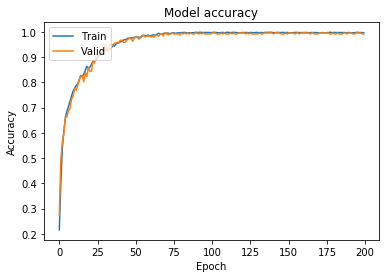

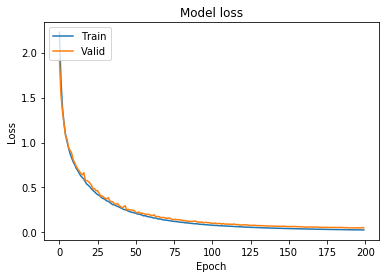

In [46]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.savefig('mobilenet_accuracy.png')

plt.show()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.savefig('mobilenet_loss.png')

plt.show()


In [20]:
my_model.load_weights('weights.best.mobile_model.hdf5')

my_model_predictions = [np.argmax(my_model.predict(np.expand_dims(feature, axis=0))) for feature in test_mobile]

# report test accuracy
test_accuracy = 100*np.sum(np.array(my_model_predictions)==np.argmax(y_test, axis=1))/len(my_model_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 68.5237%


As a measurement of the robustness of the model iam going to use an augmented training dataset by rotation by 20 degree 

In [21]:
my_model.load_weights('weights.best.mobile_model.hdf5')

my_model_predictions = [np.argmax(my_model.predict(np.expand_dims(feature, axis=0))) for feature in train_tensor_aug]

# report test accuracy
test_accuracy = 100*np.sum(np.array(my_model_predictions)==np.argmax(y_train_aug, axis=1))/len(my_model_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 80.7661%


In [20]:
prev_class_num=20
accuracy=0.8
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX

while 1:
    start=time.time()
    ret, img = cap.read()
    frame=cv2.resize(img, (224, 224))
    frame = image.img_to_array(frame)
    frame=np.expand_dims(frame,axis=0)
    prediction=my_model.predict(model.predict(preprocess_input(frame)))
    class_num=np.argmax(prediction)
    if(prediction[0][class_num]>accuracy):
        cv2.putText(img,classes_name[class_num],(10,224), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if( (class_num != prev_class_num)):

            prev_class_num=class_num
            voice_assist(class_num)
    cv2.imshow('img',img)
    end=time.time()
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()
print("The time taken to process one frame is ={}".format(end-start))

The time taken to process one frame is =0.1994647979736328


In [16]:

# a built in function in keras to augment the data 
datagen = ImageDataGenerator(rotation_range=20)

subdirectory=classes_name[8]

train_generator =datagen.flow_from_directory(
    directory="./data/validation_aug/",
    classes=[subdirectory],
    color_mode="rgb",
    save_format='jpg',
    batch_size=20,
    class_mode="categorical",
    save_to_dir="./data/validation_aug///"+subdirectory,
    save_prefix="augmented",
    follow_links=True,
)
datagen.fit(train_generator)

Found 27 images belonging to 1 classes.


KeyboardInterrupt: 

In [48]:
my_model_augement = Sequential()
my_model_augement.add(Dense(9, activation='softmax',input_shape=train_tensor_aug.shape[1:]))
my_model_augement.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 9)                 11529     
Total params: 11,529
Trainable params: 11,529
Non-trainable params: 0
_________________________________________________________________


In [58]:

my_model_augement.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='weights.best.mobile_model_augement.hdf5', 
                               verbose=1, save_best_only=True)

history1=my_model_augement.fit(train_tensor_aug, y_train_aug, 
          validation_data=(valid_mobile, y_valid),
          epochs=200, batch_size=10, callbacks=[checkpointer], verbose=2)



Train on 3655 samples, validate on 243 samples
Epoch 1/200
 - 2s - loss: 0.0521 - acc: 0.9956 - val_loss: 0.0908 - val_acc: 0.9794

Epoch 00001: val_loss improved from inf to 0.09081, saving model to weights.best.mobile_model_augement.hdf5
Epoch 2/200
 - 1s - loss: 0.0357 - acc: 0.9992 - val_loss: 0.1044 - val_acc: 0.9794

Epoch 00002: val_loss did not improve from 0.09081
Epoch 3/200
 - 1s - loss: 0.0343 - acc: 0.9984 - val_loss: 0.0855 - val_acc: 0.9794

Epoch 00003: val_loss improved from 0.09081 to 0.08549, saving model to weights.best.mobile_model_augement.hdf5
Epoch 4/200
 - 1s - loss: 0.0327 - acc: 0.9989 - val_loss: 0.0895 - val_acc: 0.9794

Epoch 00004: val_loss did not improve from 0.08549
Epoch 5/200
 - 1s - loss: 0.0317 - acc: 0.9992 - val_loss: 0.0926 - val_acc: 0.9794

Epoch 00005: val_loss did not improve from 0.08549
Epoch 6/200
 - 1s - loss: 0.0311 - acc: 0.9989 - val_loss: 0.0888 - val_acc: 0.9794

Epoch 00006: val_loss did not improve from 0.08549
Epoch 7/200
 - 1s -


Epoch 00057: val_loss did not improve from 0.08043
Epoch 58/200
 - 1s - loss: 0.0205 - acc: 0.9986 - val_loss: 0.0848 - val_acc: 0.9835

Epoch 00058: val_loss did not improve from 0.08043
Epoch 59/200
 - 1s - loss: 0.0204 - acc: 0.9986 - val_loss: 0.0809 - val_acc: 0.9835

Epoch 00059: val_loss did not improve from 0.08043
Epoch 60/200
 - 1s - loss: 0.0203 - acc: 0.9989 - val_loss: 0.0820 - val_acc: 0.9835

Epoch 00060: val_loss did not improve from 0.08043
Epoch 61/200
 - 1s - loss: 0.0202 - acc: 0.9986 - val_loss: 0.0801 - val_acc: 0.9835

Epoch 00061: val_loss improved from 0.08043 to 0.08005, saving model to weights.best.mobile_model_augement.hdf5
Epoch 62/200
 - 1s - loss: 0.0201 - acc: 0.9989 - val_loss: 0.0827 - val_acc: 0.9835

Epoch 00062: val_loss did not improve from 0.08005
Epoch 63/200
 - 1s - loss: 0.0200 - acc: 0.9986 - val_loss: 0.0827 - val_acc: 0.9835

Epoch 00063: val_loss did not improve from 0.08005
Epoch 64/200
 - 1s - loss: 0.0199 - acc: 0.9992 - val_loss: 0.083


Epoch 00116: val_loss did not improve from 0.07836
Epoch 117/200
 - 1s - loss: 0.0166 - acc: 0.9989 - val_loss: 0.0808 - val_acc: 0.9835

Epoch 00117: val_loss did not improve from 0.07836
Epoch 118/200
 - 1s - loss: 0.0166 - acc: 0.9989 - val_loss: 0.0806 - val_acc: 0.9835

Epoch 00118: val_loss did not improve from 0.07836
Epoch 119/200
 - 1s - loss: 0.0165 - acc: 0.9989 - val_loss: 0.0814 - val_acc: 0.9835

Epoch 00119: val_loss did not improve from 0.07836
Epoch 120/200
 - 1s - loss: 0.0165 - acc: 0.9986 - val_loss: 0.0823 - val_acc: 0.9835

Epoch 00120: val_loss did not improve from 0.07836
Epoch 121/200
 - 1s - loss: 0.0164 - acc: 0.9989 - val_loss: 0.0823 - val_acc: 0.9835

Epoch 00121: val_loss did not improve from 0.07836
Epoch 122/200
 - 1s - loss: 0.0164 - acc: 0.9989 - val_loss: 0.0812 - val_acc: 0.9835

Epoch 00122: val_loss did not improve from 0.07836
Epoch 123/200
 - 1s - loss: 0.0163 - acc: 0.9986 - val_loss: 0.0847 - val_acc: 0.9835

Epoch 00123: val_loss did not imp

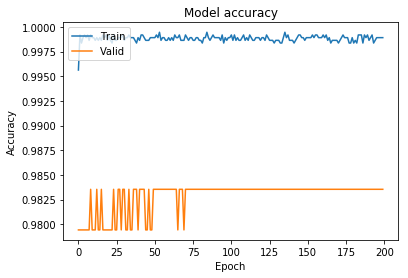

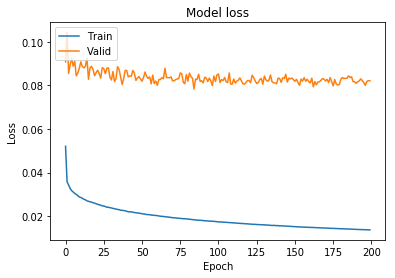

In [60]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [59]:

my_model_augement.load_weights('weights.best.mobile_model_augement.hdf5')

my_model_predictions1 = [np.argmax(my_model_augement.predict(np.expand_dims(feature, axis=0))) for feature in test_mobile]

# report test accuracy
test_accuracy = 100*np.sum(np.array(my_model_predictions1)==np.argmax(y_test, axis=1))/len(my_model_predictions1)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 62.1170%


In [25]:
prev_class_num=20
accuracy=0.8
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX

while 1:
    start=time.time()
    ret, img = cap.read()
    frame=cv2.resize(img, (224, 224))
    frame = image.img_to_array(frame)
    frame=np.expand_dims(frame,axis=0)
    prediction=my_model_augement.predict(model.predict(preprocess_input(frame)))
    class_num=np.argmax(prediction)
    if(prediction[0][class_num]>accuracy):
        cv2.putText(img,classes_name[class_num],(10,224), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if( (class_num != prev_class_num)):

            prev_class_num=class_num
            voice_assist(class_num)
    cv2.imshow('img',img)
    end=time.time()
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()
print("The time taken to process one frame is ={}".format(end-start))

The time taken to process one frame is =0.2323765754699707
